# I. Modélisation statistique

In [16]:
!pip install s3fs
!pip install pandas
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn
!pip install matplotlib

## I.1. Chargement et préparation des données

### A) Importation des données

In [17]:
import pandas as pd

# Importation des données avec code_insee en index
donnees = pd.read_csv("bdd_finale.csv", sep=',', encoding='utf-8', index_col=0)
donnees.head()

beneficiaire_trans_eco  moyenne_conso_agri_hab  \
code_insee                                                   
22001                            0                2.994071   
22002                            0                1.283886   
22003                            0                0.000000   
22004                            0                0.200325   
22005                            0                0.121358   

            moyenne_conso_indus_hab  moyenne_conso_tertiaire_hab  \
code_insee                                                         
22001                      0.000503                     0.631181   
22002                      0.032120                     0.173206   
22003                      0.000000                     0.524098   
22004                      0.675332                     1.267791   
22005                      0.082905                     1.151104   

            moyenne_conso_residentiel_hab  moyenne_conso_totale_hab  \
code_insee                                                            
22001                            3.688905                  7.378017   
22002                            3.248865                  4.775226   
22003                            2.908468                  3.472740   
22004                            3.034877                  5.203150   
22005                            3.532942                  4.926877   

            emissions_ges  nb_actes_france_renov  friche  ecoquartiers  ...  \
code_insee                                                              ...   
22001               14871                     88       2             0  ...   
22002                8621                     38       0             0  ...   
22003                3028                     49       0             0  ...   
22004               29130                     46       6             0  ...   
22005                4136                     10       3             0  ...   

            CSP_maire  com_variation_encours_dette_ha_pct part_inactifs  \
code_insee                                                                
22001              12                                18.9     12.751678   
22002              54                               -39.3     11.062718   
22003              56                                99.8     14.239130   
22004              33                               -34.1     17.234927   
22005              77                               -14.5     14.188533   

            part_actifs  dependance_eco  abstention_municipales  \
code_insee                                                        
22001         47.147651             107                    17.4   
22002         50.522648              96                    53.8   
22003         48.804348             113                    53.7   
22004         40.540541             126                    44.8   
22005         42.371234             140                    22.9   

            taux_creation_ent  total_entreprises  part_licencies_sportifs  \
code_insee                                                                  
22001                    15.0                 20                23.825503   
22002                    12.1                 33                30.836237   
22003                    36.7                 30                35.760870   
22004                    12.6                238                24.282744   
22005                    18.8                 64                27.891156   

            part_jeunes_sans_diplome  
code_insee                            
22001                            9.1  
22002                            4.0  
22003                            0.0  
22004                           12.4  
22005                            2.6  

[5 rows x 31 columns]

### B) Formatage des données

Nous allons pouvoir observer le type des données que nous avons. Cela va nous permettre de déterminer si on a besoin de modifier certaines variables pour qu'elles soient bien en variables catégorielles.

In [18]:
donnees.dtypes

beneficiaire_trans_eco                  int64
moyenne_conso_agri_hab                float64
moyenne_conso_indus_hab               float64
moyenne_conso_tertiaire_hab           float64
moyenne_conso_residentiel_hab         float64
moyenne_conso_totale_hab              float64
emissions_ges                           int64
nb_actes_france_renov                   int64
friche                                  int64
ecoquartiers                            int64
part_residences_secondaires           float64
beneficiaire_prog                       int64
climat                                 object
gridens7                                int64
superf_choro                          float64
departement                             int64
gare_tgv                                int64
part_trajets_voiture                  float64
med_disp                                int64
an                                      int64
p_pop                                   int64
CSP_maire                         

In [19]:
# Conversion des variables en variables catégorielles
donnees["beneficiaire_trans_eco"] = donnees["beneficiaire_trans_eco"].astype('category')
donnees["ecoquartiers"] = donnees["ecoquartiers"].astype('category')
donnees["beneficiaire_prog"] = donnees["beneficiaire_prog"].astype('category')
donnees["gridens7"] = donnees["gridens7"].astype('category')
donnees["departement"] = donnees["departement"].astype('category')
donnees["gare_tgv"] = donnees["gare_tgv"].astype('category')
donnees["CSP_maire"] = donnees["CSP_maire"].astype('category')


# Cas de la variable climat
donnees = pd.get_dummies(donnees, columns = ["climat"]) # On crée des variables binaires pour la variable climat car on a des chaînes de caractères

In [20]:
donnees.dtypes

beneficiaire_trans_eco                category
moyenne_conso_agri_hab                 float64
moyenne_conso_indus_hab                float64
moyenne_conso_tertiaire_hab            float64
moyenne_conso_residentiel_hab          float64
moyenne_conso_totale_hab               float64
emissions_ges                            int64
nb_actes_france_renov                    int64
friche                                   int64
ecoquartiers                          category
part_residences_secondaires            float64
beneficiaire_prog                     category
gridens7                              category
superf_choro                           float64
departement                           category
gare_tgv                              category
part_trajets_voiture                   float64
med_disp                                 int64
an                                       int64
p_pop                                    int64
CSP_maire                             category
com_variation

Nous allons observer si on a des données manquantes dans notre jeu de données.

In [21]:
donnees.isna().sum()

beneficiaire_trans_eco                0
moyenne_conso_agri_hab                0
moyenne_conso_indus_hab               0
moyenne_conso_tertiaire_hab           0
moyenne_conso_residentiel_hab         0
moyenne_conso_totale_hab              0
emissions_ges                         0
nb_actes_france_renov                 0
friche                                0
ecoquartiers                          0
part_residences_secondaires           0
beneficiaire_prog                     0
gridens7                              0
superf_choro                          0
departement                           0
gare_tgv                              0
part_trajets_voiture                  0
med_disp                              0
an                                    0
p_pop                                 0
CSP_maire                             0
com_variation_encours_dette_ha_pct    0
part_inactifs                         0
part_actifs                           0
dependance_eco                        0


### C) Séparation de la variable à expliquer et des variables explicatives

In [22]:
# Définir X et y pour avoir les variables explicatives et la variable à expliquer beneficiaire_trans_eco
X = donnees.drop(columns=['beneficiaire_trans_eco'])

# Variable à expliquer : beneficiaire_trans_eco
y = donnees["beneficiaire_trans_eco"]

In [23]:
# import numpy as np

# # Convertir les listes en tableaux numpy
# X = np.array(X)
# y = np.array(y)

In [24]:
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (1207, 32)
Dimensions de y: (1207,)


In [25]:
# import numpy as np

# np.unique(y)

## I.2. Modélisation

Nous allons d'abord diviser notre jeu de données en jeux d'apprentissage et de test.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [27]:
X_train.shape, y_train.shape

((965, 32), (965,))

In [28]:
X_test.shape, y_test.shape

((242, 32), (242,))

## I.2.1. Régression logistique

### A) Construction des modèles

Nous allons maintenant définir notre modèle de régression logistique, sans pénalité.

In [29]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

etapes_reg_log_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('smote', SMOTE(k_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('adasyn', ADASYN(n_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('borderline_smote', BorderlineSMOTE(k_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]


etapes_reg_log = [('std_scaler', StandardScaler()),
                   ('reg_log', LogisticRegression())

]

# Création des pipelines
modele_reg_log_smote  = Pipeline(steps=etapes_reg_log_smote)
modele_reg_log_oversampler  = Pipeline(steps=etapes_reg_log_oversampler)
modele_reg_log_adasyn  = Pipeline(steps=etapes_reg_log_adasyn)
modele_reg_log_borderline_smote  = Pipeline(steps=etapes_reg_log_borderline_smote)
modele_reg_log  = Pipeline(steps=etapes_reg_log)

On entraîne le modèle sur les données pour estimer les coefficients.

In [30]:
modele_reg_log_smote.fit(X_train, y_train)
modele_reg_log_oversampler.fit(X_train, y_train)
modele_reg_log_adasyn.fit(X_train, y_train)
modele_reg_log_borderline_smote.fit(X_train, y_train)
modele_reg_log.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log', LogisticRegression())])

On cherche à prédire de nouvelles données grâce aux données test

In [31]:
y_proba_reg_log_smote = modele_reg_log_smote.predict_proba(X_test)[:,1]
y_pred_reg_log_smote = modele_reg_log_smote.predict(X_test)

y_proba_reg_log_oversampler = modele_reg_log_oversampler.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler = modele_reg_log_oversampler.predict(X_test)

y_proba_reg_log_adasyn = modele_reg_log_adasyn.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn = modele_reg_log_adasyn.predict(X_test)

y_proba_reg_log_borderline_smote = modele_reg_log_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote = modele_reg_log_borderline_smote.predict(X_test)

y_proba_reg_log = modele_reg_log.predict_proba(X_test)[:, 1]
y_pred_reg_log = modele_reg_log.predict(X_test)

### B) Mesure de la performance des modèles initiaux

Nous allons maintenant évaluer la performance de notre modèle

In [32]:
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score


# Calcul des métriques
auc_roc_reg_log_smote = roc_auc_score(y_test, y_proba_reg_log_smote)
auc_pr_reg_log_smote  = average_precision_score(y_test, y_proba_reg_log_smote)
log_loss_value_reg_log_smote  = log_loss(y_test, y_proba_reg_log_smote)
precision_reg_log_smote  = precision_score(y_test, y_pred_reg_log_smote)
recall_reg_log_smote  = recall_score(y_test, y_pred_reg_log_smote)
f1_reg_log_smote = f1_score(y_test, y_pred_reg_log_smote)
mcc_reg_log_smote  = matthews_corrcoef(y_test, y_pred_reg_log_smote)
balanced_acc_reg_log_smote  = balanced_accuracy_score(y_test, y_pred_reg_log_smote)
specificity_reg_log_smote  = confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote)[0, 1])
cohen_kappa_reg_log_smote  = cohen_kappa_score(y_test, y_pred_reg_log_smote)

In [33]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_oversampler = roc_auc_score(y_test, y_proba_reg_log_oversampler)
auc_pr_reg_log_oversampler = average_precision_score(y_test, y_proba_reg_log_oversampler)
log_loss_value_reg_log_oversampler = log_loss(y_test, y_proba_reg_log_oversampler)
precision_reg_log_oversampler = precision_score(y_test, y_pred_reg_log_oversampler)
recall_reg_log_oversampler = recall_score(y_test, y_pred_reg_log_oversampler)
f1_reg_log_oversampler = f1_score(y_test, y_pred_reg_log_oversampler)
mcc_reg_log_oversampler = matthews_corrcoef(y_test, y_pred_reg_log_oversampler)
balanced_acc_reg_log_oversampler = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler)
specificity_reg_log_oversampler = confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 1])
cohen_kappa_reg_log_oversampler = cohen_kappa_score(y_test, y_pred_reg_log_oversampler)

In [34]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_adasyn = roc_auc_score(y_test, y_proba_reg_log_adasyn)
auc_pr_reg_log_adasyn = average_precision_score(y_test, y_proba_reg_log_adasyn)
log_loss_value_reg_log_adasyn = log_loss(y_test, y_proba_reg_log_adasyn)
precision_reg_log_adasyn = precision_score(y_test, y_pred_reg_log_adasyn)
recall_reg_log_adasyn = recall_score(y_test, y_pred_reg_log_adasyn)
f1_reg_log_adasyn = f1_score(y_test, y_pred_reg_log_adasyn)
mcc_reg_log_adasyn = matthews_corrcoef(y_test, y_pred_reg_log_adasyn)
balanced_acc_reg_log_adasyn = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn)
specificity_reg_log_adasyn = confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 1])
cohen_kappa_reg_log_adasyn = cohen_kappa_score(y_test, y_pred_reg_log_adasyn)

In [35]:
# Calcul des métriques

auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_borderline_smote)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_borderline_smote)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_borderline_smote)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_borderline_smote)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_borderline_smote)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_borderline_smote)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_borderline_smote)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_borderline_smote)


In [36]:
auc_roc_reg_log = roc_auc_score(y_test, y_proba_reg_log)
auc_pr_reg_log = average_precision_score(y_test, y_proba_reg_log)
log_loss_value_reg_log = log_loss(y_test, y_proba_reg_log)
precision_reg_log = precision_score(y_test, y_pred_reg_log)
recall_reg_log = recall_score(y_test, y_pred_reg_log)
f1_reg_log = f1_score(y_test, y_pred_reg_log)
mcc_reg_log = matthews_corrcoef(y_test, y_pred_reg_log)
balanced_acc_reg_log = balanced_accuracy_score(y_test, y_pred_reg_log)
specificity_reg_log = confusion_matrix(y_test, y_pred_reg_log)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log)[0, 0] + confusion_matrix(y_test, y_pred_reg_log)[0, 1])
cohen_kappa_reg_log = cohen_kappa_score(y_test, y_pred_reg_log)

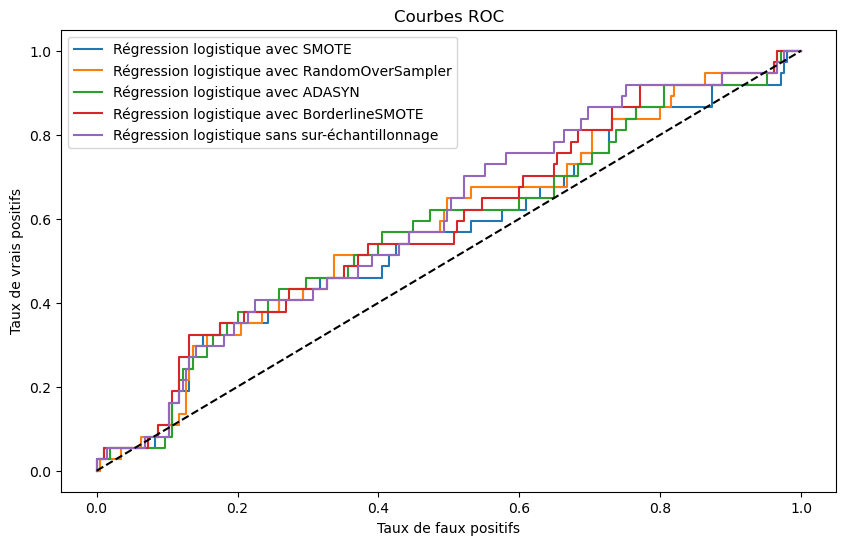

In [37]:
# Comparaison des courbes ROC

from sklearn.metrics import roc_curve

fpr_reg_log_smote, tpr_reg_log_smote, _ = roc_curve(y_test, y_proba_reg_log_smote)
fpr_reg_log_oversampler, tpr_reg_log_oversampler, _ = roc_curve(y_test, y_proba_reg_log_oversampler)
fpr_reg_log_adasyn, tpr_reg_log_adasyn, _ = roc_curve(y_test, y_proba_reg_log_adasyn)
fpr_reg_log_borderline_smote, tpr_reg_log_borderline_smote, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote, tpr_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler, tpr_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn, tpr_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote, tpr_reg_log_borderline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

plt.show()

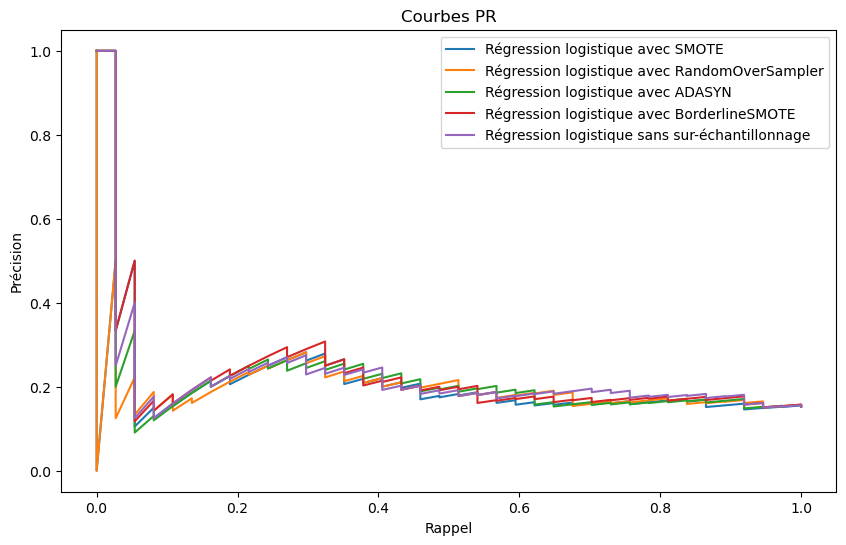

In [38]:
# Comparaison des courbes PR

from sklearn.metrics import precision_recall_curve

precision_reg_log_smote, recall_reg_log_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_smote)
precision_reg_log_oversampler, recall_reg_log_oversampler, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler)
precision_reg_log_adasyn, recall_reg_log_adasyn, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn)
precision_reg_log_borderline_smote, recall_reg_log_borderline_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_borderline_smote)
precision_reg_log, recall_reg_log, _ = precision_recall_curve(y_test, y_proba_reg_log)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote, precision_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler, precision_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn, precision_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_borderline_smote, precision_reg_log_borderline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log, precision_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')
plt.legend()
plt.show()

In [39]:
# Résultats

resultats_reg_log = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log, auc_pr_reg_log, log_loss_value_reg_log, f1_reg_log, mcc_reg_log, balanced_acc_reg_log, specificity_reg_log, cohen_kappa_reg_log],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote, auc_pr_reg_log_smote, log_loss_value_reg_log_smote, f1_reg_log_smote, mcc_reg_log_smote, balanced_acc_reg_log_smote, specificity_reg_log_smote, cohen_kappa_reg_log_smote],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler, auc_pr_reg_log_oversampler, log_loss_value_reg_log_oversampler,  f1_reg_log_oversampler, mcc_reg_log_oversampler, balanced_acc_reg_log_oversampler, specificity_reg_log_oversampler, cohen_kappa_reg_log_oversampler],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn, auc_pr_reg_log_adasyn, log_loss_value_reg_log_adasyn, f1_reg_log_adasyn, mcc_reg_log_adasyn, balanced_acc_reg_log_adasyn, specificity_reg_log_adasyn, cohen_kappa_reg_log_adasyn],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote, log_loss_value_reg_log_borderline_smote,  f1_reg_log_borderline_smote, mcc_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote, specificity_reg_log_borderline_smote, cohen_kappa_reg_log_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log = resultats_reg_log.round(3)
resultats_reg_log

Régression logistique sans sur-échantillonnage  \
AUC-ROC                                               0.600   
AUC-PR                                                0.228   
Log loss                                              0.432   
F1                                                    0.050   
MCC                                                   0.056   
Accuracy                                              0.509   
Spécificité                                           0.990   
Kappa                                                 0.028   

             Régression logistique avec SMOTE  \
AUC-ROC                                 0.562   
AUC-PR                                  0.208   
Log loss                                0.737   
F1                                      0.250   
MCC                                     0.044   
Accuracy                                0.530   
Spécificité                             0.600   
Kappa                                   0.035   

             Régression logistique avec RandomOverSampler  \
AUC-ROC                                             0.581   
AUC-PR                                              0.205   
Log loss                                            0.494   
F1                                                  0.152   
MCC                                                 0.020   
Accuracy                                            0.509   
Spécificité                                         0.883   
Kappa                                               0.020   

             Régression logistique avec ADASYN  \
AUC-ROC                                  0.577   
AUC-PR                                   0.221   
Log loss                                 0.711   
F1                                       0.277   
MCC                                      0.087   
Accuracy                                 0.559   
Spécificité                              0.605   
Kappa                                    0.070   

             Régression logistique avec BorderlineSMOTE  
AUC-ROC                                           0.588  
AUC-PR                                            0.232  
Log loss                                          0.706  
F1                                                0.292  
MCC                                               0.110  
Accuracy                                          0.575  
Spécificité                                       0.610  
Kappa                                             0.089

### C) Ajustement des hyperparamètres

Pour la régression logistique, les hyperparamètres les plus courants à optimiser sont :
- C : Ce paramètre de régularisation inverse. Une valeur plus petite indique une régularisation plus forte.
- solver : L'algorithme utilisé pour l'optimisation. Les choix courants sont 'liblinear', 'lbfgs', 'saga', etc.
- penalty : Le type de régularisation à utiliser ('l1', 'l2', 'elasticnet', 'none')
- fonction de lien

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, cohen_kappa_score, roc_auc_score

# Définir les grilles de paramètres pour chaque pipeline
param_grid_reg_log_oversampler = {
    'oversampler__sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'None'], # Type de régularisation
}

param_grid_reg_log_smote = {
    'smote__sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'smote__k_neighbors': [3, 5, 7],
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'None'], # Type de régularisation
}

param_grid_reg_log_adasyn = {
    'adasyn__sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'adasyn__n_neighbors': [3, 5, 7],
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'None'],
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation 
}

param_grid_reg_log_borderline_smote = {
    'borderline_smote__sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'borderline_smote__k_neighbors': [3, 5, 7],
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'None'], # Type de régularisation
}

grille_param_reg_log_ = {
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'None'], # Type de régularisation
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Kappa': make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}

# Création des GridSearchCV pour chaque pipeline
grille_recherche_reg_log_oversampler = GridSearchCV(
    estimator=modele_reg_log_oversampler,
    param_grid=param_grid_reg_log_oversampler,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grille_recherche_reg_log_smote = GridSearchCV(
    estimator=modele_reg_log_smote,
    param_grid=param_grid_reg_log_smote,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grille_recherche_reg_log_adasyn = GridSearchCV(
    estimator=modele_reg_log_adasyn,
    param_grid=param_grid_reg_log_adasyn,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grille_recherche_reg_log_borderline_smote = GridSearchCV(
    estimator=modele_reg_log_borderline_smote,
    param_grid=param_grid_reg_log_borderline_smote,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grille_recherche_reg_log = GridSearchCV(
    estimator= modele_reg_log,
    param_grid=grille_param_reg_log_,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [41]:
# Récupération des meilleurs modèles

modele_reg_log_oversampler_opt = grille_recherche_reg_log_oversampler.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estimat

In [42]:
modele_reg_log_smote_opt = grille_recherche_reg_log_smote.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estima

In [43]:
modele_reg_log_adasyn_opt = grille_recherche_reg_log_adasyn.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estima

In [44]:
modele_reg_log_borderline_smote_opt = grille_recherche_reg_log_borderline_smote.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estima

In [45]:
modele_reg_log_opt = grille_recherche_reg_log.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estimator

In [46]:
# Affichage des meilleurs paramètres pour chaque pipeline
print("Meilleurs paramètres pour la régression logistique avec RandomOverSampler:", modele_reg_log_oversampler_opt)
print("Meilleurs paramètres pour la régression logistique avec SMOTE:", modele_reg_log_smote_opt)
print("Meilleurs paramètres pour la régression logistique avec ADASYN:", modele_reg_log_adasyn_opt)
print("Meilleurs paramètres pour la régression logistique avec BorderlineSMOTE:", modele_reg_log_borderline_smote_opt)
print("Meilleurs paramètres pour la régression logistique sans sur-échantillonnage:", modele_reg_log_opt)

Meilleurs paramètres pour la régression logistique avec RandomOverSampler: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler(sampling_strategy=0.75)),
                ('reg_log', LogisticRegression(C=0.01))])
Meilleurs paramètres pour la régression logistique avec SMOTE: Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('reg_log', LogisticRegression(C=0.01))])
Meilleurs paramètres pour la régression logistique avec ADASYN: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adasyn', ADASYN(sampling_strategy=1.0)),
                ('reg_log', LogisticRegression(C=0.01))])
Meilleurs paramètres pour la régression logistique avec BorderlineSMOTE: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('borderline_smote', BorderlineSMOTE(sampling_strategy=0.5)),
                ('reg_log', LogisticRegression(C=0.01))])
Meilleurs paramètres pour la régression logistique sans sur-

In [47]:
# Entraînement des meilleurs modèles

modele_reg_log_oversampler_opt.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler(sampling_strategy=0.75)),
                ('reg_log', LogisticRegression(C=0.01))])

In [48]:
modele_reg_log_opt.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log', LogisticRegression(C=0.01))])

In [49]:
modele_reg_log_adasyn_opt.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adasyn', ADASYN(sampling_strategy=1.0)),
                ('reg_log', LogisticRegression(C=0.01))])

In [50]:
modele_reg_log_borderline_smote_opt.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('borderline_smote', BorderlineSMOTE(sampling_strategy=0.5)),
                ('reg_log', LogisticRegression(C=0.01))])

In [51]:
modele_reg_log_opt.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log', LogisticRegression(C=0.01))])

In [52]:
# Prédiction sur l'échantillon test
y_proba_reg_log_smote_cv = modele_reg_log_smote_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_smote_cv = modele_reg_log_smote_opt.predict(X_test)

y_proba_reg_log_oversampler_cv = modele_reg_log_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler_cv = modele_reg_log_oversampler_opt.predict(X_test)

y_proba_reg_log_adasyn_cv = modele_reg_log_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn_cv = modele_reg_log_adasyn_opt.predict(X_test)

y_proba_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt.predict(X_test)

y_proba_reg_log_cv = modele_reg_log_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_cv = modele_reg_log_opt.predict(X_test)


### D) Mesure de la performance des modèles optimisés

In [53]:
# Calcul des métriques pour chaque modèle

# Calcul des métriques
auc_roc_reg_log_smote_cv = roc_auc_score(y_test, y_proba_reg_log_smote_cv)
auc_pr_reg_log_smote_cv = average_precision_score(y_test, y_proba_reg_log_smote_cv)
log_loss_value_reg_log_smote_cv = log_loss(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_smote_cv = precision_score(y_test, y_pred_reg_log_smote_cv)
recall_reg_log_smote_cv = recall_score(y_test, y_pred_reg_log_smote_cv)
f1_reg_log_smote_cv = f1_score(y_test, y_pred_reg_log_smote_cv)
mcc_reg_log_smote_cv = matthews_corrcoef(y_test, y_pred_reg_log_smote_cv)
balanced_acc_reg_log_smote_cv = balanced_accuracy_score(y_test, y_pred_reg_log_smote_cv)
specificity_reg_log_smote_cv = confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 1])
cohen_kappa_reg_log_smote_cv = cohen_kappa_score(y_test, y_pred_reg_log_smote_cv)

In [54]:
auc_roc_reg_log_oversampler_cv = roc_auc_score(y_test, y_proba_reg_log_oversampler_cv)
auc_pr_reg_log_oversampler_cv = average_precision_score(y_test, y_proba_reg_log_oversampler_cv)
log_loss_value_reg_log_oversampler_cv = log_loss(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_oversampler_cv = precision_score(y_test, y_pred_reg_log_oversampler_cv)
recall_reg_log_oversampler_cv = recall_score(y_test, y_pred_reg_log_oversampler_cv)
f1_reg_log_oversampler_cv = f1_score(y_test, y_pred_reg_log_oversampler_cv)
mcc_reg_log_oversampler_cv = matthews_corrcoef(y_test, y_pred_reg_log_oversampler_cv)
balanced_acc_reg_log_oversampler_cv = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler_cv)
specificity_reg_log_oversampler_cv = confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 1])
cohen_kappa_reg_log_oversampler_cv = cohen_kappa_score(y_test, y_pred_reg_log_oversampler_cv)

In [55]:
auc_roc_reg_log_adasyn_cv = roc_auc_score(y_test, y_proba_reg_log_adasyn_cv)
auc_pr_reg_log_adasyn_cv = average_precision_score(y_test, y_proba_reg_log_adasyn_cv)
log_loss_value_reg_log_adasyn_cv = log_loss(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_adasyn_cv = precision_score(y_test, y_pred_reg_log_adasyn_cv)
recall_reg_log_adasyn_cv = recall_score(y_test, y_pred_reg_log_adasyn_cv)
f1_reg_log_adasyn_cv = f1_score(y_test, y_pred_reg_log_adasyn_cv)
mcc_reg_log_adasyn_cv = matthews_corrcoef(y_test, y_pred_reg_log_adasyn_cv)
balanced_acc_reg_log_adasyn_cv = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn_cv)
specificity_reg_log_adasyn_cv = confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 1])
cohen_kappa_reg_log_adasyn_cv = cohen_kappa_score(y_test, y_pred_reg_log_adasyn_cv)

In [56]:
auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_borderline_smote_cv)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_borderline_smote_cv)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_borderline_smote_cv)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_borderline_smote_cv)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_borderline_smote_cv)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_borderline_smote_cv)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_borderline_smote_cv)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote_cv)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_borderline_smote_cv)

In [57]:
auc_roc_reg_log_cv = roc_auc_score(y_test, y_proba_reg_log_cv)
auc_pr_reg_log_cv = average_precision_score(y_test, y_proba_reg_log_cv)
log_loss_value_reg_log_cv = log_loss(y_test, y_proba_reg_log_cv)
precision_reg_log_cv = precision_score(y_test, y_pred_reg_log_cv)
recall_reg_log_cv = recall_score(y_test, y_pred_reg_log_cv)
f1_reg_log_cv = f1_score(y_test, y_pred_reg_log_cv)
mcc_reg_log_cv = matthews_corrcoef(y_test, y_pred_reg_log_cv)
balanced_acc_reg_log_cv = balanced_accuracy_score(y_test, y_pred_reg_log_cv)
specificity_reg_log_cv = confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_cv)[0, 1])
cohen_kappa_reg_log_cv = cohen_kappa_score(y_test, y_pred_reg_log_cv)

In [58]:
# Affichage des résultats

resultats_reg_log_cv = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log_cv, auc_pr_reg_log_cv, log_loss_value_reg_log_cv, f1_reg_log_cv, mcc_reg_log_cv, balanced_acc_reg_log_cv, specificity_reg_log_cv, cohen_kappa_reg_log_cv],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote_cv, auc_pr_reg_log_smote_cv, log_loss_value_reg_log_smote_cv, f1_reg_log_smote_cv, mcc_reg_log_smote_cv, balanced_acc_reg_log_smote_cv, specificity_reg_log_smote_cv, cohen_kappa_reg_log_smote_cv],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler_cv, auc_pr_reg_log_oversampler_cv, log_loss_value_reg_log_oversampler_cv, f1_reg_log_oversampler_cv, mcc_reg_log_oversampler_cv, balanced_acc_reg_log_oversampler_cv, specificity_reg_log_oversampler_cv, cohen_kappa_reg_log_oversampler_cv],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn_cv, auc_pr_reg_log_adasyn_cv, log_loss_value_reg_log_adasyn_cv, f1_reg_log_adasyn_cv, mcc_reg_log_adasyn_cv, balanced_acc_reg_log_adasyn_cv, specificity_reg_log_adasyn_cv, cohen_kappa_reg_log_adasyn_cv],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote, log_loss_value_reg_log_borderline_smote, f1_reg_log_borderline_smote, mcc_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote, specificity_reg_log_borderline_smote, cohen_kappa_reg_log_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log_cv = resultats_reg_log_cv.round(3)
resultats_reg_log_cv

# Export
resultats_reg_log_cv.to_csv("resultats_reg_log_opt.csv", index=True)
latex_table_reg_log = resultats_reg_log_cv.to_latex(index=True)
print(latex_table_reg_log)


\begin{tabular}{lrrrrr}
\toprule
 & Régression logistique sans sur-échantillonnage & Régression logistique avec SMOTE & Régression logistique avec RandomOverSampler & Régression logistique avec ADASYN & Régression logistique avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.591000 & 0.592000 & 0.577000 & 0.584000 & 0.593000 \\
AUC-PR & 0.232000 & 0.224000 & 0.226000 & 0.228000 & 0.232000 \\
Log loss & 0.422000 & 0.681000 & 0.600000 & 0.689000 & 0.506000 \\
F1 & 0.053000 & 0.299000 & 0.311000 & 0.299000 & 0.097000 \\
MCC & 0.152000 & 0.124000 & 0.164000 & 0.121000 & -0.031000 \\
Accuracy & 0.514000 & 0.584000 & 0.594000 & 0.582000 & 0.487000 \\
Spécificité & 1.000000 & 0.654000 & 0.810000 & 0.624000 & 0.893000 \\
Kappa & 0.045000 & 0.105000 & 0.160000 & 0.099000 & -0.030000 \\
\bottomrule
\end{tabular}



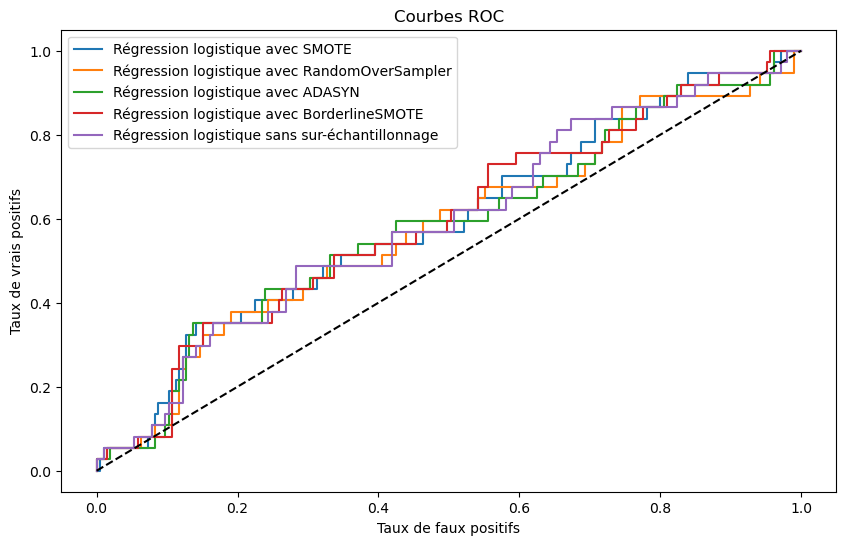

In [59]:
# Comparaison des courbes ROC

fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_smote_cv)
fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, _ = roc_curve(y_test, y_proba_reg_log_oversampler_cv)
fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, _ = roc_curve(y_test, y_proba_reg_log_adasyn_cv)
fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote_cv)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

plt.show()

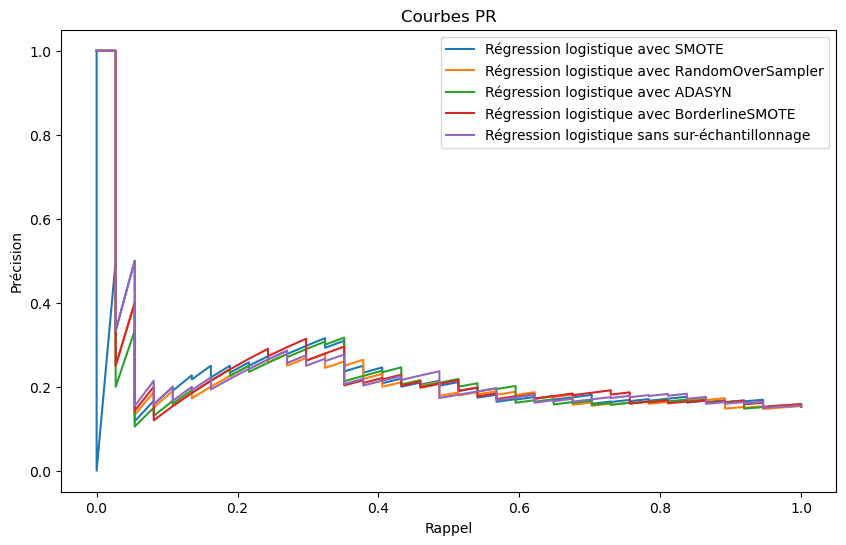

In [60]:
# Comparaison des courbes PR

precision_reg_log_smote_cv, recall_reg_log_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_oversampler_cv, recall_reg_log_oversampler_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_adasyn_cv, recall_reg_log_adasyn_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_borderline_smote_cv, recall_reg_log_borderline_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_borderline_smote_cv)
precision_reg_log_cv, recall_reg_log_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote_cv, precision_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler_cv, precision_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn_cv, precision_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_borderline_smote_cv, precision_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log_cv, precision_reg_log_cv, label='Régression logistique sans sur-échantillonnage')

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')

plt.legend()
plt.show()

### E) Importance des variables

In [61]:
# Importance des variables

# Récupération des coefficients de la régression logistique
coefficients_reg_log_smote = modele_reg_log_smote_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_oversampler = modele_reg_log_oversampler_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_adasyn = modele_reg_log_adasyn_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_borderline_smote = modele_reg_log_borderline_smote_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log = modele_reg_log_opt.named_steps['reg_log'].coef_[0]

# Récupération des noms des variables
noms_variables = X.columns

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_reg_log_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_smote
})

resultats_importance_variables_reg_log_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_oversampler
})

resultats_importance_variables_reg_log_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_adasyn
})

resultats_importance_variables_reg_log_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_borderline_smote
})

resultats_importance_variables_reg_log = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log
})

# Affichage des résultats
resultats_importance_variables_reg_log_smote = resultats_importance_variables_reg_log_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_oversampler = resultats_importance_variables_reg_log_oversampler.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_adasyn = resultats_importance_variables_reg_log_adasyn.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_borderline_smote = resultats_importance_variables_reg_log_borderline_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log = resultats_importance_variables_reg_log.sort_values(by="Coefficient", ascending=False)

resultats_importance_variables_reg_log_smote

Variable  Coefficient
12                        superf_choro     0.371484
24              abstention_municipales     0.155962
15                part_trajets_voiture     0.116548
31                          climat_Mer     0.084722
27             part_licencies_sportifs     0.078962
14                            gare_tgv     0.064099
6                nb_actes_france_renov     0.044541
23                      dependance_eco     0.041526
7                               friche     0.039458
8                         ecoquartiers     0.038667
2          moyenne_conso_tertiaire_hab     0.038318
21                       part_inactifs     0.035302
17                                  an     0.000000
0               moyenne_conso_agri_hab    -0.000288
20  com_variation_encours_dette_ha_pct    -0.001720
19                           CSP_maire    -0.006281
1              moyenne_conso_indus_hab    -0.021794
30                     climat_Estuaire    -0.021804
4             moyenne_conso_totale_hab    -0.030474
18                               p_pop    -0.030568
5                        emissions_ges    -0.031749
28            part_jeunes_sans_diplome    -0.058249
26                   total_entreprises    -0.062963
13                         departement    -0.076684
29                        climat_Autre    -0.077815
22                         part_actifs    -0.086180
10                   beneficiaire_prog    -0.102019
25                   taux_creation_ent    -0.105659
3        moyenne_conso_residentiel_hab    -0.115612
16                            med_disp    -0.119055
9          part_residences_secondaires    -0.133854
11                            gridens7    -0.166370

In [62]:
resultats_importance_variables_reg_log_oversampler

Variable  Coefficient
12                        superf_choro     0.329341
24              abstention_municipales     0.109607
27             part_licencies_sportifs     0.086581
7                               friche     0.075287
31                          climat_Mer     0.074668
15                part_trajets_voiture     0.055702
0               moyenne_conso_agri_hab     0.051089
19                           CSP_maire     0.049102
21                       part_inactifs     0.044819
28            part_jeunes_sans_diplome     0.042112
14                            gare_tgv     0.034544
6                nb_actes_france_renov     0.023854
2          moyenne_conso_tertiaire_hab     0.021704
30                     climat_Estuaire     0.016797
20  com_variation_encours_dette_ha_pct     0.010923
1              moyenne_conso_indus_hab     0.008338
8                         ecoquartiers     0.006746
17                                  an     0.000000
5                        emissions_ges    -0.002808
23                      dependance_eco    -0.004222
4             moyenne_conso_totale_hab    -0.005541
18                               p_pop    -0.011448
26                   total_entreprises    -0.037719
25                   taux_creation_ent    -0.043654
22                         part_actifs    -0.046432
16                            med_disp    -0.067333
13                         departement    -0.069531
29                        climat_Autre    -0.077465
9          part_residences_secondaires    -0.090427
10                   beneficiaire_prog    -0.109439
3        moyenne_conso_residentiel_hab    -0.134141
11                            gridens7    -0.158354

In [63]:
resultats_importance_variables_reg_log_adasyn

Variable  Coefficient
12                        superf_choro     0.314500
24              abstention_municipales     0.121495
15                part_trajets_voiture     0.083019
31                          climat_Mer     0.057103
7                               friche     0.056315
21                       part_inactifs     0.052024
27             part_licencies_sportifs     0.051949
30                     climat_Estuaire     0.042438
6                nb_actes_france_renov     0.035081
23                      dependance_eco     0.034366
2          moyenne_conso_tertiaire_hab     0.022300
1              moyenne_conso_indus_hab     0.014596
8                         ecoquartiers     0.011822
18                               p_pop     0.005470
14                            gare_tgv     0.003221
17                                  an     0.000000
20  com_variation_encours_dette_ha_pct    -0.003701
19                           CSP_maire    -0.005288
28            part_jeunes_sans_diplome    -0.007690
4             moyenne_conso_totale_hab    -0.018894
26                   total_entreprises    -0.025557
0               moyenne_conso_agri_hab    -0.036401
5                        emissions_ges    -0.055965
29                        climat_Autre    -0.066543
13                         departement    -0.071989
22                         part_actifs    -0.083609
16                            med_disp    -0.090890
25                   taux_creation_ent    -0.105344
10                   beneficiaire_prog    -0.110823
9          part_residences_secondaires    -0.117991
3        moyenne_conso_residentiel_hab    -0.124773
11                            gridens7    -0.150001

In [64]:
resultats_importance_variables_reg_log_borderline_smote

Variable  Coefficient
12                        superf_choro     0.294585
24              abstention_municipales     0.142349
7                               friche     0.070268
31                          climat_Mer     0.061983
14                            gare_tgv     0.049817
21                       part_inactifs     0.048606
15                part_trajets_voiture     0.048169
28            part_jeunes_sans_diplome     0.041993
27             part_licencies_sportifs     0.024634
23                      dependance_eco     0.023508
1              moyenne_conso_indus_hab     0.019344
8                         ecoquartiers     0.014951
6                nb_actes_france_renov     0.006266
18                               p_pop     0.001371
17                                  an     0.000000
2          moyenne_conso_tertiaire_hab    -0.007319
20  com_variation_encours_dette_ha_pct    -0.007505
30                     climat_Estuaire    -0.013160
4             moyenne_conso_totale_hab    -0.021066
26                   total_entreprises    -0.028054
19                           CSP_maire    -0.041416
13                         departement    -0.041701
0               moyenne_conso_agri_hab    -0.055003
5                        emissions_ges    -0.055734
10                   beneficiaire_prog    -0.055951
29                        climat_Autre    -0.057618
25                   taux_creation_ent    -0.057821
16                            med_disp    -0.066517
3        moyenne_conso_residentiel_hab    -0.086964
9          part_residences_secondaires    -0.093317
22                         part_actifs    -0.097440
11                            gridens7    -0.127296

In [65]:
resultats_importance_variables_reg_log

Variable  Coefficient
12                        superf_choro     0.217973
24              abstention_municipales     0.109041
14                            gare_tgv     0.068474
7                               friche     0.057981
30                     climat_Estuaire     0.044077
21                       part_inactifs     0.039772
31                          climat_Mer     0.038929
27             part_licencies_sportifs     0.033767
15                part_trajets_voiture     0.026315
2          moyenne_conso_tertiaire_hab     0.023863
28            part_jeunes_sans_diplome     0.022932
6                nb_actes_france_renov     0.022135
23                      dependance_eco     0.015323
1              moyenne_conso_indus_hab     0.013074
19                           CSP_maire     0.004901
8                         ecoquartiers     0.004040
4             moyenne_conso_totale_hab     0.003045
20  com_variation_encours_dette_ha_pct     0.002259
0               moyenne_conso_agri_hab     0.001535
17                                  an     0.000000
5                        emissions_ges    -0.003513
18                               p_pop    -0.003594
26                   total_entreprises    -0.014180
13                         departement    -0.024754
16                            med_disp    -0.026980
10                   beneficiaire_prog    -0.043916
29                        climat_Autre    -0.049101
25                   taux_creation_ent    -0.051838
22                         part_actifs    -0.058437
3        moyenne_conso_residentiel_hab    -0.071751
9          part_residences_secondaires    -0.073950
11                            gridens7    -0.087341

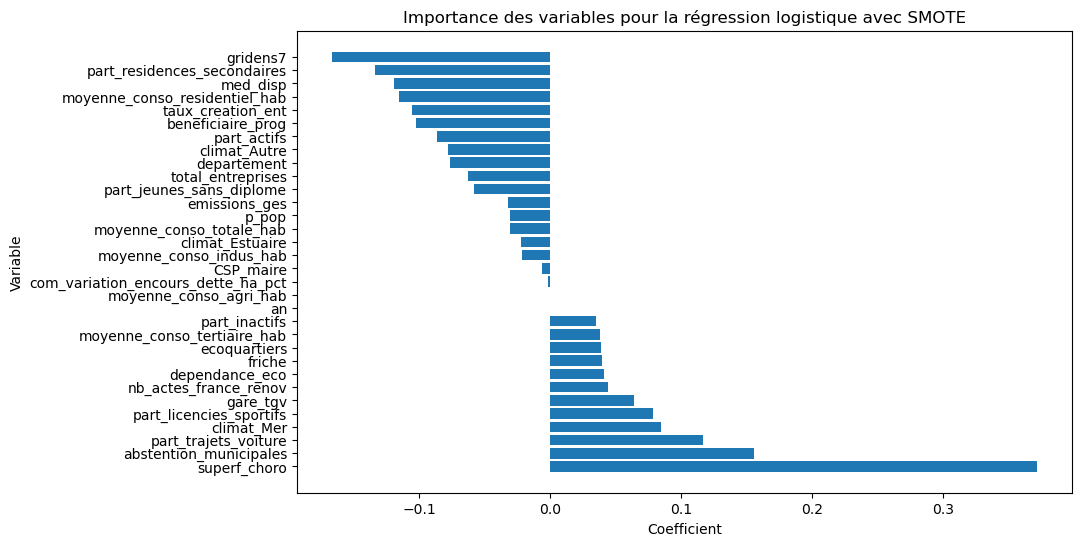

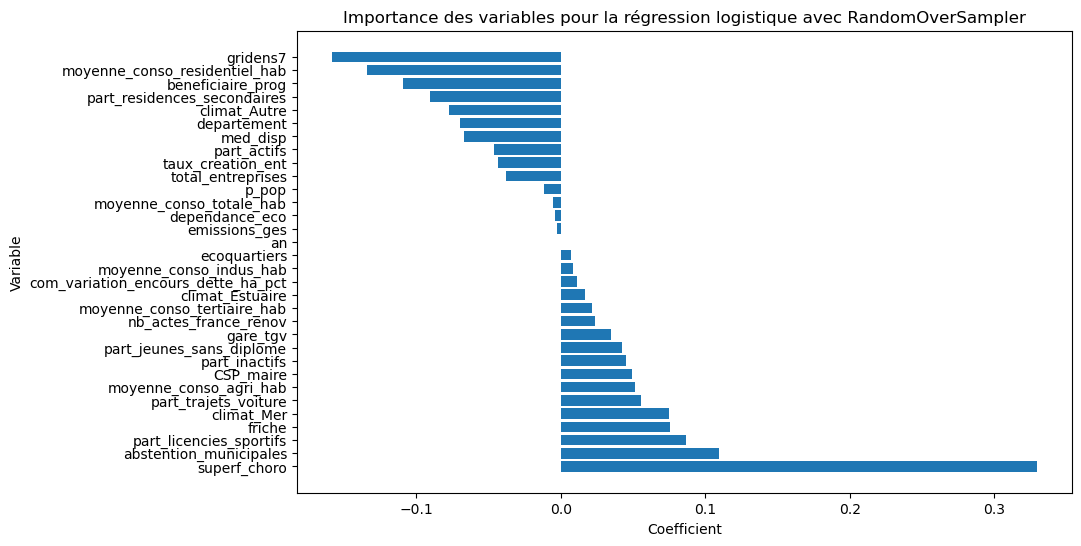

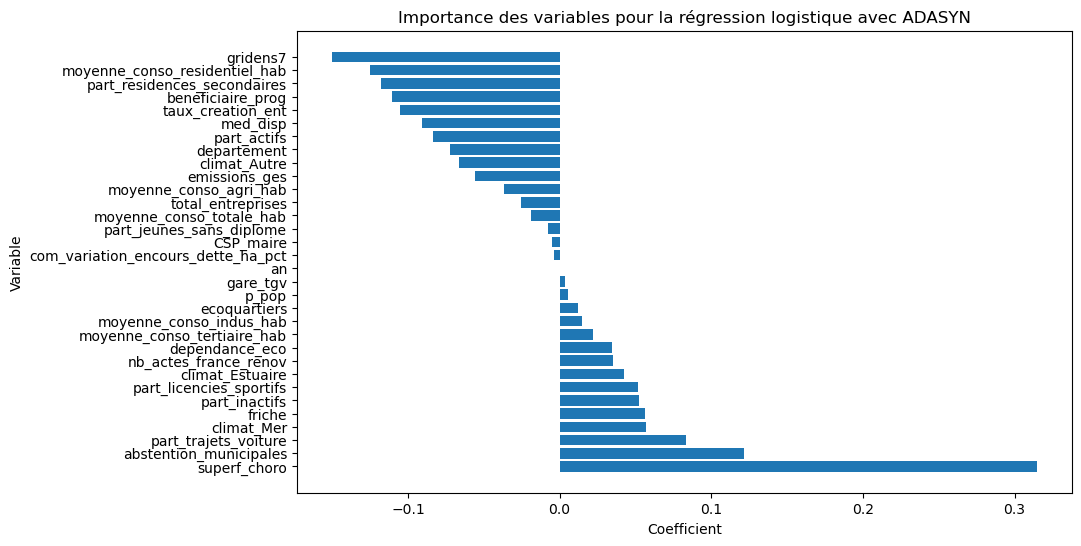

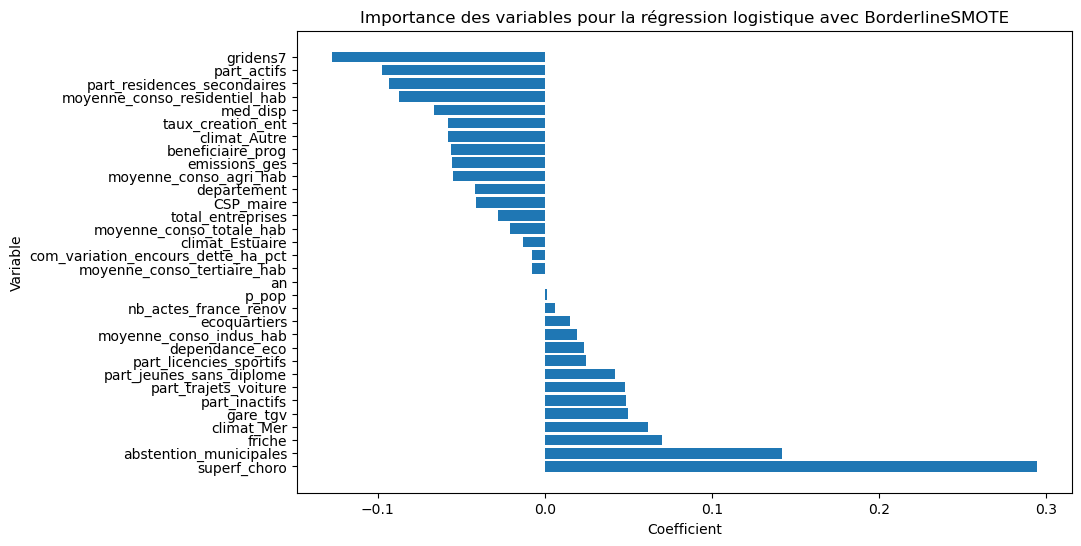

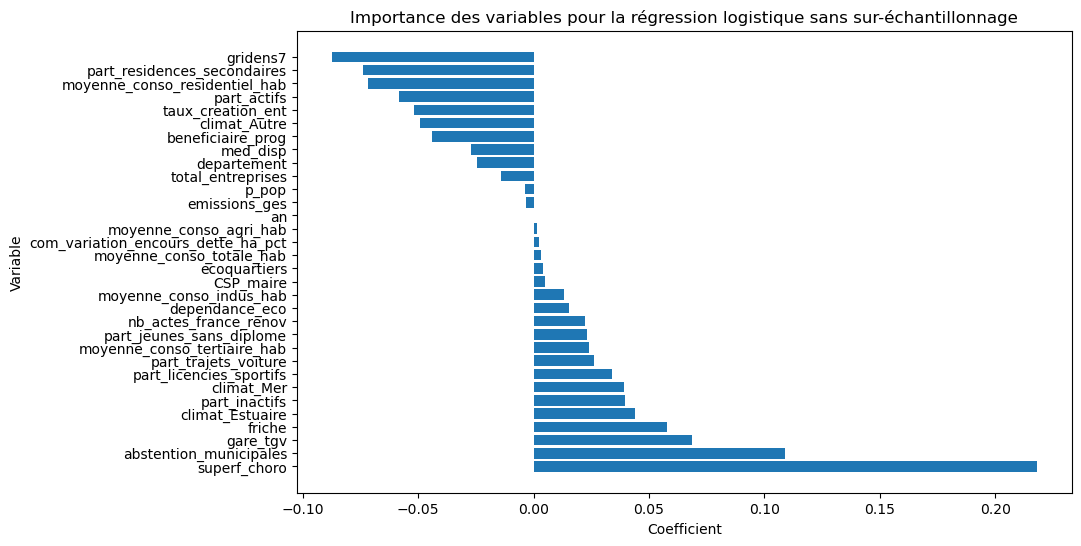

In [66]:
# Graphique pour l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_smote["Variable"], resultats_importance_variables_reg_log_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec SMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_oversampler["Variable"], resultats_importance_variables_reg_log_oversampler["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec RandomOverSampler")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_adasyn["Variable"], resultats_importance_variables_reg_log_adasyn["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec ADASYN")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_borderline_smote["Variable"], resultats_importance_variables_reg_log_borderline_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec BorderlineSMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log["Variable"], resultats_importance_variables_reg_log["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique sans sur-échantillonnage")
plt.show()

## I.2.3. Abres de décision

### A) Construction des modèles

In [67]:
# Construction du modèle d'arbres de décision avec rééquilibrage des classes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.pipeline import Pipeline

etapes_arbre_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbre_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors= 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbre_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbre_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbres = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

# Justification de max_depth=5 : pour éviter l'overfitting
# On a choisi la valeur 5 car c'est une valeur standard qui permet de ne pas trop complexifier l'arbre de décision

modele_arbre_oversampler = Pipeline(steps=etapes_arbre_oversampler) # Création du pipeline
modele_arbre_smote = Pipeline(steps=etapes_arbre_smote) # Création du pipeline
modele_arbre_adasyn = Pipeline(steps=etapes_arbre_adasyn) # Création du pipeline
modele_arbre_borderline_smote = Pipeline(steps=etapes_arbre_borderline_smote) # Création du pipeline
modele_arbre = Pipeline(steps=etapes_arbres) # Création du pipeline

In [68]:
modele_arbre_oversampler.fit(X_train, y_train) # Entraînement
modele_arbre_smote.fit(X_train, y_train) # Entraînement
modele_arbre_adasyn.fit(X_train, y_train) # Entraînement
modele_arbre_borderline_smote.fit(X_train, y_train) # Entraînement
modele_arbre.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('arbre', DecisionTreeClassifier(max_depth=5))])

In [69]:
# Prédictions

y_proba_arbre_oversampler = modele_arbre_oversampler.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler = modele_arbre_oversampler.predict(X_test)

y_proba_arbre_smote = modele_arbre_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_smote = modele_arbre_smote.predict(X_test)

y_proba_arbre_adasyn = modele_arbre_adasyn.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn = modele_arbre_adasyn.predict(X_test)

y_proba_arbre_borderline_smote = modele_arbre_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote = modele_arbre_borderline_smote.predict(X_test)

y_proba_arbre = modele_arbre.predict_proba(X_test)[:, 1]
y_pred_arbre = modele_arbre.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [70]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_arbre_oversampler = roc_auc_score(y_test, y_proba_arbre_oversampler)
auc_pr_arbre_oversampler = average_precision_score(y_test, y_proba_arbre_oversampler)
log_loss_value_arbre_oversampler = log_loss(y_test, y_proba_arbre_oversampler)
precision_arbre_oversampler = precision_score(y_test, y_pred_arbre_oversampler)
recall_arbre_oversampler = recall_score(y_test, y_pred_arbre_oversampler)
f1_arbre_oversampler = f1_score(y_test, y_pred_arbre_oversampler)
mcc_arbre_oversampler = matthews_corrcoef(y_test, y_pred_arbre_oversampler)
balanced_acc_arbre_oversampler = balanced_accuracy_score(y_test, y_pred_arbre_oversampler)
specificity_arbre_oversampler = confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 1])
cohen_kappa_arbre_oversampler = cohen_kappa_score(y_test, y_pred_arbre_oversampler)

In [71]:
auc_roc_arbre_smote = roc_auc_score(y_test, y_proba_arbre_smote)
auc_pr_arbre_smote = average_precision_score(y_test, y_proba_arbre_smote)
log_loss_value_arbre_smote = log_loss(y_test, y_proba_arbre_smote)
precision_arbre_smote = precision_score(y_test, y_pred_arbre_smote)
recall_arbre_smote = recall_score(y_test, y_pred_arbre_smote)
f1_arbre_smote = f1_score(y_test, y_pred_arbre_smote)
mcc_arbre_smote = matthews_corrcoef(y_test, y_pred_arbre_smote)
balanced_acc_arbre_smote = balanced_accuracy_score(y_test, y_pred_arbre_smote)
specificity_arbre_smote = confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote)[0, 1])
cohen_kappa_arbre_smote = cohen_kappa_score(y_test, y_pred_arbre_smote)

In [72]:
auc_roc_arbre_adasyn = roc_auc_score(y_test, y_proba_arbre_adasyn)
auc_pr_arbre_adasyn = average_precision_score(y_test, y_proba_arbre_adasyn)
log_loss_value_arbre_adasyn = log_loss(y_test, y_proba_arbre_adasyn)
precision_arbre_adasyn = precision_score(y_test, y_pred_arbre_adasyn)
recall_arbre_adasyn = recall_score(y_test, y_pred_arbre_adasyn)
f1_arbre_adasyn = f1_score(y_test, y_pred_arbre_adasyn)
mcc_arbre_adasyn = matthews_corrcoef(y_test, y_pred_arbre_adasyn)
balanced_acc_arbre_adasyn = balanced_accuracy_score(y_test, y_pred_arbre_adasyn)
specificity_arbre_adasyn = confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 1])
cohen_kappa_arbre_adasyn = cohen_kappa_score(y_test, y_pred_arbre_adasyn)

In [73]:
auc_roc_arbre_borderline_smote = roc_auc_score(y_test, y_proba_arbre_borderline_smote)
auc_pr_arbre_borderline_smote = average_precision_score(y_test, y_proba_arbre_borderline_smote)
log_loss_value_arbre_borderline_smote = log_loss(y_test, y_proba_arbre_borderline_smote)
precision_arbre_borderline_smote = precision_score(y_test, y_pred_arbre_borderline_smote)
recall_arbre_borderline_smote = recall_score(y_test, y_pred_arbre_borderline_smote)
f1_arbre_borderline_smote = f1_score(y_test, y_pred_arbre_borderline_smote)
mcc_arbre_borderline_smote = matthews_corrcoef(y_test, y_pred_arbre_borderline_smote)
balanced_acc_arbre_borderline_smote = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote)
specificity_arbre_borderline_smote = confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 1])
cohen_kappa_arbre_borderline_smote = cohen_kappa_score(y_test, y_pred_arbre_borderline_smote)

In [74]:
auc_roc_arbre = roc_auc_score(y_test, y_proba_arbre)
auc_pr_arbre = average_precision_score(y_test, y_proba_arbre)
log_loss_value_arbre = log_loss(y_test, y_proba_arbre)
precision_arbre = precision_score(y_test, y_pred_arbre)
recall_arbre = recall_score(y_test, y_pred_arbre)
f1_arbre = f1_score(y_test, y_pred_arbre)
mcc_arbre = matthews_corrcoef(y_test, y_pred_arbre)
balanced_acc_arbre = balanced_accuracy_score(y_test, y_pred_arbre)
specificity_arbre = confusion_matrix(y_test, y_pred_arbre)[0, 0] / (confusion_matrix(y_test, y_pred_arbre)[0, 0] + confusion_matrix(y_test, y_pred_arbre)[0, 1])
cohen_kappa_arbre = cohen_kappa_score(y_test, y_pred_arbre)

In [75]:
# Affichage des résultats
resultats_arbres = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre, auc_pr_arbre, log_loss_value_arbre, f1_arbre, mcc_arbre, balanced_acc_arbre, specificity_arbre, cohen_kappa_arbre],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote, auc_pr_arbre_smote, log_loss_value_arbre_smote, f1_arbre_smote, mcc_arbre_smote, balanced_acc_arbre_smote, specificity_arbre_smote, cohen_kappa_arbre_smote],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler, auc_pr_arbre_oversampler, log_loss_value_arbre_oversampler, f1_arbre_oversampler, mcc_arbre_oversampler, balanced_acc_arbre_oversampler, specificity_arbre_oversampler, cohen_kappa_arbre_oversampler],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn, auc_pr_arbre_adasyn, log_loss_value_arbre_adasyn, f1_arbre_adasyn, mcc_arbre_adasyn, balanced_acc_arbre_adasyn, specificity_arbre_adasyn, cohen_kappa_arbre_adasyn],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote, auc_pr_arbre_borderline_smote, log_loss_value_arbre_borderline_smote, f1_arbre_borderline_smote, mcc_arbre_borderline_smote, balanced_acc_arbre_borderline_smote, specificity_arbre_borderline_smote, cohen_kappa_arbre_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres = resultats_arbres.round(3)
resultats_arbres

Arbre de décision sans sur-échantillonnage  \
AUC-ROC                                           0.647   
AUC-PR                                            0.237   
Log loss                                          0.761   
F1                                                0.203   
MCC                                               0.105   
Accuracy                                          0.542   
Spécificité                                       0.922   
Kappa                                             0.101   

             Arbre de décision avec SMOTE  \
AUC-ROC                             0.537   
AUC-PR                              0.173   
Log loss                            1.099   
F1                                  0.205   
MCC                                 0.034   
Accuracy                            0.519   
Spécificité                         0.795   
Kappa                               0.033   

             Arbre de décision avec RandomOverSampler  \
AUC-ROC                                         0.577   
AUC-PR                                          0.212   
Log loss                                        1.349   
F1                                              0.189   
MCC                                             0.118   
Accuracy                                        0.541   
Spécificité                                     0.946   
Kappa                                           0.106   

             Arbre de décision avec ADASYN  \
AUC-ROC                              0.577   
AUC-PR                               0.188   
Log loss                             0.912   
F1                                   0.259   
MCC                                  0.050   
Accuracy                             0.535   
Spécificité                          0.556   
Kappa                                0.038   

             Arbre de décision avec BorderlineSMOTE  
AUC-ROC                                       0.563  
AUC-PR                                        0.173  
Log loss                                      1.342  
F1                                            0.254  
MCC                                           0.045  
Accuracy                                      0.531  
Spécificité                                   0.576  
Kappa                                         0.035

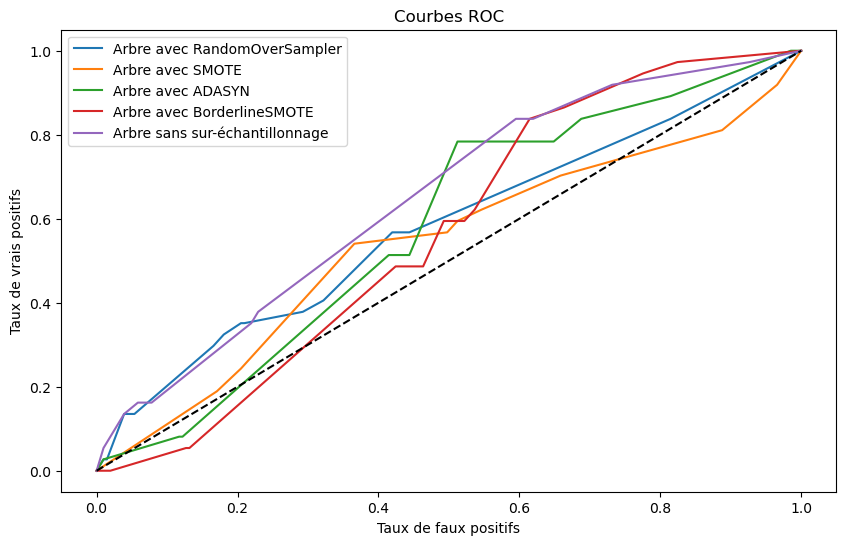

In [76]:
# Tracé des courbes ROC

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_arbre_oversampler, tpr_arbre_oversampler, _ = roc_curve(y_test, y_proba_arbre_oversampler)
fpr_arbre_smote, tpr_arbre_smote, _ = roc_curve(y_test, y_proba_arbre_smote)
fpr_arbre_adasyn, tpr_arbre_adasyn, _ = roc_curve(y_test, y_proba_arbre_adasyn)
fpr_arbre_borderline_smote, tpr_arbre_borderline_smote, _ = roc_curve(y_test, y_proba_arbre_borderline_smote)
fpr_arbre, tpr_arbre, _ = roc_curve(y_test, y_proba_arbre)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler, tpr_arbre_oversampler, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote, tpr_arbre_smote, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn, tpr_arbre_adasyn, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote, tpr_arbre_borderline_smote, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre, tpr_arbre, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### C) Ajustement des hyperparamètres

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, cohen_kappa_score

# Définition de la grille des hyperparamètres pour l'arbre de décision
param_grid_arbres_oversampler = {
    'oversampler__sampling_strategy': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], # Stratégie de sur-échantillonnage: 
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], # Critère d'impureté
    'arbre__max_depth': range(3, 32, 3),  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

param_grid_arbres_smote = {
    'smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins à considérer pour la construction des échantillons synthétiques
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], # Critère d'impureté
    'arbre__max_depth': range(3, 32, 3),  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

param_grid_arbres_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7, 9], # Nombre de voisins à considérer pour la construction des échantillons synthétiques
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], # Critère d'impureté
    'arbre__max_depth': range(3, 32, 3),  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

param_grid_arbres_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins à considérer pour la construction des échantillons synthétiques
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], # Critère d'impureté
    'arbre__max_depth': range(3, 32, 3),  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

param_grid_arbres = {
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], # Critère d'impureté
    'arbre__max_depth': range(3, 32, 3),  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Kappa' : make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}


# Justification de l'optimisation des hyperparamètres

# max_depth : pour éviter l'overfitting, on cherche à limiter la profondeur de l'arbre
# Profondeur Minimale : 3 (pour permettre à l'arbre de commencer à capturer les interactions entre variables)
# Profondeur Maximale : Min(2 * nombre de variables utilisables, nombre total de variables), donc dans ce cas, min(2 * 31, 31) = 31. Cela suppose que chaque variable pourrait être utilisée au maximum deux fois dans le chemin le plus long, mais cela reste une heuristique.
# Pas : 3 ou 5 pour commencer, puis affiner en fonction des résultats obtenus.

In [78]:
# Ajustement des hyperparamètres

grille_recherche_arbre_oversampler = GridSearchCV(modele_arbre_oversampler, param_grid_arbres_oversampler, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_arbre_smote = GridSearchCV(modele_arbre_smote, param_grid_arbres_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_arbre_adasyn = GridSearchCV(modele_arbre_adasyn, param_grid_arbres_adasyn, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_arbre_borderline_smote = GridSearchCV(modele_arbre_borderline_smote, param_grid_arbres_borderline_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_arbre = GridSearchCV(modele_arbre, param_grid_arbres, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)

In [79]:
modele_arbre_oversampler_opt = grille_recherche_arbre_oversampler.fit(X_train, y_train).best_estimator_ 

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4500 fits failed out of a total of 20250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._

In [80]:
modele_arbre_smote_opt = grille_recherche_arbre_smote.fit(X_train, y_train).best_estimator_

In [81]:
modele_arbre_adasyn_opt = grille_recherche_arbre_adasyn.fit(X_train, y_train).best_estimator_

In [82]:
modele_arbre_borderline_smote_opt = grille_recherche_arbre_borderline_smote.fit(X_train, y_train).best_estimator_

In [83]:
modele_arbre_opt = grille_recherche_arbre.fit(X_train, y_train).best_estimator_

In [84]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_arbre_oversampler_cv = modele_arbre_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler_cv = modele_arbre_oversampler_opt.predict(X_test)

y_proba_arbre_smote_cv = modele_arbre_smote_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_smote_cv = modele_arbre_smote_opt.predict(X_test)

y_proba_arbre_adasyn_cv = modele_arbre_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn_cv = modele_arbre_adasyn_opt.predict(X_test)

y_proba_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt.predict(X_test)

y_proba_arbre_cv = modele_arbre_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_cv = modele_arbre_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [85]:
# Mesure de la performance

# Calcul des métriques
auc_roc_arbre_oversampler_cv = roc_auc_score(y_test, y_proba_arbre_oversampler_cv)
auc_pr_arbre_oversampler_cv = average_precision_score(y_test, y_proba_arbre_oversampler_cv)
log_loss_value_arbre_oversampler_cv = log_loss(y_test, y_proba_arbre_oversampler_cv)
precision_arbre_oversampler_cv = precision_score(y_test, y_pred_arbre_oversampler_cv)
recall_arbre_oversampler_cv = recall_score(y_test, y_pred_arbre_oversampler_cv)
f1_arbre_oversampler_cv = f1_score(y_test, y_pred_arbre_oversampler_cv)
mcc_arbre_oversampler_cv = matthews_corrcoef(y_test, y_pred_arbre_oversampler_cv)
balanced_acc_arbre_oversampler_cv = balanced_accuracy_score(y_test, y_pred_arbre_oversampler_cv)
specificity_arbre_oversampler_cv = confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 1])
cohen_kappa_arbre_oversampler_cv = cohen_kappa_score(y_test, y_pred_arbre_oversampler_cv)

auc_roc_arbre_smote_cv = roc_auc_score(y_test, y_proba_arbre_smote_cv)
auc_pr_arbre_smote_cv = average_precision_score(y_test, y_proba_arbre_smote_cv)
log_loss_value_arbre_smote_cv = log_loss(y_test, y_proba_arbre_smote_cv)
precision_arbre_smote_cv = precision_score(y_test, y_pred_arbre_smote_cv)
recall_arbre_smote_cv = recall_score(y_test, y_pred_arbre_smote_cv)
f1_arbre_smote_cv = f1_score(y_test, y_pred_arbre_smote_cv)
mcc_arbre_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_smote_cv)
specificity_arbre_smote_cv = confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 1])
balanced_acc_arbre_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_smote_cv)
cohen_kappa_arbre_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_smote_cv)

auc_roc_arbre_adasyn_cv = roc_auc_score(y_test, y_proba_arbre_adasyn_cv)
auc_pr_arbre_adasyn_cv = average_precision_score(y_test, y_proba_arbre_adasyn_cv)
log_loss_value_arbre_adasyn_cv = log_loss(y_test, y_proba_arbre_adasyn_cv)
precision_arbre_adasyn_cv = precision_score(y_test, y_pred_arbre_adasyn_cv)
recall_arbre_adasyn_cv = recall_score(y_test, y_pred_arbre_adasyn_cv)
f1_arbre_adasyn_cv = f1_score(y_test, y_pred_arbre_adasyn_cv)
mcc_arbre_adasyn_cv = matthews_corrcoef(y_test, y_pred_arbre_adasyn_cv)
balanced_acc_arbre_adasyn_cv = balanced_accuracy_score(y_test, y_pred_arbre_adasyn_cv)
specificity_arbre_adasyn_cv = confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 1])
cohen_kappa_arbre_adasyn_cv = cohen_kappa_score(y_test, y_pred_arbre_adasyn_cv)

auc_roc_arbre_borderline_smote_cv = roc_auc_score(y_test, y_proba_arbre_borderline_smote_cv)
auc_pr_arbre_borderline_smote_cv = average_precision_score(y_test, y_proba_arbre_borderline_smote_cv)
log_loss_value_arbre_borderline_smote_cv = log_loss(y_test, y_proba_arbre_borderline_smote_cv)
precision_arbre_borderline_smote_cv = precision_score(y_test, y_pred_arbre_borderline_smote_cv)
recall_arbre_borderline_smote_cv = recall_score(y_test, y_pred_arbre_borderline_smote_cv)
f1_arbre_borderline_smote_cv = f1_score(y_test, y_pred_arbre_borderline_smote_cv)
mcc_arbre_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_borderline_smote_cv)
balanced_acc_arbre_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote_cv)
specificity_arbre_borderline_smote_cv = confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 1])
cohens_kappa_arbre_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_borderline_smote_cv)

auc_roc_arbre_cv = roc_auc_score(y_test, y_proba_arbre_cv)
auc_pr_arbre_cv = average_precision_score(y_test, y_proba_arbre_cv)
log_loss_value_arbre_cv = log_loss(y_test, y_proba_arbre_cv)
precision_arbre_cv = precision_score(y_test, y_pred_arbre_cv)
recall_arbre_cv = recall_score(y_test, y_pred_arbre_cv)
f1_arbre_cv = f1_score(y_test, y_pred_arbre_cv)
mcc_arbre_cv = matthews_corrcoef(y_test, y_pred_arbre_cv)
balanced_acc_arbre_cv = balanced_accuracy_score(y_test, y_pred_arbre_cv)
specificity_arbre_cv = confusion_matrix(y_test, y_pred_arbre_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_cv)[0, 1])
cohen_kappa_arbre_cv = cohen_kappa_score(y_test, y_pred_arbre_cv)

In [86]:
# Affichage des résultats

resultats_arbres_cv = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre_cv, auc_pr_arbre_cv, log_loss_value_arbre_cv, f1_arbre_cv, mcc_arbre_cv, balanced_acc_arbre_cv, specificity_arbre_cv, cohen_kappa_arbre_cv],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote_cv, auc_pr_arbre_smote_cv, log_loss_value_arbre_smote_cv, f1_arbre_smote_cv, mcc_arbre_smote_cv, balanced_acc_arbre_smote_cv, specificity_arbre_smote_cv, cohen_kappa_arbre_smote_cv],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler_cv, auc_pr_arbre_oversampler_cv, log_loss_value_arbre_oversampler_cv, f1_arbre_oversampler_cv, mcc_arbre_oversampler_cv, balanced_acc_arbre_oversampler_cv, specificity_arbre_oversampler_cv, cohen_kappa_arbre_oversampler_cv],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn_cv, auc_pr_arbre_adasyn_cv, log_loss_value_arbre_adasyn_cv, f1_arbre_adasyn_cv, mcc_arbre_adasyn_cv, balanced_acc_arbre_adasyn_cv, specificity_arbre_adasyn_cv, cohen_kappa_arbre_adasyn_cv],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote_cv, auc_pr_arbre_borderline_smote_cv, log_loss_value_arbre_borderline_smote_cv, f1_arbre_borderline_smote_cv, mcc_arbre_borderline_smote_cv, balanced_acc_arbre_borderline_smote_cv, specificity_arbre_borderline_smote_cv, cohens_kappa_arbre_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres_cv = resultats_arbres_cv.round(3)

resultats_arbres_cv

# Export
resultats_arbres_cv.to_csv("resultats_arbres_opt.csv", index=True)
latex_table_arbres = resultats_arbres_cv.to_latex(index=True)
print(latex_table_arbres)


\begin{tabular}{lrrrrr}
\toprule
 & Arbre de décision sans sur-échantillonnage & Arbre de décision avec SMOTE & Arbre de décision avec RandomOverSampler & Arbre de décision avec ADASYN & Arbre de décision avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.546000 & 0.701000 & 0.579000 & 0.533000 & 0.540000 \\
AUC-PR & 0.184000 & 0.243000 & 0.178000 & 0.170000 & 0.171000 \\
Log loss & 0.735000 & 0.831000 & 0.763000 & 1.785000 & 2.227000 \\
F1 & 0.130000 & 0.353000 & 0.250000 & 0.242000 & 0.241000 \\
MCC & 0.099000 & 0.238000 & 0.071000 & 0.041000 & 0.006000 \\
Accuracy & 0.526000 & 0.661000 & 0.544000 & 0.527000 & 0.504000 \\
Spécificité & 0.971000 & 0.429000 & 0.737000 & 0.649000 & 0.468000 \\
Kappa & 0.075000 & 0.143000 & 0.066000 & 0.035000 & 0.004000 \\
\bottomrule
\end{tabular}



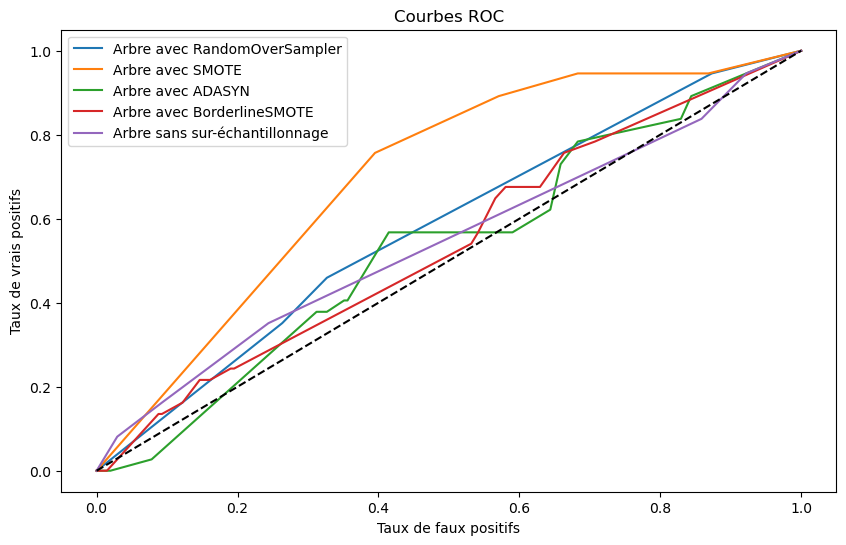

In [87]:
# Comparaison des courbes ROC

fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, _ = roc_curve(y_test, y_proba_arbre_oversampler_cv)
fpr_arbre_smote_cv, tpr_arbre_smote_cv, _ = roc_curve(y_test, y_proba_arbre_smote_cv)
fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, _ = roc_curve(y_test, y_proba_arbre_adasyn_cv)
fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, _ = roc_curve(y_test, y_proba_arbre_borderline_smote_cv)
fpr_arbre_cv, tpr_arbre_cv, _ = roc_curve(y_test, y_proba_arbre_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote_cv, tpr_arbre_smote_cv, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre_cv, tpr_arbre_cv, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### E) Importance des variables

In [88]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_arbre_oversampler = modele_arbre_oversampler_opt.named_steps['arbre'].feature_importances_
importances_arbre_smote = modele_arbre_smote_opt.named_steps['arbre'].feature_importances_
importances_arbre_adasyn = modele_arbre_adasyn_opt.named_steps['arbre'].feature_importances_
importances_arbre_borderline_smote = modele_arbre_borderline_smote_opt.named_steps['arbre'].feature_importances_
importances_arbre = modele_arbre_opt.named_steps['arbre'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_arbre_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_oversampler
})

resultats_importance_variables_arbre_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_smote
})

resultats_importance_variables_arbre_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_adasyn
})

resultats_importance_variables_arbre_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_borderline_smote
})

resultats_importance_variables_arbre = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre
})

# Affichage des résultats
resultats_importance_variables_arbre_oversampler = resultats_importance_variables_arbre_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_smote = resultats_importance_variables_arbre_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_adasyn = resultats_importance_variables_arbre_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_borderline_smote = resultats_importance_variables_arbre_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre = resultats_importance_variables_arbre.sort_values(by="Importance", ascending=False)

resultats_importance_variables_arbre_oversampler

Variable  Importance
26                   total_entreprises    0.530102
22                         part_actifs    0.219452
5                        emissions_ges    0.151567
21                       part_inactifs    0.098878
0               moyenne_conso_agri_hab    0.000000
17                                  an    0.000000
30                     climat_Estuaire    0.000000
29                        climat_Autre    0.000000
28            part_jeunes_sans_diplome    0.000000
27             part_licencies_sportifs    0.000000
25                   taux_creation_ent    0.000000
24              abstention_municipales    0.000000
23                      dependance_eco    0.000000
20  com_variation_encours_dette_ha_pct    0.000000
19                           CSP_maire    0.000000
18                               p_pop    0.000000
16                            med_disp    0.000000
1              moyenne_conso_indus_hab    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
13                         departement    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
9          part_residences_secondaires    0.000000
8                         ecoquartiers    0.000000
7                               friche    0.000000
6                nb_actes_france_renov    0.000000
4             moyenne_conso_totale_hab    0.000000
3        moyenne_conso_residentiel_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
31                          climat_Mer    0.000000

In [89]:
resultats_importance_variables_arbre_smote

Variable  Importance
7                               friche    0.494393
1              moyenne_conso_indus_hab    0.355199
13                         departement    0.090092
19                           CSP_maire    0.060315
24              abstention_municipales    0.000000
20  com_variation_encours_dette_ha_pct    0.000000
21                       part_inactifs    0.000000
22                         part_actifs    0.000000
23                      dependance_eco    0.000000
0               moyenne_conso_agri_hab    0.000000
18                               p_pop    0.000000
26                   total_entreprises    0.000000
27             part_licencies_sportifs    0.000000
28            part_jeunes_sans_diplome    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
25                   taux_creation_ent    0.000000
16                            med_disp    0.000000
17                                  an    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
9          part_residences_secondaires    0.000000
8                         ecoquartiers    0.000000
6                nb_actes_france_renov    0.000000
5                        emissions_ges    0.000000
4             moyenne_conso_totale_hab    0.000000
3        moyenne_conso_residentiel_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
31                          climat_Mer    0.000000

In [90]:
resultats_importance_variables_arbre_adasyn

Variable  Importance
7                               friche    0.424093
1              moyenne_conso_indus_hab    0.174568
6                nb_actes_france_renov    0.068820
4             moyenne_conso_totale_hab    0.048057
20  com_variation_encours_dette_ha_pct    0.046750
13                         departement    0.045178
5                        emissions_ges    0.037471
25                   taux_creation_ent    0.032363
23                      dependance_eco    0.022933
18                               p_pop    0.020395
19                           CSP_maire    0.014002
15                part_trajets_voiture    0.013971
24              abstention_municipales    0.010900
28            part_jeunes_sans_diplome    0.010785
2          moyenne_conso_tertiaire_hab    0.010176
0               moyenne_conso_agri_hab    0.009166
30                     climat_Estuaire    0.004427
10                   beneficiaire_prog    0.003787
27             part_licencies_sportifs    0.002157
26                   total_entreprises    0.000000
22                         part_actifs    0.000000
29                        climat_Autre    0.000000
16                            med_disp    0.000000
21                       part_inactifs    0.000000
17                                  an    0.000000
14                            gare_tgv    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
9          part_residences_secondaires    0.000000
8                         ecoquartiers    0.000000
3        moyenne_conso_residentiel_hab    0.000000
31                          climat_Mer    0.000000

In [91]:
resultats_importance_variables_arbre_borderline_smote

Variable  Importance
1              moyenne_conso_indus_hab    0.240951
18                               p_pop    0.139473
11                            gridens7    0.134212
19                           CSP_maire    0.069667
16                            med_disp    0.056328
13                         departement    0.056246
3        moyenne_conso_residentiel_hab    0.049541
4             moyenne_conso_totale_hab    0.046270
28            part_jeunes_sans_diplome    0.041063
27             part_licencies_sportifs    0.037826
2          moyenne_conso_tertiaire_hab    0.032217
14                            gare_tgv    0.029469
22                         part_actifs    0.027535
0               moyenne_conso_agri_hab    0.015467
23                      dependance_eco    0.012320
5                        emissions_ges    0.011412
15                part_trajets_voiture    0.000000
30                     climat_Estuaire    0.000000
29                        climat_Autre    0.000000
6                nb_actes_france_renov    0.000000
26                   total_entreprises    0.000000
25                   taux_creation_ent    0.000000
24              abstention_municipales    0.000000
12                        superf_choro    0.000000
7                               friche    0.000000
21                       part_inactifs    0.000000
20  com_variation_encours_dette_ha_pct    0.000000
8                         ecoquartiers    0.000000
9          part_residences_secondaires    0.000000
17                                  an    0.000000
10                   beneficiaire_prog    0.000000
31                          climat_Mer    0.000000

In [92]:
resultats_importance_variables_arbre

Variable  Importance
18                               p_pop    0.453598
21                       part_inactifs    0.210397
16                            med_disp    0.195539
5                        emissions_ges    0.140467
17                                  an    0.000000
30                     climat_Estuaire    0.000000
29                        climat_Autre    0.000000
28            part_jeunes_sans_diplome    0.000000
27             part_licencies_sportifs    0.000000
26                   total_entreprises    0.000000
25                   taux_creation_ent    0.000000
24              abstention_municipales    0.000000
23                      dependance_eco    0.000000
22                         part_actifs    0.000000
20  com_variation_encours_dette_ha_pct    0.000000
19                           CSP_maire    0.000000
0               moyenne_conso_agri_hab    0.000000
1              moyenne_conso_indus_hab    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
13                         departement    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
9          part_residences_secondaires    0.000000
8                         ecoquartiers    0.000000
7                               friche    0.000000
6                nb_actes_france_renov    0.000000
4             moyenne_conso_totale_hab    0.000000
3        moyenne_conso_residentiel_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
31                          climat_Mer    0.000000

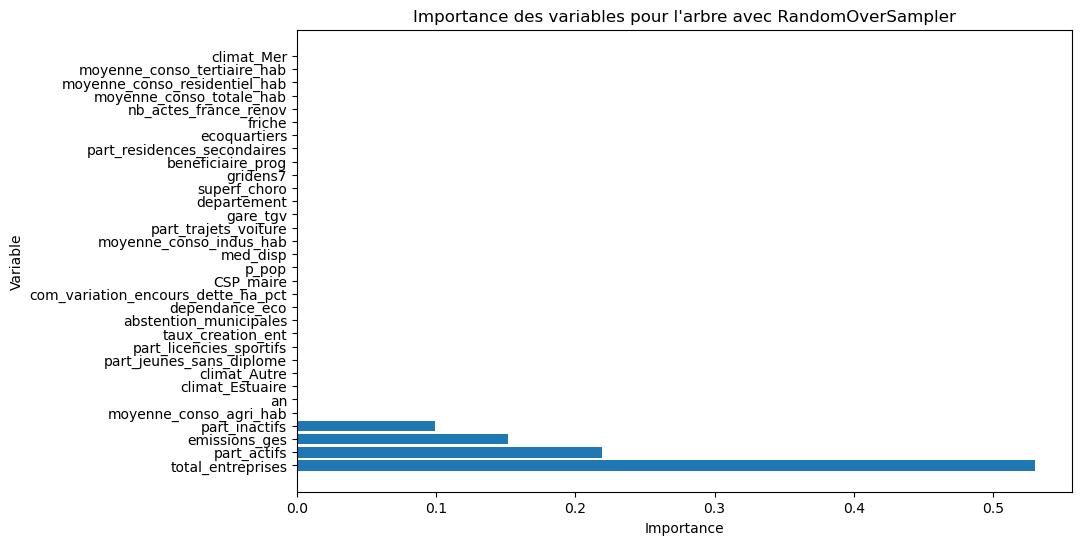

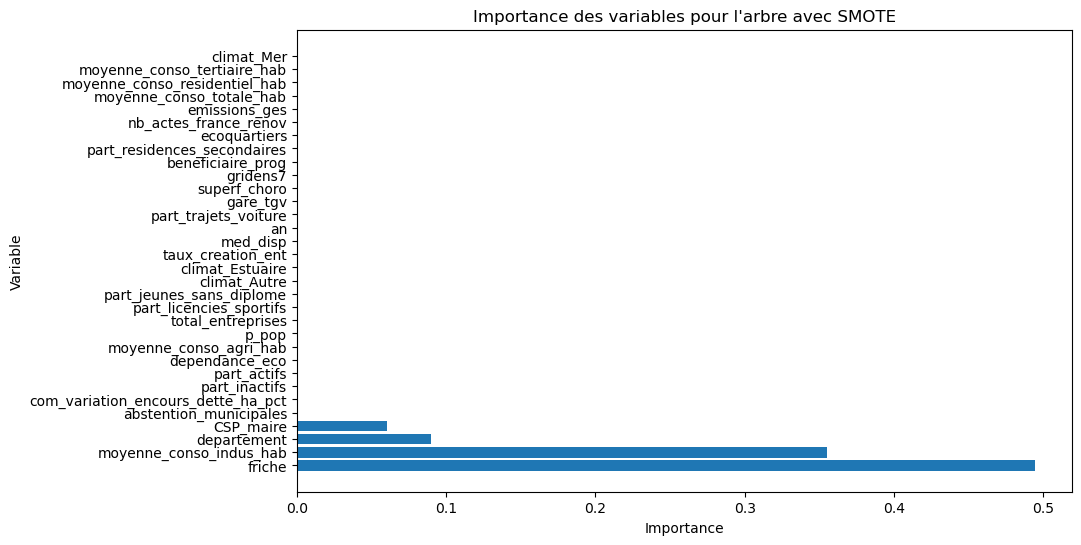

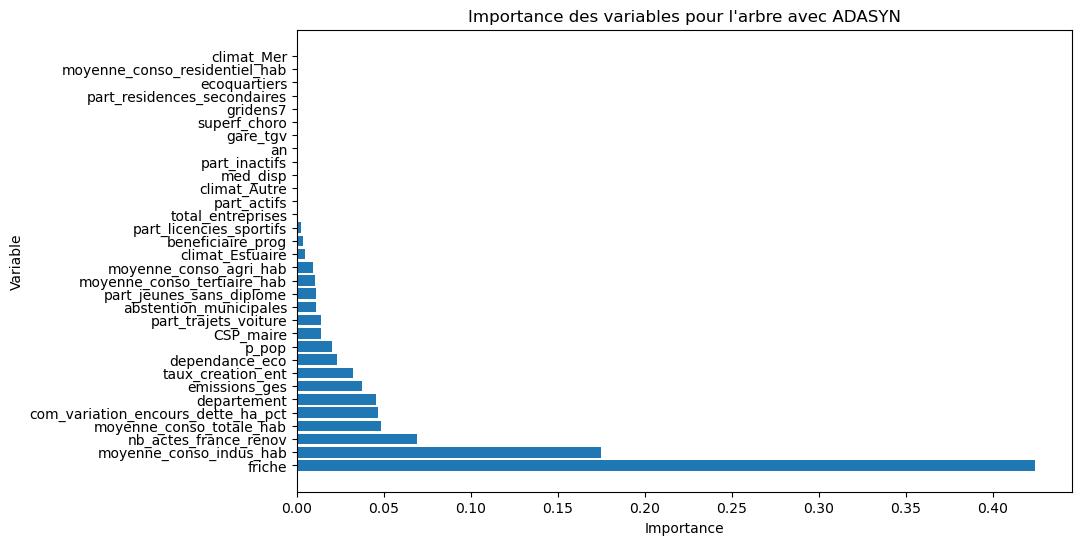

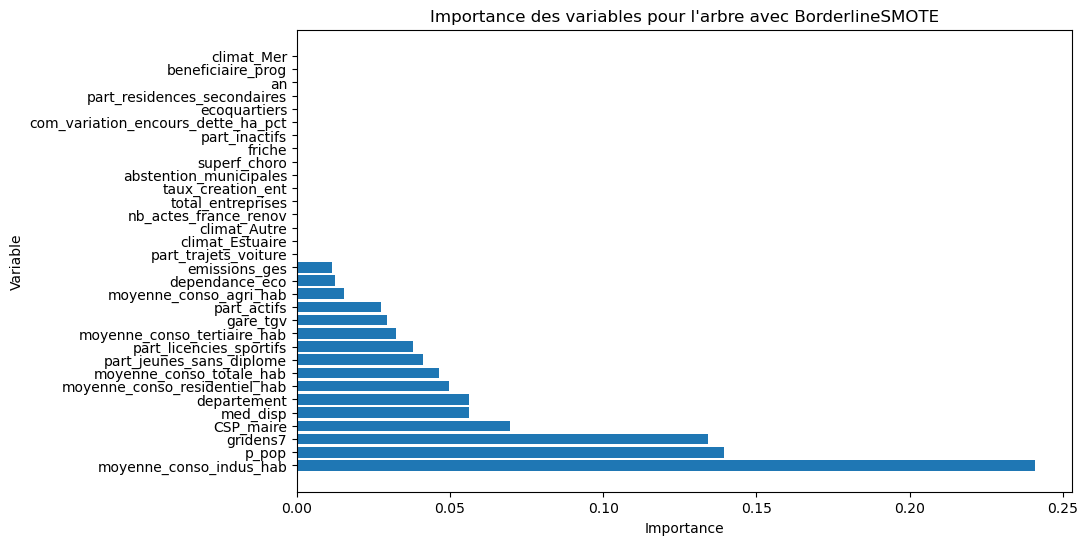

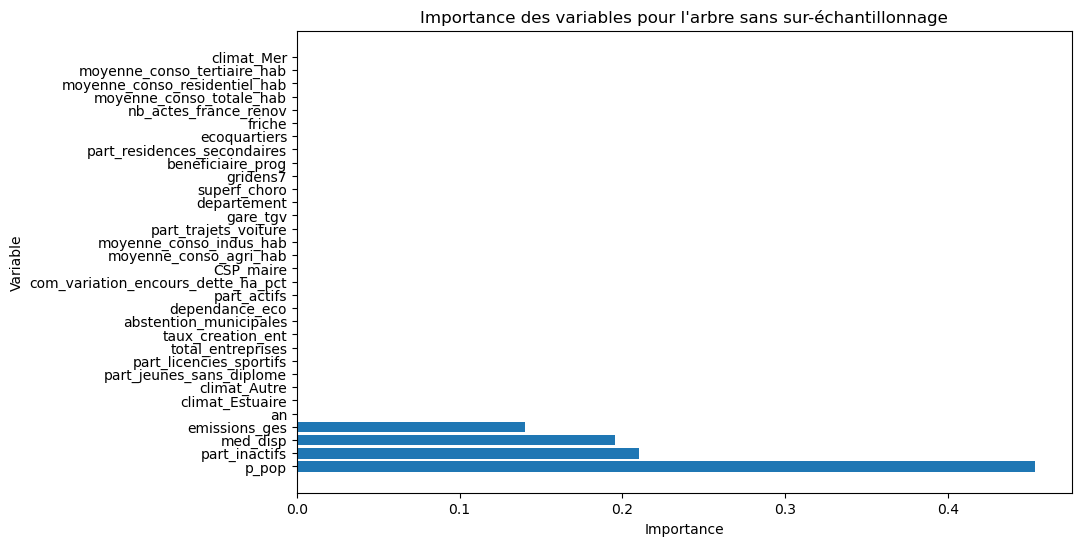

In [93]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_oversampler['Variable'], resultats_importance_variables_arbre_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_smote['Variable'], resultats_importance_variables_arbre_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_adasyn['Variable'], resultats_importance_variables_arbre_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_borderline_smote['Variable'], resultats_importance_variables_arbre_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre['Variable'], resultats_importance_variables_arbre['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre sans sur-échantillonnage')
plt.show()

## I.2.4. Forêts Aléatoires

### A) Construction des modèles

In [94]:
# Construction du modèle de forêts aléatoires avec rééquilibrage des classes

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

etapes_rf_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('rf', RandomForestClassifier())
        ]

etapes_rf_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('rf', RandomForestClassifier()) # Forets aléatoires
        ]


modele_rf_oversampler = Pipeline(steps=etapes_rf_oversampler) # Création du pipeline
modele_rf_smote = Pipeline(steps=etapes_rf_smote) # Création du pipeline
modele_rf_adasyn = Pipeline(steps=etapes_rf_adasyn) # Création du pipeline
modele_rf_borderline_smote = Pipeline(steps=etapes_rf_borderline_smote) # Création du pipeline
modele_rf = Pipeline(steps=etapes_rf) # Création du pipeline

modele_rf_oversampler.fit(X_train, y_train) # Entraînement
modele_rf_smote.fit(X_train, y_train) # Entraînement
modele_rf_adasyn.fit(X_train, y_train) # Entraînement
modele_rf_borderline_smote.fit(X_train, y_train) # Entraînement
modele_rf.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf', RandomForestClassifier())])

In [95]:
# Prédictions

y_proba_rf_oversampler = modele_rf_oversampler.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler = modele_rf_oversampler.predict(X_test)

y_proba_rf_smote = modele_rf_smote.predict_proba(X_test)[:, 1]
y_pred_rf_smote = modele_rf_smote.predict(X_test)

y_proba_rf_adasyn = modele_rf_adasyn.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn = modele_rf_adasyn.predict(X_test)

y_proba_rf_borderline_smote = modele_rf_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote = modele_rf_borderline_smote.predict(X_test)

y_proba_rf = modele_rf.predict_proba(X_test)[:, 1]
y_pred_rf = modele_rf.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [96]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_rf_oversampler = roc_auc_score(y_test, y_proba_rf_oversampler)
auc_pr_rf_oversampler = average_precision_score(y_test, y_proba_rf_oversampler)
log_loss_value_rf_oversampler = log_loss(y_test, y_proba_rf_oversampler)
precision_rf_oversampler = precision_score(y_test, y_pred_rf_oversampler)
recall_rf_oversampler = recall_score(y_test, y_pred_rf_oversampler)
f1_rf_oversampler = f1_score(y_test, y_pred_rf_oversampler)
mcc_rf_oversampler = matthews_corrcoef(y_test, y_pred_rf_oversampler)
balanced_acc_rf_oversampler = balanced_accuracy_score(y_test, y_pred_rf_oversampler)
specificity_rf_oversampler = confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler)[0, 1])
cohen_kappa_rf_oversampler = cohen_kappa_score(y_test, y_pred_rf_oversampler)

auc_roc_rf_smote = roc_auc_score(y_test, y_proba_rf_smote)
auc_pr_rf_smote = average_precision_score(y_test, y_proba_rf_smote)
log_loss_value_rf_smote = log_loss(y_test, y_proba_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)
mcc_rf_smote = matthews_corrcoef(y_test, y_pred_rf_smote)
balanced_acc_rf_smote = balanced_accuracy_score(y_test, y_pred_rf_smote)
specificity_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote)[0, 1])
cohen_kappa_rf_smote = cohen_kappa_score(y_test, y_pred_rf_smote)

auc_roc_rf_adasyn = roc_auc_score(y_test, y_proba_rf_adasyn)
auc_pr_rf_adasyn = average_precision_score(y_test, y_proba_rf_adasyn)
log_loss_value_rf_adasyn = log_loss(y_test, y_proba_rf_adasyn)
precision_rf_adasyn = precision_score(y_test, y_pred_rf_adasyn)
recall_rf_adasyn = recall_score(y_test, y_pred_rf_adasyn)
f1_rf_adasyn = f1_score(y_test, y_pred_rf_adasyn)
mcc_rf_adasyn = matthews_corrcoef(y_test, y_pred_rf_adasyn)
balanced_acc_rf_adasyn = balanced_accuracy_score(y_test, y_pred_rf_adasyn)
specificity_rf_adasyn = confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn)[0, 1])
cohen_kappa_rf_adasyn = cohen_kappa_score(y_test, y_pred_rf_adasyn)

auc_roc_rf_borderline_smote = roc_auc_score(y_test, y_proba_rf_borderline_smote)
auc_pr_rf_borderline_smote = average_precision_score(y_test, y_proba_rf_borderline_smote)
log_loss_value_rf_borderline_smote = log_loss(y_test, y_proba_rf_borderline_smote)
precision_rf_borderline_smote = precision_score(y_test, y_pred_rf_borderline_smote)
recall_rf_borderline_smote = recall_score(y_test, y_pred_rf_borderline_smote)
f1_rf_borderline_smote = f1_score(y_test, y_pred_rf_borderline_smote)
mcc_rf_borderline_smote = matthews_corrcoef(y_test, y_pred_rf_borderline_smote)
balanced_acc_rf_borderline_smote = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote)
specificity_rf_borderline_smote = confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 1])
cohen_kappa_rf_borderline_smote = cohen_kappa_score(y_test, y_pred_rf_borderline_smote)

auc_roc_rf = roc_auc_score(y_test, y_proba_rf)
auc_pr_rf = average_precision_score(y_test, y_proba_rf)
log_loss_value_rf = log_loss(y_test, y_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
specificity_rf = confusion_matrix(y_test, y_pred_rf)[0, 0] / (confusion_matrix(y_test, y_pred_rf)[0, 0] + confusion_matrix(y_test, y_pred_rf)[0, 1])
cohen_kappa_rf = cohen_kappa_score(y_test, y_pred_rf)

In [97]:
# Affichage des résultats

resultats_rf = pd.DataFrame({
    "Random Forest sans sur-échantillonnage": [auc_roc_rf, auc_pr_rf, log_loss_value_rf, f1_rf, mcc_rf, balanced_acc_rf, specificity_rf, cohen_kappa_rf],
    "Random Forest avec SMOTE": [auc_roc_rf_smote, auc_pr_rf_smote, log_loss_value_rf_smote, f1_rf_smote, mcc_rf_smote, balanced_acc_rf_smote, specificity_rf_smote, cohen_kappa_rf_smote],
    "Random Forest avec RandomOverSampler": [auc_roc_rf_oversampler, auc_pr_rf_oversampler, log_loss_value_rf_oversampler, f1_rf_oversampler, mcc_rf_oversampler, balanced_acc_rf_oversampler, specificity_rf_oversampler, cohen_kappa_rf_oversampler],
    "Random Forest avec ADASYN": [auc_roc_rf_adasyn, auc_pr_rf_adasyn, log_loss_value_rf_adasyn, f1_rf_adasyn, mcc_rf_adasyn, balanced_acc_rf_adasyn, specificity_rf_adasyn, cohen_kappa_rf_adasyn],
    "Random Forest avec BorderlineSMOTE": [auc_roc_rf_borderline_smote, auc_pr_rf_borderline_smote, log_loss_value_rf_borderline_smote, f1_rf_borderline_smote, mcc_rf_borderline_smote, balanced_acc_rf_borderline_smote, specificity_rf_borderline_smote, cohen_kappa_rf_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf = resultats_rf.round(3)
resultats_rf

Random Forest sans sur-échantillonnage  Random Forest avec SMOTE  \
AUC-ROC                                       0.561                     0.620   
AUC-PR                                        0.202                     0.258   
Log loss                                      0.450                     0.502   
F1                                            0.050                     0.263   
MCC                                           0.056                     0.126   
Accuracy                                      0.509                     0.564   
Spécificité                                   0.990                     0.859   
Kappa                                         0.028                     0.126   

             Random Forest avec RandomOverSampler  Random Forest avec ADASYN  \
AUC-ROC                                     0.571                      0.610   
AUC-PR                                      0.256                      0.242   
Log loss                                    0.455                      0.511   
F1                                          0.174                      0.253   
MCC                                         0.159                      0.108   
Accuracy                                    0.542                      0.557   
Spécificité                                 0.976                      0.844   
Kappa                                       0.121                      0.108   

             Random Forest avec BorderlineSMOTE  
AUC-ROC                                   0.618  
AUC-PR                                    0.284  
Log loss                                  0.489  
F1                                        0.229  
MCC                                       0.099  
Accuracy                                  0.547  
Spécificité                               0.878  
Kappa                                     0.099

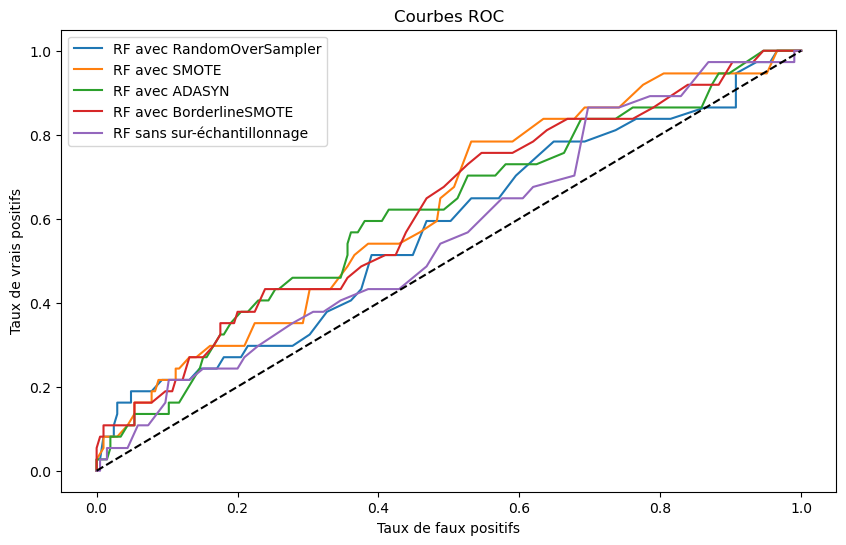

In [98]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_rf_oversampler, tpr_rf_oversampler, _ = roc_curve(y_test, y_proba_rf_oversampler)
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_proba_rf_smote)
fpr_rf_adasyn, tpr_rf_adasyn, _ = roc_curve(y_test, y_proba_rf_adasyn)
fpr_rf_borderline_smote, tpr_rf_borderline_smote, _ = roc_curve(y_test, y_proba_rf_borderline_smote)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler, tpr_rf_oversampler, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote, tpr_rf_smote, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn, tpr_rf_adasyn, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote, tpr_rf_borderline_smote, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf, tpr_rf, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### C) Ajustement des hyperparamètres

In [99]:
# Ajustement des hyperparamètres par validation croisée

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

# Définition de la grille des hyperparamètres pour les forêts aléatoires
param_grid_rf_oversampler = {
    'oversampler__sampling_strategy': [0.4, 0.5, 0.6, 0.8], # Taux de sur-échantillonnage
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 30], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 10, 30], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False]
}


param_grid_rf_smote = {
    'smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 30], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 10, 30], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4]
}


param_grid_rf_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 30], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 10, 30], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4]
}
param_grid_rf_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 30], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 10, 30], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4]
}


param_grid_rf = {
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 30], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 10, 30], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4]
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Kappa': make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}

In [100]:
# Ajustement des hyperparamètres

grille_recherche_rf_oversampler = GridSearchCV(modele_rf_oversampler, param_grid_rf_oversampler, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_rf_smote = GridSearchCV(modele_rf_smote, param_grid_rf_smote, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_rf_adasyn = GridSearchCV(modele_rf_adasyn, param_grid_rf_adasyn, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_rf_borderline_smote = GridSearchCV(modele_rf_borderline_smote, param_grid_rf_borderline_smote, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_rf = GridSearchCV(modele_rf, param_grid_rf, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)

In [101]:
modele_rf_oversampler_opt = grille_recherche_rf_oversampler.fit(X_train, y_train).best_estimator_

In [102]:
modele_rf_smote_opt = grille_recherche_rf_smote.fit(X_train, y_train).best_estimator_

In [103]:
modele_rf_adasyn_opt = grille_recherche_rf_adasyn.fit(X_train, y_train).best_estimator_

In [104]:
modele_rf_borderline_smote_opt = grille_recherche_rf_borderline_smote.fit(X_train, y_train).best_estimator_

In [105]:
modele_rf_opt = grille_recherche_rf.fit(X_train, y_train).best_estimator_

In [106]:
# Affichage des meilleurs paramètres
best_params_rf_oversampler = modele_rf_oversampler_opt.get_params()
best_params_rf_smote = modele_rf_smote_opt.get_params()
best_params_rf_adasyn = modele_rf_adasyn_opt.get_params()
best_params_rf_borderline_smote = modele_rf_borderline_smote_opt.get_params()
best_params_rf = modele_rf_opt.get_params()

In [107]:
# Affichage des meilleurs paramètres pour chaque modèle

print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec oversampler : \n", best_params_rf_oversampler)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec smote :\n", best_params_rf_smote)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec adasyn :\n", best_params_rf_adasyn)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec borderline smote :\n", best_params_rf_borderline_smote)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires sans méthode de sur-échantillonnage :\n", best_params_rf)


Les meilleurs paramètres pour le modèle de forêts aléatoires avec oversampler : 
 {'memory': None, 'steps': [('std_scaler', StandardScaler()), ('oversampler', RandomOverSampler(sampling_strategy=0.6)), ('rf', RandomForestClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=30,
                       n_estimators=300))], 'verbose': False, 'std_scaler': StandardScaler(), 'oversampler': RandomOverSampler(sampling_strategy=0.6), 'rf': RandomForestClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=30,
                       n_estimators=300), 'std_scaler__copy': True, 'std_scaler__with_mean': True, 'std_scaler__with_std': True, 'oversampler__random_state': None, 'oversampler__sampling_strategy': 0.6, 'oversampler__shrinkage': None, 'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, 'rf__class_weight': None, 'rf__criterion': 'gini', 'rf__max_depth': 3, 'rf__max_features': 'sqrt', 'rf__max_leaf_nodes': None, 'rf__max_samples': None, 'rf__min_impurity_decrease': 0.0, 'rf__min_sam

In [108]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_rf_oversampler_cv = modele_rf_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler_cv = modele_rf_oversampler_opt.predict(X_test)

y_proba_rf_smote_cv = modele_rf_smote_opt.predict_proba(X_test)[:, 1]
y_pred_rf_smote_cv = modele_rf_smote_opt.predict(X_test)

y_proba_rf_adasyn_cv = modele_rf_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn_cv = modele_rf_adasyn_opt.predict(X_test)

y_proba_rf_borderline_smote_cv = modele_rf_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote_cv = modele_rf_borderline_smote_opt.predict(X_test)

y_proba_rf_cv = modele_rf_opt.predict_proba(X_test)[:, 1]
y_pred_rf_cv = modele_rf_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [109]:
# Calcul des métriques

auc_roc_rf_oversampler_cv = roc_auc_score(y_test, y_proba_rf_oversampler_cv)
auc_pr_rf_oversampler_cv = average_precision_score(y_test, y_proba_rf_oversampler_cv)
log_loss_value_rf_oversampler_cv = log_loss(y_test, y_proba_rf_oversampler_cv)
precision_rf_oversampler_cv = precision_score(y_test, y_pred_rf_oversampler_cv)
recall_rf_oversampler_cv = recall_score(y_test, y_pred_rf_oversampler_cv)
f1_rf_oversampler_cv = f1_score(y_test, y_pred_rf_oversampler_cv)
mcc_rf_oversampler_cv = matthews_corrcoef(y_test, y_pred_rf_oversampler_cv)
balanced_acc_rf_oversampler_cv = balanced_accuracy_score(y_test, y_pred_rf_oversampler_cv)
specificity_rf_oversampler_cv = confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 1])
cohen_kappa_rf_oversampler_cv = cohen_kappa_score(y_test, y_pred_rf_oversampler_cv)

auc_roc_rf_smote_cv = roc_auc_score(y_test, y_proba_rf_smote_cv)
auc_pr_rf_smote_cv = average_precision_score(y_test, y_proba_rf_smote_cv)
log_loss_value_rf_smote_cv = log_loss(y_test, y_proba_rf_smote_cv)
precision_rf_smote_cv = precision_score(y_test, y_pred_rf_smote_cv)
recall_rf_smote_cv = recall_score(y_test, y_pred_rf_smote_cv)
f1_rf_smote_cv = f1_score(y_test, y_pred_rf_smote_cv)
mcc_rf_smote_cv = matthews_corrcoef(y_test, y_pred_rf_smote_cv)
balanced_acc_rf_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_smote_cv)
specificity_rf_smote_cv = confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 1])
cohen_kappa_rf_smote_cv = cohen_kappa_score(y_test, y_pred_rf_smote_cv)

auc_roc_rf_adasyn_cv = roc_auc_score(y_test, y_proba_rf_adasyn_cv)
auc_pr_rf_adasyn_cv = average_precision_score(y_test, y_proba_rf_adasyn_cv)
log_loss_value_rf_adasyn_cv = log_loss(y_test, y_proba_rf_adasyn_cv)
precision_rf_adasyn_cv = precision_score(y_test, y_pred_rf_adasyn_cv)
recall_rf_adasyn_cv = recall_score(y_test, y_pred_rf_adasyn_cv)
f1_rf_adasyn_cv = f1_score(y_test, y_pred_rf_adasyn_cv)
mcc_rf_adasyn_cv = matthews_corrcoef(y_test, y_pred_rf_adasyn_cv)
balanced_acc_rf_adasyn_cv = balanced_accuracy_score(y_test, y_pred_rf_adasyn_cv)
specificity_rf_adasyn_cv = confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 1])
cohen_kappa_rf_adasyn_cv = cohen_kappa_score(y_test, y_pred_rf_adasyn_cv)

auc_roc_rf_borderline_smote_cv = roc_auc_score(y_test, y_proba_rf_borderline_smote_cv)
auc_pr_rf_borderline_smote_cv = average_precision_score(y_test, y_proba_rf_borderline_smote_cv)
log_loss_value_rf_borderline_smote_cv = log_loss(y_test, y_proba_rf_borderline_smote_cv)
precision_rf_borderline_smote_cv = precision_score(y_test, y_pred_rf_borderline_smote_cv)
recall_rf_borderline_smote_cv = recall_score(y_test, y_pred_rf_borderline_smote_cv)
f1_rf_borderline_smote_cv = f1_score(y_test, y_pred_rf_borderline_smote_cv)
mcc_rf_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_rf_borderline_smote_cv)
balanced_acc_rf_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote_cv)
specificity_rf_borderline_smote_cv = confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 1])
cohen_kappa_rf_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_rf_borderline_smote_cv)

auc_roc_rf_cv = roc_auc_score(y_test, y_proba_rf_cv)
auc_pr_rf_cv = average_precision_score(y_test, y_proba_rf_cv)
log_loss_value_rf_cv = log_loss(y_test, y_proba_rf_cv)
precision_rf_cv = precision_score(y_test, y_pred_rf_cv)
recall_rf_cv = recall_score(y_test, y_pred_rf_cv)
f1_rf_cv = f1_score(y_test, y_pred_rf_cv)
mcc_rf_cv = matthews_corrcoef(y_test, y_pred_rf_cv)
balanced_acc_rf_cv = balanced_accuracy_score(y_test, y_pred_rf_cv)
specificity_rf_cv = confusion_matrix(y_test, y_pred_rf_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_cv)[0, 1])
cohen_kappa_rf_cv = cohen_kappa_score(y_test, y_pred_rf_cv)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
# Affichage des résultats

resultats_rf_opt = pd.DataFrame({
    "Random Forest sans sur-échantillonnage": [auc_roc_rf_cv, auc_pr_rf_cv, log_loss_value_rf_cv, f1_rf_cv, mcc_rf_cv, balanced_acc_rf_cv, specificity_rf_cv, cohen_kappa_rf_cv],
    "Random Forest avec SMOTE": [auc_roc_rf_smote_cv, auc_pr_rf_smote_cv, log_loss_value_rf_smote_cv, f1_rf_smote_cv, mcc_rf_smote_cv, balanced_acc_rf_smote_cv, specificity_rf_smote_cv, cohen_kappa_rf_smote_cv],
    "Random Forest avec RandomOverSampler": [auc_roc_rf_oversampler_cv, auc_pr_rf_oversampler_cv, log_loss_value_rf_oversampler_cv, f1_rf_oversampler_cv, mcc_rf_oversampler_cv, balanced_acc_rf_oversampler_cv, specificity_rf_oversampler_cv, cohen_kappa_rf_oversampler_cv],
    "Random Forest avec ADASYN": [auc_roc_rf_adasyn_cv, auc_pr_rf_adasyn_cv, log_loss_value_rf_adasyn_cv, f1_rf_adasyn_cv, mcc_rf_adasyn_cv, balanced_acc_rf_adasyn_cv, specificity_rf_adasyn_cv, cohen_kappa_rf_adasyn_cv],
    "Random Forest avec BorderlineSMOTE": [auc_roc_rf_borderline_smote_cv, auc_pr_rf_borderline_smote_cv, log_loss_value_rf_borderline_smote_cv, f1_rf_borderline_smote_cv, mcc_rf_borderline_smote_cv, balanced_acc_rf_borderline_smote_cv, specificity_rf_borderline_smote_cv, cohen_kappa_rf_borderline_smote_cv]
}, index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf_opt = resultats_rf_opt.round(3)
resultats_rf_opt

# Export
resultats_rf_opt.to_csv("resultats_rf_opt.csv", index=True)
latex_table_rf = resultats_rf_opt.to_latex(index=True)
print(latex_table_rf)

\begin{tabular}{lrrrrr}
\toprule
 & Random Forest sans sur-échantillonnage & Random Forest avec SMOTE & Random Forest avec RandomOverSampler & Random Forest avec ADASYN & Random Forest avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.619000 & 0.654000 & 0.612000 & 0.619000 & 0.617000 \\
AUC-PR & 0.225000 & 0.308000 & 0.213000 & 0.276000 & 0.293000 \\
Log loss & 0.422000 & 0.608000 & 0.528000 & 0.534000 & 0.621000 \\
F1 & 0.000000 & 0.323000 & 0.273000 & 0.242000 & 0.304000 \\
MCC & 0.000000 & 0.160000 & 0.118000 & 0.076000 & 0.132000 \\
Accuracy & 0.500000 & 0.607000 & 0.567000 & 0.544000 & 0.588000 \\
Spécificité & 1.000000 & 0.673000 & 0.810000 & 0.790000 & 0.663000 \\
Kappa & 0.000000 & 0.138000 & 0.116000 & 0.074000 & 0.113000 \\
\bottomrule
\end{tabular}



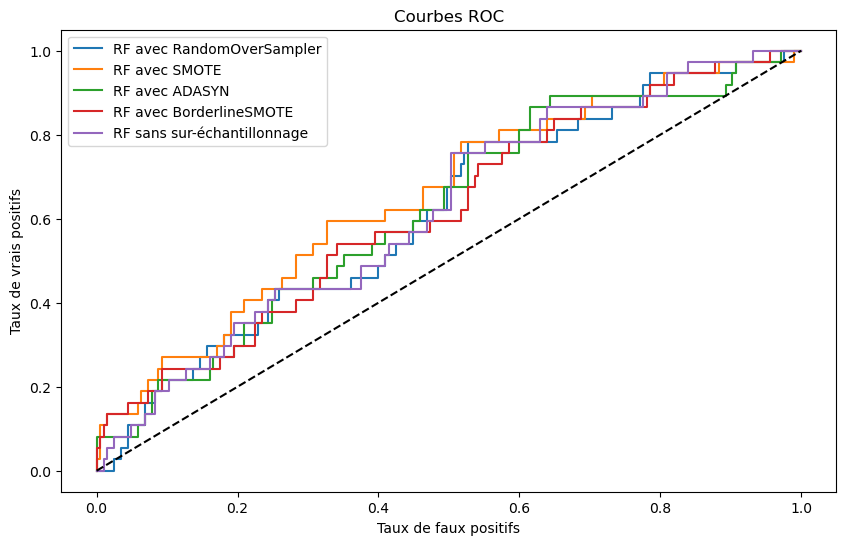

In [111]:
# Comparaison des courbes ROC

fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, _ = roc_curve(y_test, y_proba_rf_oversampler_cv)
fpr_rf_smote_cv, tpr_rf_smote_cv, _ = roc_curve(y_test, y_proba_rf_smote_cv)
fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, _ = roc_curve(y_test, y_proba_rf_adasyn_cv)
fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, _ = roc_curve(y_test, y_proba_rf_borderline_smote_cv)
fpr_rf_cv, tpr_rf_cv, _ = roc_curve(y_test, y_proba_rf_cv)


plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote_cv, tpr_rf_smote_cv, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf_cv, tpr_rf_cv, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()


### E) Importance des variables

In [112]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importance_rf_oversampler = modele_rf_oversampler_opt.named_steps['rf'].feature_importances_
importance_rf_smote = modele_rf_smote_opt.named_steps['rf'].feature_importances_
importance_rf_adasyn = modele_rf_adasyn_opt.named_steps['rf'].feature_importances_
importance_rf_borderline_smote = modele_rf_borderline_smote_opt.named_steps['rf'].feature_importances_
importance_rf = modele_rf_opt.named_steps['rf'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_rf_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_oversampler
})

resultats_importance_variables_rf_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_smote
})

resultats_importance_variables_rf_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_adasyn
})

resultats_importance_variables_rf_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_borderline_smote
})

resultats_importance_variables_rf = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf
})

# Affichage des résultats
resultats_importance_variables_rf_oversampler = resultats_importance_variables_rf_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_smote = resultats_importance_variables_rf_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_adasyn = resultats_importance_variables_rf_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_borderline_smote = resultats_importance_variables_rf_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf = resultats_importance_variables_rf.sort_values(by="Importance", ascending=False)

resultats_importance_variables_rf_oversampler

Variable  Importance
26                   total_entreprises    0.141642
6                nb_actes_france_renov    0.131679
18                               p_pop    0.129640
5                        emissions_ges    0.087187
12                        superf_choro    0.078863
1              moyenne_conso_indus_hab    0.050719
24              abstention_municipales    0.034299
22                         part_actifs    0.033698
21                       part_inactifs    0.033154
27             part_licencies_sportifs    0.031147
2          moyenne_conso_tertiaire_hab    0.027514
20  com_variation_encours_dette_ha_pct    0.027274
16                            med_disp    0.025217
23                      dependance_eco    0.023726
7                               friche    0.019692
3        moyenne_conso_residentiel_hab    0.018189
0               moyenne_conso_agri_hab    0.016439
4             moyenne_conso_totale_hab    0.015651
11                            gridens7    0.014010
28            part_jeunes_sans_diplome    0.012399
9          part_residences_secondaires    0.012369
25                   taux_creation_ent    0.011117
15                part_trajets_voiture    0.010425
19                           CSP_maire    0.006521
13                         departement    0.006053
14                            gare_tgv    0.001048
29                        climat_Autre    0.000123
8                         ecoquartiers    0.000115
10                   beneficiaire_prog    0.000090
17                                  an    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [113]:
resultats_importance_variables_rf_smote

Variable  Importance
11                            gridens7    0.135464
1              moyenne_conso_indus_hab    0.129287
26                   total_entreprises    0.087681
6                nb_actes_france_renov    0.082161
7                               friche    0.080892
18                               p_pop    0.073956
5                        emissions_ges    0.042835
13                         departement    0.040424
23                      dependance_eco    0.036769
12                        superf_choro    0.035323
21                       part_inactifs    0.029286
20  com_variation_encours_dette_ha_pct    0.029100
22                         part_actifs    0.026699
27             part_licencies_sportifs    0.022943
28            part_jeunes_sans_diplome    0.022267
24              abstention_municipales    0.019653
2          moyenne_conso_tertiaire_hab    0.017770
0               moyenne_conso_agri_hab    0.017673
19                           CSP_maire    0.017513
16                            med_disp    0.013027
9          part_residences_secondaires    0.010833
4             moyenne_conso_totale_hab    0.009537
25                   taux_creation_ent    0.007424
15                part_trajets_voiture    0.005700
3        moyenne_conso_residentiel_hab    0.005623
10                   beneficiaire_prog    0.000159
17                                  an    0.000000
14                            gare_tgv    0.000000
8                         ecoquartiers    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [114]:
resultats_importance_variables_rf_adasyn

Variable  Importance
1              moyenne_conso_indus_hab    0.083662
13                         departement    0.063101
11                            gridens7    0.061061
7                               friche    0.055249
21                       part_inactifs    0.052967
6                nb_actes_france_renov    0.051350
18                               p_pop    0.045265
22                         part_actifs    0.042081
24              abstention_municipales    0.041561
26                   total_entreprises    0.041228
12                        superf_choro    0.041048
5                        emissions_ges    0.040649
19                           CSP_maire    0.038791
16                            med_disp    0.035558
23                      dependance_eco    0.035239
20  com_variation_encours_dette_ha_pct    0.034945
9          part_residences_secondaires    0.032212
27             part_licencies_sportifs    0.029109
25                   taux_creation_ent    0.028450
3        moyenne_conso_residentiel_hab    0.023661
4             moyenne_conso_totale_hab    0.023438
0               moyenne_conso_agri_hab    0.022611
28            part_jeunes_sans_diplome    0.022110
2          moyenne_conso_tertiaire_hab    0.022013
15                part_trajets_voiture    0.021113
10                   beneficiaire_prog    0.003461
31                          climat_Mer    0.002410
29                        climat_Autre    0.002206
14                            gare_tgv    0.002140
8                         ecoquartiers    0.001097
30                     climat_Estuaire    0.000213
17                                  an    0.000000

In [115]:
resultats_importance_variables_rf_borderline_smote

Variable  Importance
1              moyenne_conso_indus_hab    0.131470
11                            gridens7    0.116099
18                               p_pop    0.113749
26                   total_entreprises    0.101467
5                        emissions_ges    0.067511
7                               friche    0.061194
6                nb_actes_france_renov    0.058207
21                       part_inactifs    0.044535
12                        superf_choro    0.038656
13                         departement    0.037569
22                         part_actifs    0.030933
19                           CSP_maire    0.021481
27             part_licencies_sportifs    0.020150
24              abstention_municipales    0.020102
2          moyenne_conso_tertiaire_hab    0.019074
16                            med_disp    0.016960
20  com_variation_encours_dette_ha_pct    0.016178
23                      dependance_eco    0.015971
4             moyenne_conso_totale_hab    0.013436
28            part_jeunes_sans_diplome    0.012236
25                   taux_creation_ent    0.010645
0               moyenne_conso_agri_hab    0.009662
3        moyenne_conso_residentiel_hab    0.008156
15                part_trajets_voiture    0.006009
9          part_residences_secondaires    0.005808
14                            gare_tgv    0.001001
29                        climat_Autre    0.000843
31                          climat_Mer    0.000461
30                     climat_Estuaire    0.000436
17                                  an    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000

In [116]:
resultats_importance_variables_rf

Variable  Importance
18                               p_pop    0.122715
6                nb_actes_france_renov    0.114968
26                   total_entreprises    0.110197
12                        superf_choro    0.069888
5                        emissions_ges    0.069742
1              moyenne_conso_indus_hab    0.054405
22                         part_actifs    0.048193
2          moyenne_conso_tertiaire_hab    0.032944
7                               friche    0.032394
24              abstention_municipales    0.029935
27             part_licencies_sportifs    0.029675
21                       part_inactifs    0.027713
20  com_variation_encours_dette_ha_pct    0.026865
4             moyenne_conso_totale_hab    0.026586
23                      dependance_eco    0.023620
16                            med_disp    0.021979
28            part_jeunes_sans_diplome    0.021788
3        moyenne_conso_residentiel_hab    0.020809
0               moyenne_conso_agri_hab    0.019777
9          part_residences_secondaires    0.018762
11                            gridens7    0.018003
25                   taux_creation_ent    0.016547
15                part_trajets_voiture    0.015790
19                           CSP_maire    0.009951
14                            gare_tgv    0.007989
13                         departement    0.005672
29                        climat_Autre    0.000905
31                          climat_Mer    0.000824
8                         ecoquartiers    0.000723
10                   beneficiaire_prog    0.000343
30                     climat_Estuaire    0.000299
17                                  an    0.000000

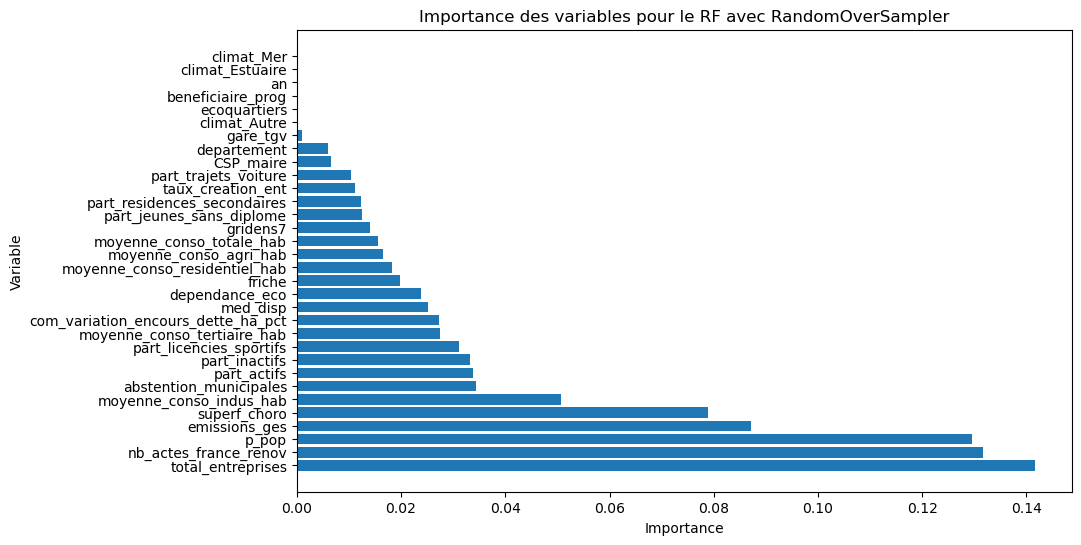

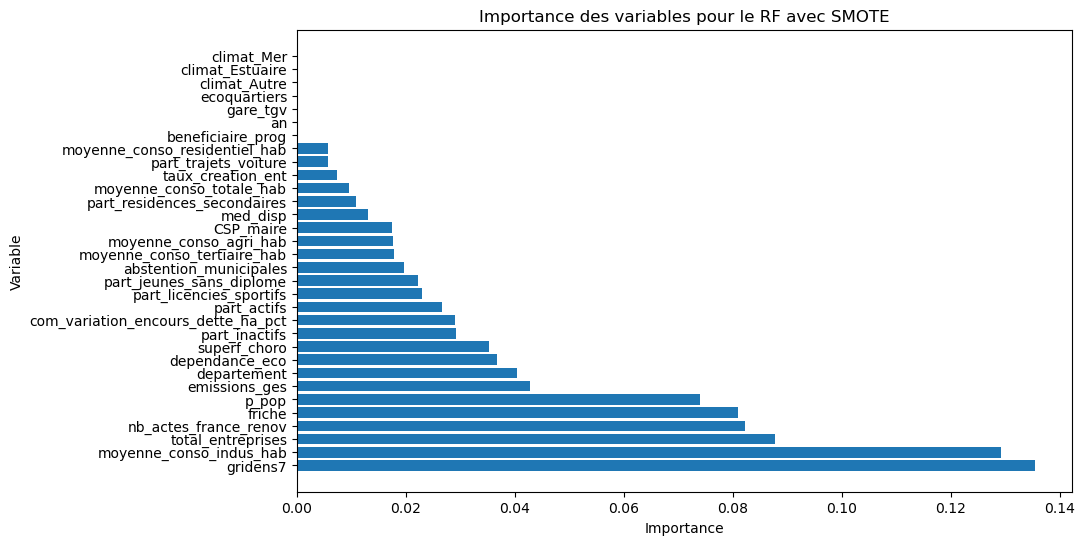

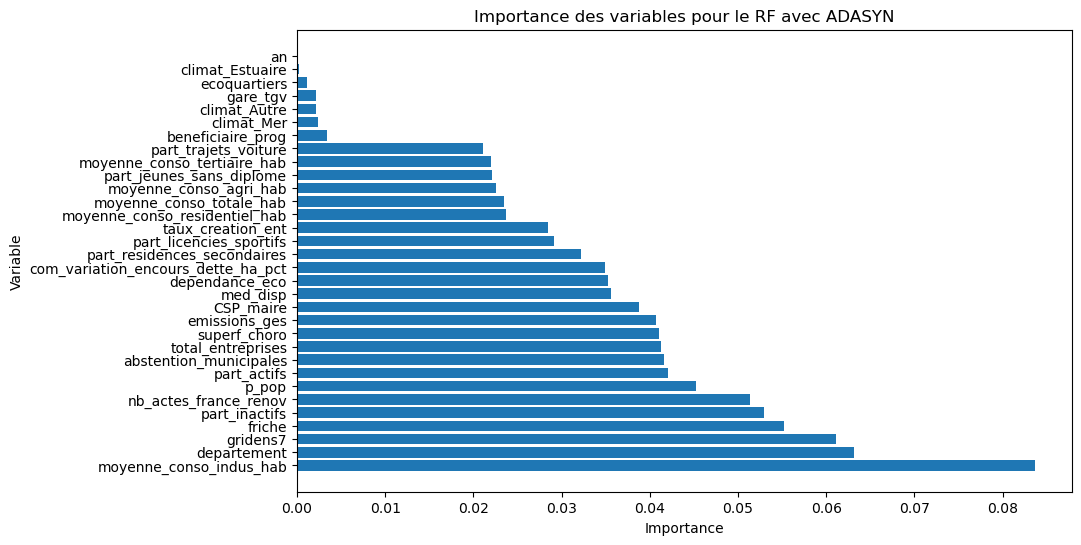

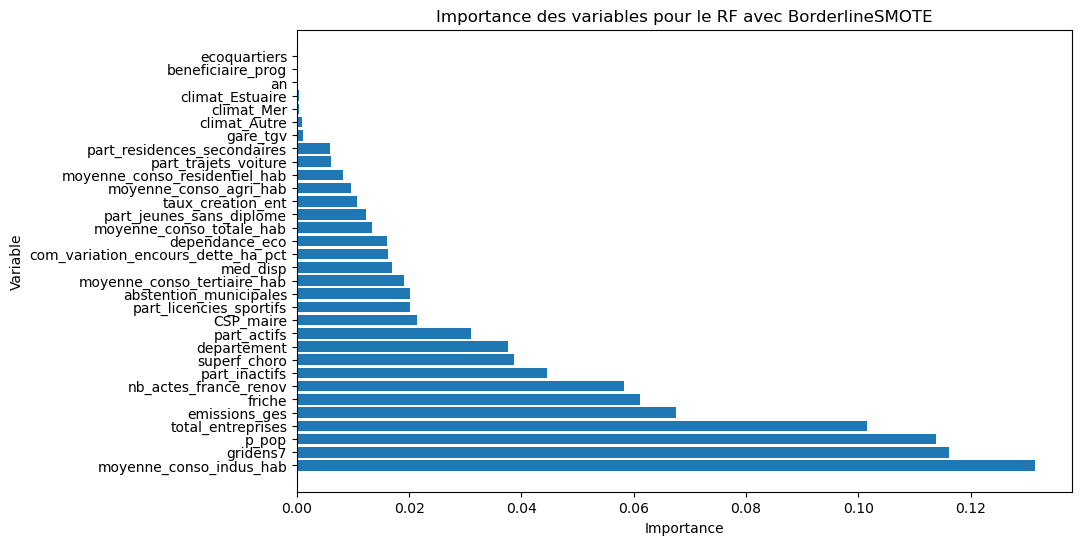

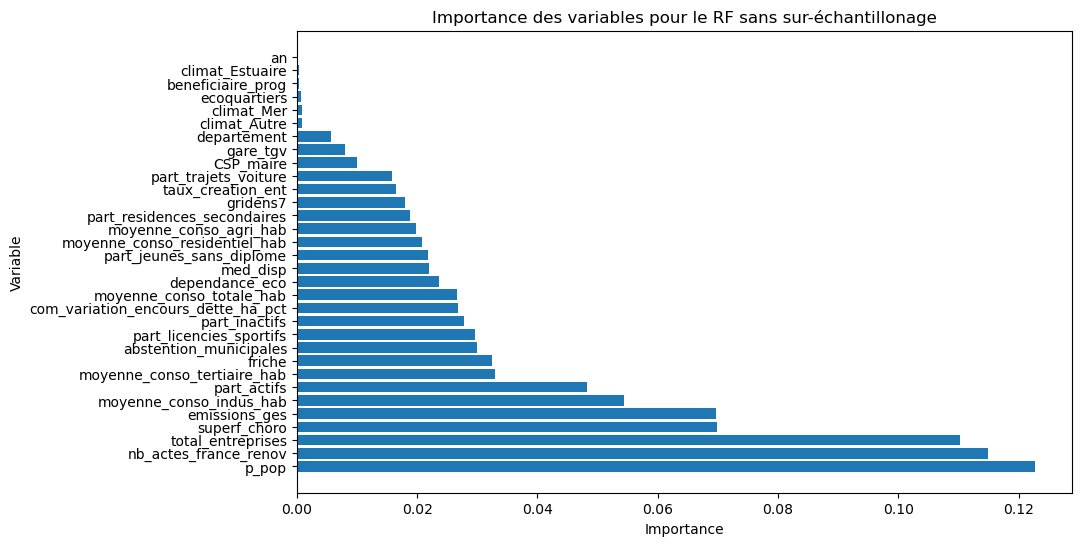

In [117]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_oversampler['Variable'], resultats_importance_variables_rf_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_smote['Variable'], resultats_importance_variables_rf_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_adasyn['Variable'], resultats_importance_variables_rf_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_borderline_smote['Variable'], resultats_importance_variables_rf_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf['Variable'], resultats_importance_variables_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF sans sur-échantillonage')
plt.show()

## I.2.4. Gradient Boosting

### A) Construction des modèles

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Construction des étapes
etapes_gb_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

modele_gb_randomoversampler = Pipeline(steps=etapes_gb_randomoversampler) # Création du pipeline
modele_gb_smote = Pipeline(steps=etapes_gb_smote) # Création du pipeline
modele_gb_adasyn = Pipeline(steps=etapes_gb_adasyn) # Création du pipeline
modele_gb_borderline_smote = Pipeline(steps=etapes_gb_borderline_smote) # Création du pipeline
modele_gb = Pipeline(steps=etapes_gb) # Création du pipeline

In [119]:
# Entraînement des modèles
modele_gb_randomoversampler.fit(X_train, y_train) # Entraînement
modele_gb_smote.fit(X_train, y_train) # Entraînement
modele_gb_adasyn.fit(X_train, y_train) # Entraînement
modele_gb_borderline_smote.fit(X_train, y_train) # Entraînement
modele_gb.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('gb', GradientBoostingClassifier())])

In [120]:
# Prédictions

y_proba_gb_randomoversampler = modele_gb_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler = modele_gb_randomoversampler.predict(X_test)

y_proba_gb_smote = modele_gb_smote.predict_proba(X_test)[:, 1]
y_pred_gb_smote = modele_gb_smote.predict(X_test)

y_proba_gb_adasyn = modele_gb_adasyn.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn = modele_gb_adasyn.predict(X_test)

y_proba_gb_borderline_smote = modele_gb_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_gb_borderline_smote = modele_gb_borderline_smote.predict(X_test)

y_proba_gb = modele_gb.predict_proba(X_test)[:, 1]
y_pred_gb = modele_gb.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [121]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

auc_roc_gb_randomoversampler = roc_auc_score(y_test, y_proba_gb_randomoversampler)
auc_pr_gb_randomoversampler = average_precision_score(y_test, y_proba_gb_randomoversampler)
log_loss_value_gb_randomoversampler = log_loss(y_test, y_proba_gb_randomoversampler)
precision_gb_randomoversampler = precision_score(y_test, y_pred_gb_randomoversampler)
recall_gb_randomoversampler = recall_score(y_test, y_pred_gb_randomoversampler)
f1_gb_randomoversampler = f1_score(y_test, y_pred_gb_randomoversampler)
mcc_gb_randomoversampler = matthews_corrcoef(y_test, y_pred_gb_randomoversampler)
balanced_acc_gb_randomoversampler = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler)
specificity_gb_randomoversampler = confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 1])
cohen_kappa_gb_randomoversampler = cohen_kappa_score(y_test, y_pred_gb_randomoversampler)

auc_roc_gb_smote = roc_auc_score(y_test, y_proba_gb_smote)
auc_pr_gb_smote = average_precision_score(y_test, y_proba_gb_smote)
log_loss_value_gb_smote = log_loss(y_test, y_proba_gb_smote)
precision_gb_smote = precision_score(y_test, y_pred_gb_smote)
recall_gb_smote = recall_score(y_test, y_pred_gb_smote)
f1_gb_smote = f1_score(y_test, y_pred_gb_smote)
mcc_gb_smote = matthews_corrcoef(y_test, y_pred_gb_smote)
balanced_acc_gb_smote = balanced_accuracy_score(y_test, y_pred_gb_smote)
specificity_gb_smote = confusion_matrix(y_test, y_pred_gb_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote)[0, 1])
cohen_kappa_gb_smote = cohen_kappa_score(y_test, y_pred_gb_smote)

auc_roc_gb_adasyn = roc_auc_score(y_test, y_proba_gb_adasyn)
auc_pr_gb_adasyn = average_precision_score(y_test, y_proba_gb_adasyn)
log_loss_value_gb_adasyn = log_loss(y_test, y_proba_gb_adasyn)
precision_gb_adasyn = precision_score(y_test, y_pred_gb_adasyn)
recall_gb_adasyn = recall_score(y_test, y_pred_gb_adasyn)
f1_gb_adasyn = f1_score(y_test, y_pred_gb_adasyn)
mcc_gb_adasyn = matthews_corrcoef(y_test, y_pred_gb_adasyn)
balanced_acc_gb_adasyn = balanced_accuracy_score(y_test, y_pred_gb_adasyn)
specificity_gb_adasyn = confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn)[0, 1])
cohen_kappa_gb_adasyn = cohen_kappa_score(y_test, y_pred_gb_adasyn)

auc_roc_gb_borderline_smote = roc_auc_score(y_test, y_proba_gb_borderline_smote)
auc_pr_gb_borderline_smote = average_precision_score(y_test, y_proba_gb_borderline_smote)
log_loss_value_gb_borderline_smote = log_loss(y_test, y_proba_gb_borderline_smote)
precision_gb_borderline_smote = precision_score(y_test, y_pred_gb_borderline_smote)
recall_gb_borderline_smote = recall_score(y_test, y_pred_gb_borderline_smote)
f1_gb_borderline_smote = f1_score(y_test, y_pred_gb_borderline_smote)
mcc_gb_borderline_smote = matthews_corrcoef(y_test, y_pred_gb_borderline_smote)
balanced_acc_gb_borderline_smote = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote)
specificity_gb_borderline_smote = confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 1])
cohen_kappa_gb_borderline_smote = cohen_kappa_score(y_test, y_pred_gb_borderline_smote)

auc_roc_gb = roc_auc_score(y_test, y_proba_gb)
auc_pr_gb = average_precision_score(y_test, y_proba_gb)
log_loss_value_gb = log_loss(y_test, y_proba_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
mcc_gb = matthews_corrcoef(y_test, y_pred_gb)
balanced_acc_gb = balanced_accuracy_score(y_test, y_pred_gb)
specificity_gb = confusion_matrix(y_test, y_pred_gb)[0, 0] / (confusion_matrix(y_test, y_pred_gb)[0, 0] + confusion_matrix(y_test, y_pred_gb)[0, 1])
cohen_kappa_gb = cohen_kappa_score(y_test, y_pred_gb)

In [122]:
# Affichage des résultats
resultats_gb = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb, auc_pr_gb, log_loss_value_gb, f1_gb, mcc_gb, balanced_acc_gb, specificity_gb, cohen_kappa_gb],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote, auc_pr_gb_smote, log_loss_value_gb_smote, f1_gb_smote, mcc_gb_smote, balanced_acc_gb_smote, specificity_gb_smote, cohen_kappa_gb_smote],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler, auc_pr_gb_randomoversampler, log_loss_value_gb_randomoversampler, f1_gb_randomoversampler, mcc_gb_randomoversampler, balanced_acc_gb_randomoversampler, specificity_gb_randomoversampler, cohen_kappa_gb_randomoversampler],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn, auc_pr_gb_adasyn, log_loss_value_gb_adasyn, f1_gb_adasyn, mcc_gb_adasyn, balanced_acc_gb_adasyn, specificity_gb_adasyn, cohen_kappa_gb_adasyn],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote, auc_pr_gb_borderline_smote, log_loss_value_gb_borderline_smote, f1_gb_borderline_smote, mcc_gb_borderline_smote, balanced_acc_gb_borderline_smote, specificity_gb_borderline_smote, cohen_kappa_gb_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb = resultats_gb.round(3)
resultats_gb

Gradient Boosting sans sur-échantillonnage  \
AUC-ROC                                           0.627   
AUC-PR                                            0.240   
Log loss                                          0.438   
F1                                                0.130   
MCC                                               0.099   
Accuracy                                          0.526   
Spécificité                                       0.971   
Kappa                                             0.075   

             Gradient Boosting avec SMOTE  \
AUC-ROC                             0.635   
AUC-PR                              0.257   
Log loss                            0.520   
F1                                  0.318   
MCC                                 0.175   
Accuracy                            0.599   
Spécificité                         0.820   
Kappa                               0.171   

             Gradient Boosting avec RandomOverSampler  \
AUC-ROC                                         0.616   
AUC-PR                                          0.239   
Log loss                                        0.468   
F1                                              0.154   
MCC                                             0.026   
Accuracy                                        0.511   
Spécificité                                     0.888   
Kappa                                           0.025   

             Gradient Boosting avec ADASYN  \
AUC-ROC                              0.630   
AUC-PR                               0.259   
Log loss                             0.500   
F1                                   0.244   
MCC                                  0.092   
Accuracy                             0.550   
Spécificité                          0.829   
Kappa                                0.091   

             Gradient Boosting avec BorderlineSMOTE  
AUC-ROC                                       0.623  
AUC-PR                                        0.205  
Log loss                                      0.513  
F1                                            0.220  
MCC                                           0.063  
Accuracy                                      0.534  
Spécificité                                   0.824  
Kappa                                         0.062

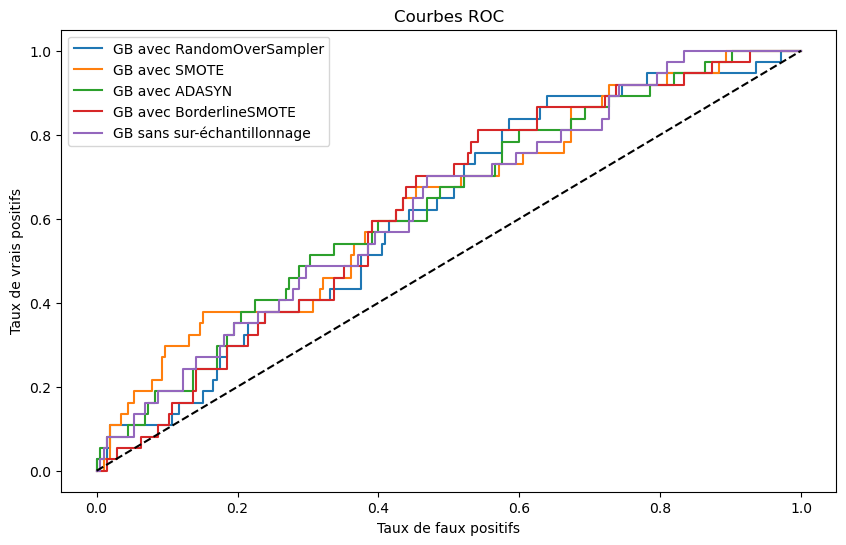

In [123]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_gb_randomoversampler, tpr_gb_randomoversampler, _ = roc_curve(y_test, y_proba_gb_randomoversampler)
fpr_gb_smote, tpr_gb_smote, _ = roc_curve(y_test, y_proba_gb_smote)
fpr_gb_adasyn, tpr_gb_adasyn, _ = roc_curve(y_test, y_proba_gb_adasyn)
fpr_gb_borderline_smote, tpr_gb_borderline_smote, _ = roc_curve(y_test, y_proba_gb_borderline_smote)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler, tpr_gb_randomoversampler, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote, tpr_gb_smote, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn, tpr_gb_adasyn, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote, tpr_gb_borderline_smote, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb, tpr_gb, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### C) Ajustement des hyperparamètres

In [124]:
# Ajustement des hyperparamètres par validation croisée

from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres pour le gradient boosting

param_grid_gb_oversampler = {
    'oversampler__sampling_strategy': ['auto', 0.5, 0.75, 1.0], 
    'gb__n_estimators': [100, 200, 300], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7], # Profondeur maximale de l'arbre
}

param_grid_gb_smote = {
    'smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'gb__n_estimators': [100, 200, 300], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7], # Profondeur maximale de l'arbre
}

param_grid_gb_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'gb__n_estimators': [100, 200, 300], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7], # Profondeur maximale de l'arbre
}

param_grid_gb_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'gb__n_estimators': [100, 200, 300], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7], # Profondeur maximale de l'arbre
}


param_grid_gb = {
    'gb__n_estimators': [100, 200, 300], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7], # Profondeur maximale de l'arbre
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Kappa': make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}


In [125]:
from sklearn.model_selection import RandomizedSearchCV

# Ajustement des hyperparamètres
grille_recherche_gb_randomoversampler = GridSearchCV(modele_gb_randomoversampler, param_grid_gb_oversampler, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_gb_smote = GridSearchCV(modele_gb_smote, param_grid_gb_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_gb_adasyn = GridSearchCV(modele_gb_adasyn, param_grid_gb_adasyn, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_gb_borderline_smote = GridSearchCV(modele_gb_borderline_smote, param_grid_gb_borderline_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_gb = GridSearchCV(modele_gb, param_grid_gb, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)

In [126]:
modele_gb_oversampler_opt = grille_recherche_gb_randomoversampler.fit(X_train, y_train).best_estimator_

In [127]:
modele_gb_smote_opt = grille_recherche_gb_smote.fit(X_train, y_train).best_estimator_

In [128]:
modele_gb_adasyn_opt = grille_recherche_gb_adasyn.fit(X_train, y_train).best_estimator_

In [129]:
modele_gb_borderline_smote_opt = grille_recherche_gb_borderline_smote.fit(X_train, y_train).best_estimator_

In [130]:
modele_gb_opt = grille_recherche_gb.fit(X_train, y_train).best_estimator_

In [131]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_gb_randomoversampler_cv = modele_gb_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler_cv = modele_gb_oversampler_opt.predict(X_test)

y_proba_gb_smote_cv = modele_gb_smote_opt.predict_proba(X_test)[:, 1]
y_pred_gb_smote_cv = modele_gb_smote_opt.predict(X_test)

y_proba_gb_adasyn_cv = modele_gb_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn_cv = modele_gb_adasyn_opt.predict(X_test)

y_proba_gb_borderline_smote_cv = modele_gb_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_gb_borderline_smote_cv = modele_gb_borderline_smote_opt.predict(X_test)

y_proba_gb_cv = modele_gb_opt.predict_proba(X_test)[:, 1]
y_pred_gb_cv = modele_gb_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [132]:
# Calcul des métriques

auc_roc_gb_randomoversampler_cv = roc_auc_score(y_test, y_proba_gb_randomoversampler_cv)
auc_pr_gb_randomoversampler_cv = average_precision_score(y_test, y_proba_gb_randomoversampler_cv)
log_loss_value_gb_randomoversampler_cv = log_loss(y_test, y_proba_gb_randomoversampler_cv)
precision_gb_randomoversampler_cv = precision_score(y_test, y_pred_gb_randomoversampler_cv)
recall_gb_randomoversampler_cv = recall_score(y_test, y_pred_gb_randomoversampler_cv)
f1_gb_randomoversampler_cv = f1_score(y_test, y_pred_gb_randomoversampler_cv)
mcc_gb_randomoversampler_cv = matthews_corrcoef(y_test, y_pred_gb_randomoversampler_cv)
balanced_acc_gb_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler_cv)
specificity_gb_randomoversampler_cv = confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 1])
cohen_kappa_gb_randomoversampler_cv = cohen_kappa_score(y_test, y_pred_gb_randomoversampler_cv)

auc_roc_gb_smote_cv = roc_auc_score(y_test, y_proba_gb_smote_cv)
auc_pr_gb_smote_cv = average_precision_score(y_test, y_proba_gb_smote_cv)
log_loss_value_gb_smote_cv = log_loss(y_test, y_proba_gb_smote_cv)
precision_gb_smote_cv = precision_score(y_test, y_pred_gb_smote_cv)
recall_gb_smote_cv = recall_score(y_test, y_pred_gb_smote_cv)
f1_gb_smote_cv = f1_score(y_test, y_pred_gb_smote_cv)
mcc_gb_smote_cv = matthews_corrcoef(y_test, y_pred_gb_smote_cv)
balanced_acc_gb_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_smote_cv)
specificity_gb_smote_cv = confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 1])
cohen_kappa_gb_smote_cv = cohen_kappa_score(y_test, y_pred_gb_smote_cv)

auc_roc_gb_adasyn_cv = roc_auc_score(y_test, y_proba_gb_adasyn_cv)
auc_pr_gb_adasyn_cv = average_precision_score(y_test, y_proba_gb_adasyn_cv)
log_loss_value_gb_adasyn_cv = log_loss(y_test, y_proba_gb_adasyn_cv)
precision_gb_adasyn_cv = precision_score(y_test, y_pred_gb_adasyn_cv)
recall_gb_adasyn_cv = recall_score(y_test, y_pred_gb_adasyn_cv)
f1_gb_adasyn_cv = f1_score(y_test, y_pred_gb_adasyn_cv)
mcc_gb_adasyn_cv = matthews_corrcoef(y_test, y_pred_gb_adasyn_cv)
balanced_acc_gb_adasyn_cv = balanced_accuracy_score(y_test, y_pred_gb_adasyn_cv)
specificity_gb_adasyn_cv = confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 1])
cohen_kappa_gb_adasyn_cv = cohen_kappa_score(y_test, y_pred_gb_adasyn_cv)

auc_roc_gb_borderline_smote_cv = roc_auc_score(y_test, y_proba_gb_borderline_smote_cv)
auc_pr_gb_borderline_smote_cv = average_precision_score(y_test, y_proba_gb_borderline_smote_cv)
log_loss_value_gb_borderline_smote_cv = log_loss(y_test, y_proba_gb_borderline_smote_cv)
precision_gb_borderline_smote_cv = precision_score(y_test, y_pred_gb_borderline_smote_cv)
recall_gb_borderline_smote_cv = recall_score(y_test, y_pred_gb_borderline_smote_cv)
f1_gb_borderline_smote_cv = f1_score(y_test, y_pred_gb_borderline_smote_cv)
mcc_gb_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_gb_borderline_smote_cv)
balanced_acc_gb_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote_cv)
specificity_gb_borderline_smote_cv = confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 1])
cohen_kappa_gb_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_gb_borderline_smote_cv)

auc_roc_gb_cv = roc_auc_score(y_test, y_proba_gb_cv)
auc_pr_gb_cv = average_precision_score(y_test, y_proba_gb_cv)
log_loss_value_gb_cv = log_loss(y_test, y_proba_gb_cv)
precision_gb_cv = precision_score(y_test, y_pred_gb_cv)
recall_gb_cv = recall_score(y_test, y_pred_gb_cv)
f1_gb_cv = f1_score(y_test, y_pred_gb_cv)
mcc_gb_cv = matthews_corrcoef(y_test, y_pred_gb_cv)
balanced_acc_gb_cv = balanced_accuracy_score(y_test, y_pred_gb_cv)
specificity_gb_cv = confusion_matrix(y_test, y_pred_gb_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_cv)[0, 1])
cohen_kappa_gb_cv = cohen_kappa_score(y_test, y_pred_gb_cv)

In [133]:
# Affichage des résultats

resultats_gb_cv = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb_cv, auc_pr_gb_cv, log_loss_value_gb_cv, f1_gb_cv, mcc_gb_cv, balanced_acc_gb_cv, specificity_gb_cv, cohen_kappa_gb_cv],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote_cv, auc_pr_gb_smote_cv, log_loss_value_gb_smote_cv, f1_gb_smote_cv, mcc_gb_smote_cv, balanced_acc_gb_smote_cv, specificity_gb_smote_cv, cohen_kappa_gb_smote_cv],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler_cv, auc_pr_gb_randomoversampler_cv, log_loss_value_gb_randomoversampler_cv, f1_gb_randomoversampler_cv, mcc_gb_randomoversampler_cv, balanced_acc_gb_randomoversampler_cv, specificity_gb_randomoversampler_cv, cohen_kappa_gb_randomoversampler_cv],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn_cv, auc_pr_gb_adasyn_cv, log_loss_value_gb_adasyn_cv, f1_gb_adasyn_cv, mcc_gb_adasyn_cv, balanced_acc_gb_adasyn_cv, specificity_gb_adasyn_cv, cohen_kappa_gb_adasyn_cv],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote_cv, auc_pr_gb_borderline_smote_cv, log_loss_value_gb_borderline_smote_cv, f1_gb_borderline_smote_cv, mcc_gb_borderline_smote_cv, balanced_acc_gb_borderline_smote_cv, specificity_gb_borderline_smote_cv, cohen_kappa_gb_borderline_smote_cv]
}, index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb_cv = resultats_gb_cv.round(3)
resultats_gb_cv

# Export
resultats_gb_cv.to_csv("resultats_gb_cv.csv", index=True)
latex_table_gb = resultats_gb_cv.to_latex(index=True)
print(latex_table_gb)

\begin{tabular}{lrrrrr}
\toprule
 & Gradient Boosting sans sur-échantillonnage & Gradient Boosting avec SMOTE & Gradient Boosting avec RandomOverSampler & Gradient Boosting avec ADASYN & Gradient Boosting avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.585000 & 0.667000 & 0.577000 & 0.639000 & 0.629000 \\
AUC-PR & 0.243000 & 0.251000 & 0.249000 & 0.228000 & 0.224000 \\
Log loss & 0.592000 & 0.508000 & 1.495000 & 0.508000 & 0.503000 \\
F1 & 0.085000 & 0.276000 & 0.189000 & 0.265000 & 0.216000 \\
MCC & 0.027000 & 0.124000 & 0.118000 & 0.116000 & 0.075000 \\
Accuracy & 0.508000 & 0.569000 & 0.541000 & 0.563000 & 0.537000 \\
Spécificité & 0.961000 & 0.815000 & 0.946000 & 0.829000 & 0.859000 \\
Kappa & 0.021000 & 0.121000 & 0.106000 & 0.115000 & 0.075000 \\
\bottomrule
\end{tabular}



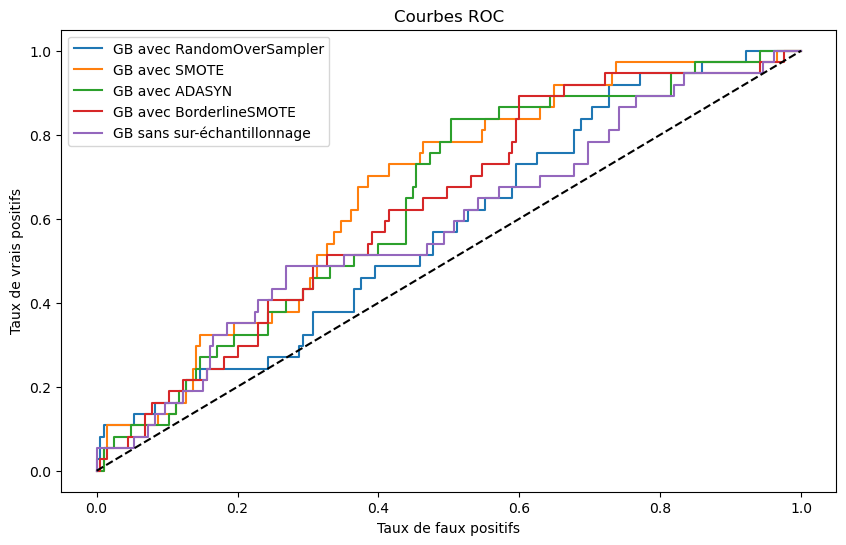

In [134]:
# Courbes ROC

fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, _ = roc_curve(y_test, y_proba_gb_randomoversampler_cv)
fpr_gb_smote_cv, tpr_gb_smote_cv, _ = roc_curve(y_test, y_proba_gb_smote_cv)
fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, _ = roc_curve(y_test, y_proba_gb_adasyn_cv)
fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, _ = roc_curve(y_test, y_proba_gb_borderline_smote_cv)
fpr_gb_cv, tpr_gb_cv, _ = roc_curve(y_test, y_proba_gb_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote_cv, tpr_gb_smote_cv, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb_cv, tpr_gb_cv, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### E) Importance des variables

In [135]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_gb_randomoversampler = grille_recherche_gb_randomoversampler.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_smote = grille_recherche_gb_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_adasyn = grille_recherche_gb_adasyn.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_borderline_smote = grille_recherche_gb_borderline_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb = grille_recherche_gb.best_estimator_.named_steps['gb'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_gb_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_randomoversampler
})

resultats_importance_variables_gb_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_smote
})

resultats_importance_variables_gb_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_adasyn
})

resultats_importance_variables_gb_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_borderline_smote
})

resultats_importance_variables_gb = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb
})

# Affichage des résultats
resultats_importance_variables_gb_randomoversampler = resultats_importance_variables_gb_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_smote = resultats_importance_variables_gb_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_adasyn = resultats_importance_variables_gb_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_borderline_smote = resultats_importance_variables_gb_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_gb = resultats_importance_variables_gb.sort_values(by="Importance", ascending=False)

resultats_importance_variables_gb_randomoversampler

Variable  Importance
18                               p_pop    0.099335
21                       part_inactifs    0.073677
12                        superf_choro    0.070030
16                            med_disp    0.068930
22                         part_actifs    0.066349
6                nb_actes_france_renov    0.060636
27             part_licencies_sportifs    0.057575
20  com_variation_encours_dette_ha_pct    0.057126
5                        emissions_ges    0.044557
19                           CSP_maire    0.043527
24              abstention_municipales    0.041039
1              moyenne_conso_indus_hab    0.037596
3        moyenne_conso_residentiel_hab    0.037563
2          moyenne_conso_tertiaire_hab    0.034442
4             moyenne_conso_totale_hab    0.032916
9          part_residences_secondaires    0.024289
11                            gridens7    0.022173
26                   total_entreprises    0.021906
15                part_trajets_voiture    0.021272
28            part_jeunes_sans_diplome    0.019157
25                   taux_creation_ent    0.018190
23                      dependance_eco    0.017447
0               moyenne_conso_agri_hab    0.016072
10                   beneficiaire_prog    0.003563
13                         departement    0.003312
30                     climat_Estuaire    0.002923
7                               friche    0.002841
31                          climat_Mer    0.000507
8                         ecoquartiers    0.000501
14                            gare_tgv    0.000430
29                        climat_Autre    0.000116
17                                  an    0.000000

In [136]:
resultats_importance_variables_gb_smote

Variable  Importance
13                         departement    0.192445
7                               friche    0.190092
11                            gridens7    0.093115
1              moyenne_conso_indus_hab    0.085386
26                   total_entreprises    0.049748
19                           CSP_maire    0.046509
18                               p_pop    0.034974
22                         part_actifs    0.032581
21                       part_inactifs    0.031651
6                nb_actes_france_renov    0.028887
12                        superf_choro    0.028339
20  com_variation_encours_dette_ha_pct    0.020507
23                      dependance_eco    0.018722
9          part_residences_secondaires    0.017622
25                   taux_creation_ent    0.016291
16                            med_disp    0.016100
3        moyenne_conso_residentiel_hab    0.015205
4             moyenne_conso_totale_hab    0.014800
15                part_trajets_voiture    0.014302
27             part_licencies_sportifs    0.014286
24              abstention_municipales    0.012603
0               moyenne_conso_agri_hab    0.010037
2          moyenne_conso_tertiaire_hab    0.009378
5                        emissions_ges    0.003208
28            part_jeunes_sans_diplome    0.002106
10                   beneficiaire_prog    0.000845
8                         ecoquartiers    0.000261
17                                  an    0.000000
14                            gare_tgv    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [137]:
resultats_importance_variables_gb_adasyn

Variable  Importance
13                         departement    0.185727
7                               friche    0.156667
11                            gridens7    0.156476
6                nb_actes_france_renov    0.071491
1              moyenne_conso_indus_hab    0.066699
19                           CSP_maire    0.049909
21                       part_inactifs    0.048676
20  com_variation_encours_dette_ha_pct    0.024559
22                         part_actifs    0.023909
26                   total_entreprises    0.019608
12                        superf_choro    0.019441
5                        emissions_ges    0.017554
27             part_licencies_sportifs    0.016606
9          part_residences_secondaires    0.016400
18                               p_pop    0.014917
16                            med_disp    0.014825
2          moyenne_conso_tertiaire_hab    0.012515
23                      dependance_eco    0.012309
24              abstention_municipales    0.012058
25                   taux_creation_ent    0.012041
15                part_trajets_voiture    0.010526
3        moyenne_conso_residentiel_hab    0.010129
4             moyenne_conso_totale_hab    0.007864
28            part_jeunes_sans_diplome    0.007698
0               moyenne_conso_agri_hab    0.006143
10                   beneficiaire_prog    0.003247
14                            gare_tgv    0.002006
17                                  an    0.000000
8                         ecoquartiers    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [138]:
resultats_importance_variables_gb_adasyn

Variable  Importance
13                         departement    0.185727
7                               friche    0.156667
11                            gridens7    0.156476
6                nb_actes_france_renov    0.071491
1              moyenne_conso_indus_hab    0.066699
19                           CSP_maire    0.049909
21                       part_inactifs    0.048676
20  com_variation_encours_dette_ha_pct    0.024559
22                         part_actifs    0.023909
26                   total_entreprises    0.019608
12                        superf_choro    0.019441
5                        emissions_ges    0.017554
27             part_licencies_sportifs    0.016606
9          part_residences_secondaires    0.016400
18                               p_pop    0.014917
16                            med_disp    0.014825
2          moyenne_conso_tertiaire_hab    0.012515
23                      dependance_eco    0.012309
24              abstention_municipales    0.012058
25                   taux_creation_ent    0.012041
15                part_trajets_voiture    0.010526
3        moyenne_conso_residentiel_hab    0.010129
4             moyenne_conso_totale_hab    0.007864
28            part_jeunes_sans_diplome    0.007698
0               moyenne_conso_agri_hab    0.006143
10                   beneficiaire_prog    0.003247
14                            gare_tgv    0.002006
17                                  an    0.000000
8                         ecoquartiers    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [139]:
resultats_importance_variables_gb

Variable  Importance
0               moyenne_conso_agri_hab    0.045414
1              moyenne_conso_indus_hab    0.035930
2          moyenne_conso_tertiaire_hab    0.033801
3        moyenne_conso_residentiel_hab    0.041795
4             moyenne_conso_totale_hab    0.045729
5                        emissions_ges    0.042517
6                nb_actes_france_renov    0.054546
7                               friche    0.017448
8                         ecoquartiers    0.002279
9          part_residences_secondaires    0.026350
10                   beneficiaire_prog    0.002532
11                            gridens7    0.009939
12                        superf_choro    0.049524
13                         departement    0.008438
14                            gare_tgv    0.006472
15                part_trajets_voiture    0.040213
16                            med_disp    0.041725
17                                  an    0.000000
18                               p_pop    0.067046
19                           CSP_maire    0.026655
20  com_variation_encours_dette_ha_pct    0.065543
21                       part_inactifs    0.070578
22                         part_actifs    0.047075
23                      dependance_eco    0.019445
24              abstention_municipales    0.027783
25                   taux_creation_ent    0.035114
26                   total_entreprises    0.041086
27             part_licencies_sportifs    0.060357
28            part_jeunes_sans_diplome    0.029537
29                        climat_Autre    0.001236
30                     climat_Estuaire    0.003653
31                          climat_Mer    0.000240

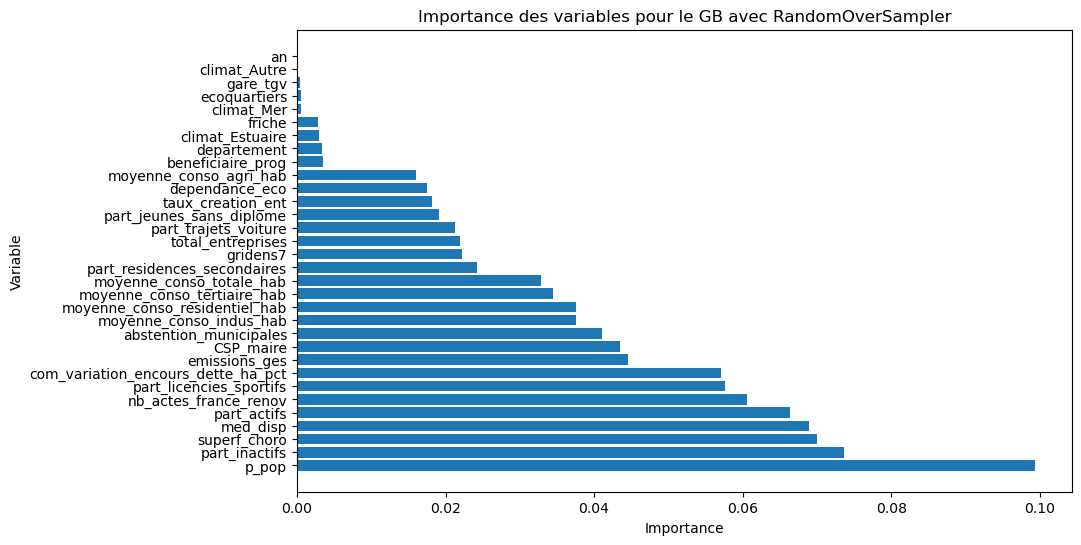

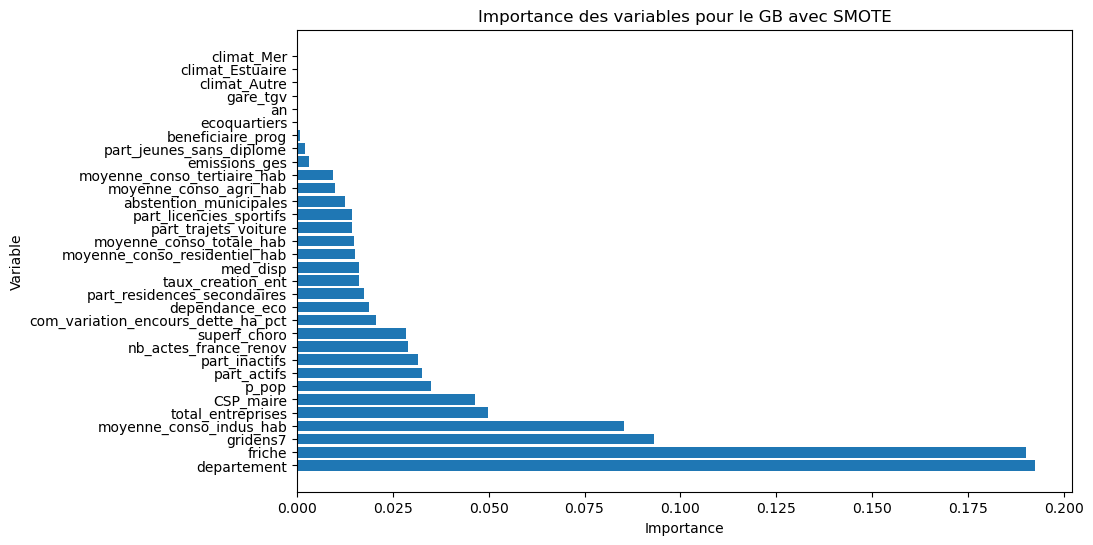

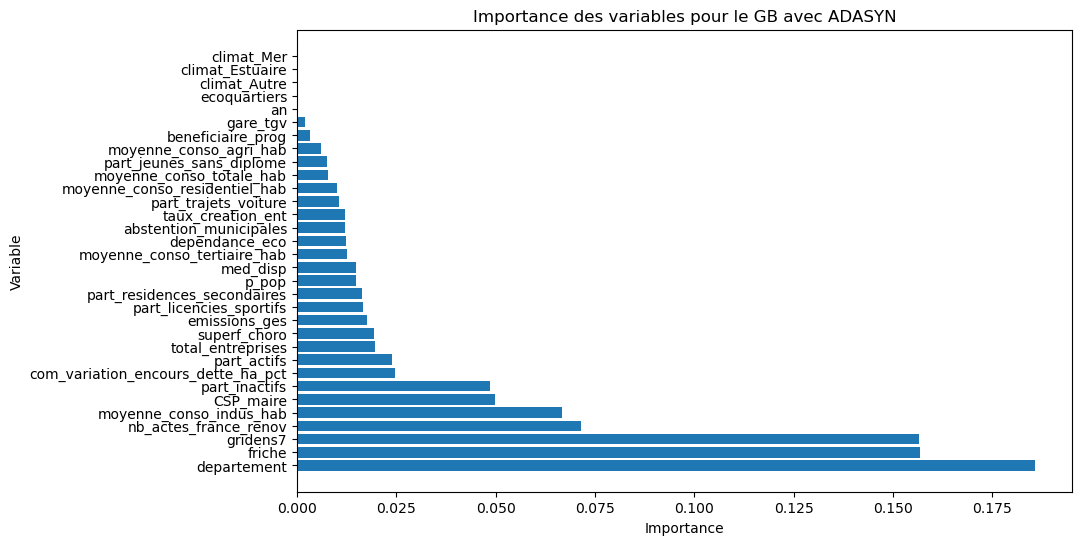

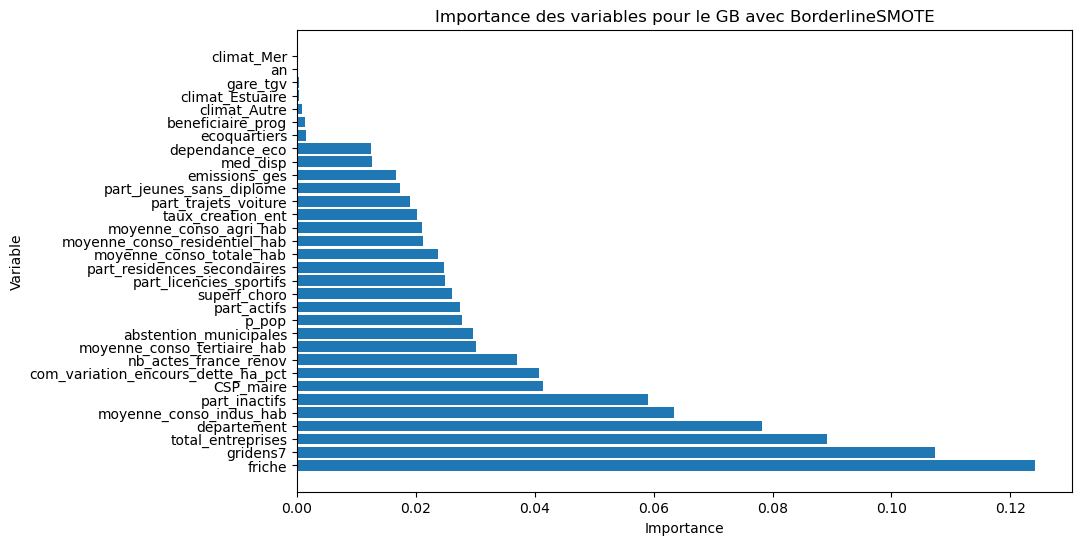

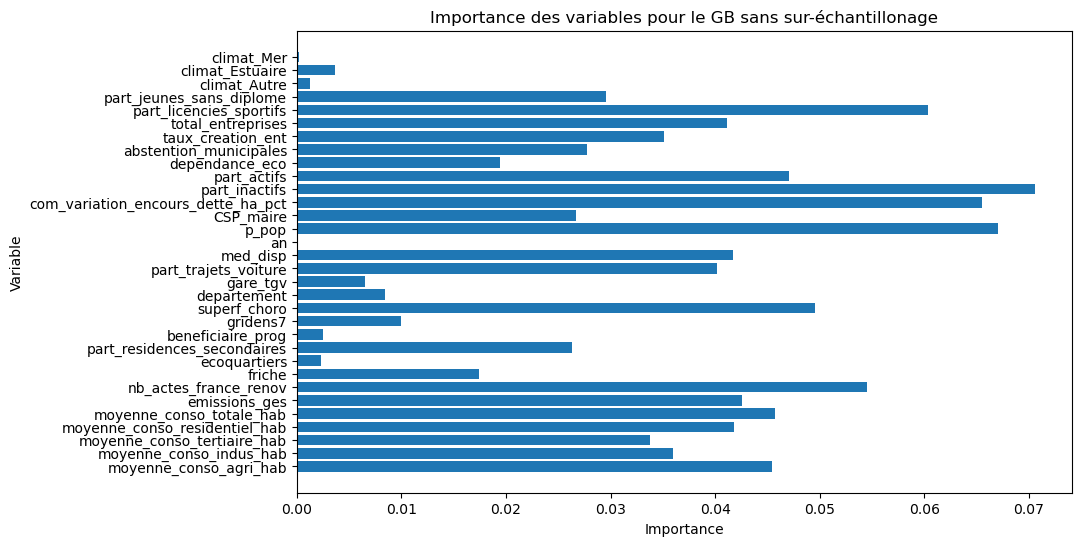

In [140]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_randomoversampler['Variable'], resultats_importance_variables_gb_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_smote['Variable'], resultats_importance_variables_gb_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_adasyn['Variable'], resultats_importance_variables_gb_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_borderline_smote['Variable'], resultats_importance_variables_gb_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb['Variable'], resultats_importance_variables_gb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB sans sur-échantillonage')
plt.show()

## I.2.5. Adaboost

### A) Construction des modèles

In [141]:
# Construction des modèles
from sklearn.ensemble import AdaBoostClassifier

etapes_adaboost_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

modele_adaboost_randomoversampler = Pipeline(steps=etapes_adaboost_randomoversampler) # Création du pipeline
modele_adaboost_smote = Pipeline(steps=etapes_adaboost_smote) # Création du pipeline
modele_adaboost_adasyn = Pipeline(steps=etapes_adaboost_adasyn) # Création du pipeline
modele_adaboost_borderline_smote = Pipeline(steps=etapes_adaboost_borderline_smote) # Création du pipeline
modele_adaboost = Pipeline(steps=etapes_adaboost) # Création du pipeline

In [142]:
modele_adaboost_randomoversampler.fit(X_train, y_train) # Entraînement
modele_adaboost_smote.fit(X_train, y_train) # Entraînement
modele_adaboost_adasyn.fit(X_train, y_train) # Entraînement
modele_adaboost_borderline_smote.fit(X_train, y_train) # Entraînement
modele_adaboost.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adaboost', AdaBoostClassifier())])

In [143]:
# Prédictions

y_proba_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict(X_test)

y_proba_adaboost_smote = modele_adaboost_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote = modele_adaboost_smote.predict(X_test)

y_proba_adaboost_adasyn = modele_adaboost_adasyn.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn = modele_adaboost_adasyn.predict(X_test)

y_proba_adaboost_borderline_smote = modele_adaboost_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote = modele_adaboost_borderline_smote.predict(X_test)

y_proba_adaboost = modele_adaboost.predict_proba(X_test)[:, 1]
y_pred_adaboost = modele_adaboost.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [144]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler = roc_auc_score(y_test, y_proba_adaboost_randomoversampler)
auc_pr_adaboost_randomoversampler = average_precision_score(y_test, y_proba_adaboost_randomoversampler)
log_loss_value_adaboost_randomoversampler = log_loss(y_test, y_proba_adaboost_randomoversampler)
precision_adaboost_randomoversampler = precision_score(y_test, y_pred_adaboost_randomoversampler)
recall_adaboost_randomoversampler = recall_score(y_test, y_pred_adaboost_randomoversampler)
f1_adaboost_randomoversampler = f1_score(y_test, y_pred_adaboost_randomoversampler)
mcc_adaboost_randomoversampler = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler)
balanced_acc_adaboost_randomoversampler = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler)
specificity_adaboost_randomoversampler = confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 1])
cohen_kappa_adaboost_randomoversampler = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler)

auc_roc_adaboost_smote = roc_auc_score(y_test, y_proba_adaboost_smote)
auc_pr_adaboost_smote = average_precision_score(y_test, y_proba_adaboost_smote)
log_loss_value_adaboost_smote = log_loss(y_test, y_proba_adaboost_smote)
precision_adaboost_smote = precision_score(y_test, y_pred_adaboost_smote)
recall_adaboost_smote = recall_score(y_test, y_pred_adaboost_smote)
f1_adaboost_smote = f1_score(y_test, y_pred_adaboost_smote)
mcc_adaboost_smote = matthews_corrcoef(y_test, y_pred_adaboost_smote)
balanced_acc_adaboost_smote = balanced_accuracy_score(y_test, y_pred_adaboost_smote)
specificity_adaboost_smote = confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote)[0, 1])
cohen_kappa_adaboost_smote = cohen_kappa_score(y_test, y_pred_adaboost_smote)

auc_roc_adaboost_adasyn = roc_auc_score(y_test, y_proba_adaboost_adasyn)
auc_pr_adaboost_adasyn = average_precision_score(y_test, y_proba_adaboost_adasyn)
log_loss_value_adaboost_adasyn = log_loss(y_test, y_proba_adaboost_adasyn)
precision_adaboost_adasyn = precision_score(y_test, y_pred_adaboost_adasyn)
recall_adaboost_adasyn = recall_score(y_test, y_pred_adaboost_adasyn)
f1_adaboost_adasyn = f1_score(y_test, y_pred_adaboost_adasyn)
mcc_adaboost_adasyn = matthews_corrcoef(y_test, y_pred_adaboost_adasyn)
balanced_acc_adaboost_adasyn = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn)
specificity_adaboost_adasyn = confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 1])
cohen_kappa_adaboost_adasyn = cohen_kappa_score(y_test, y_pred_adaboost_adasyn)

auc_roc_adaboost_borderline_smote = roc_auc_score(y_test, y_proba_adaboost_borderline_smote)
auc_pr_adaboost_borderline_smote = average_precision_score(y_test, y_proba_adaboost_borderline_smote)
log_loss_value_adaboost_borderline_smote = log_loss(y_test, y_proba_adaboost_borderline_smote)
precision_adaboost_borderline_smote = precision_score(y_test, y_pred_adaboost_borderline_smote)
recall_adaboost_borderline_smote = recall_score(y_test, y_pred_adaboost_borderline_smote)
f1_adaboost_borderline_smote = f1_score(y_test, y_pred_adaboost_borderline_smote)
mcc_adaboost_borderline_smote = matthews_corrcoef(y_test, y_pred_adaboost_borderline_smote)
balanced_acc_adaboost_borderline_smote = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote)
specificity_adaboost_borderline_smote = confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 1])
cohen_kappa_adaboost_borderline_smote = cohen_kappa_score(y_test, y_pred_adaboost_borderline_smote)

auc_roc_adaboost = roc_auc_score(y_test, y_proba_adaboost)
auc_pr_adaboost = average_precision_score(y_test, y_proba_adaboost)
log_loss_value_adaboost = log_loss(y_test, y_proba_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
mcc_adaboost = matthews_corrcoef(y_test, y_pred_adaboost)
balanced_acc_adaboost = balanced_accuracy_score(y_test, y_pred_adaboost)
specificity_adaboost = confusion_matrix(y_test, y_pred_adaboost)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost)[0, 0] + confusion_matrix(y_test, y_pred_adaboost)[0, 1])
cohen_kappa_adaboost = cohen_kappa_score(y_test, y_pred_adaboost)

In [145]:
# Affichage des résultats

resultats_adaboost = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost, auc_pr_adaboost, log_loss_value_adaboost, f1_adaboost, mcc_adaboost, balanced_acc_adaboost, specificity_adaboost, cohen_kappa_adaboost],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote, auc_pr_adaboost_smote, log_loss_value_adaboost_smote, f1_adaboost_smote, mcc_adaboost_smote, balanced_acc_adaboost_smote, specificity_adaboost_smote, cohen_kappa_adaboost_smote],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler, auc_pr_adaboost_randomoversampler, log_loss_value_adaboost_randomoversampler, f1_adaboost_randomoversampler, mcc_adaboost_randomoversampler, balanced_acc_adaboost_randomoversampler, specificity_adaboost_randomoversampler, cohen_kappa_adaboost_randomoversampler],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn, auc_pr_adaboost_adasyn, log_loss_value_adaboost_adasyn, f1_adaboost_adasyn, mcc_adaboost_adasyn, balanced_acc_adaboost_adasyn, specificity_adaboost_adasyn, cohen_kappa_adaboost_adasyn],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote, auc_pr_adaboost_borderline_smote, log_loss_value_adaboost_borderline_smote, f1_adaboost_borderline_smote, mcc_adaboost_borderline_smote, balanced_acc_adaboost_borderline_smote, specificity_adaboost_borderline_smote, cohen_kappa_adaboost_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost = resultats_adaboost.round(3)
resultats_adaboost

AdaBoost sans sur-échantillonnage  AdaBoost avec SMOTE  \
AUC-ROC                                  0.628                0.663   
AUC-PR                                   0.270                0.252   
Log loss                                 0.647                0.656   
F1                                       0.197                0.333   
MCC                                      0.090                0.187   
Accuracy                                 0.537                0.611   
Spécificité                              0.912                0.790   
Kappa                                    0.087                0.179   

             AdaBoost avec RandomOverSampler  AdaBoost avec ADASYN  \
AUC-ROC                                0.645                 0.600   
AUC-PR                                 0.266                 0.231   
Log loss                               0.651                 0.665   
F1                                     0.289                 0.255   
MCC                                    0.157                 0.071   
Accuracy                               0.580                 0.545   
Spécificité                            0.863                 0.712   
Kappa                                  0.157                 0.065   

             AdaBoost avec BorderlineSMOTE  
AUC-ROC                              0.603  
AUC-PR                               0.221  
Log loss                             0.665  
F1                                   0.263  
MCC                                  0.093  
Accuracy                             0.556  
Spécificité                          0.761  
Kappa                                0.088

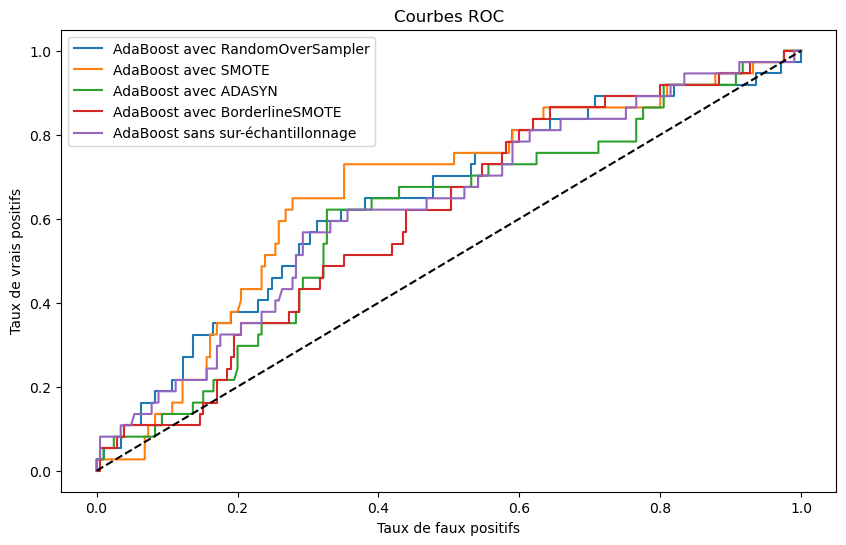

In [146]:
# Courbes ROC

fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler)
fpr_adaboost_smote, tpr_adaboost_smote, _ = roc_curve(y_test, y_proba_adaboost_smote)
fpr_adaboost_adasyn, tpr_adaboost_adasyn, _ = roc_curve(y_test, y_proba_adaboost_adasyn)
fpr_adaboost_borderline_smote, tpr_adaboost_borderline_smote, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote)
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_proba_adaboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote, tpr_adaboost_smote, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn, tpr_adaboost_adasyn, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote, tpr_adaboost_borderline_smote, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### C) Ajustement des hyperparamètres

In [147]:
# Ajustement des hyperparamètres par validation croisée

# Définition de la grille des hyperparamètres pour le AdaBoost

param_grid_adaboost_oversampler = {
    'oversampler__sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

param_grid_adaboost_smote = {
    'smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

param_grid_adaboost_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

param_grid_adaboost_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

param_grid_adaboost = {
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Kappa': make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}


In [148]:
# Ajustement des hyperparamètres

grille_recherche_adaboost_randomoversampler = GridSearchCV(modele_adaboost_randomoversampler, param_grid_adaboost_oversampler, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_adaboost_smote = GridSearchCV(modele_adaboost_smote, param_grid_adaboost_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_adaboost_adasyn = GridSearchCV(modele_adaboost_adasyn, param_grid_adaboost_adasyn, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_adaboost_borderline_smote = GridSearchCV(modele_adaboost_borderline_smote, param_grid_adaboost_borderline_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_adaboost = GridSearchCV(modele_adaboost, param_grid_adaboost, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)

In [149]:
# Sélection du meilleur modèle

modele_adaboost_randomoversampler_opt = grille_recherche_adaboost_randomoversampler.fit(X_train, y_train).best_estimator_

In [150]:
modele_adaboost_smote_opt = grille_recherche_adaboost_smote.fit(X_train, y_train).best_estimator_

In [151]:
modele_adaboost_adasyn_opt = grille_recherche_adaboost_adasyn.fit(X_train, y_train).best_estimator_

In [152]:
modele_adaboost_borderline_smote_opt = grille_recherche_adaboost_borderline_smote.fit(X_train, y_train).best_estimator_

In [153]:
modele_adaboost_opt = grille_recherche_adaboost.fit(X_train, y_train).best_estimator_

In [154]:
# Prédictions

y_proba_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt.predict(X_test)

y_proba_adaboost_smote_cv = modele_adaboost_smote_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote_cv = modele_adaboost_smote_opt.predict(X_test)

y_proba_adaboost_adasyn_cv = modele_adaboost_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn_cv = modele_adaboost_adasyn_opt.predict(X_test)

y_proba_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt.predict(X_test)

y_proba_adaboost_cv = modele_adaboost_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_cv = modele_adaboost_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [155]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler_cv = roc_auc_score(y_test, y_proba_adaboost_randomoversampler_cv)
auc_pr_adaboost_randomoversampler_cv = average_precision_score(y_test, y_proba_adaboost_randomoversampler_cv)
log_loss_value_adaboost_randomoversampler_cv = log_loss(y_test, y_proba_adaboost_randomoversampler_cv)
precision_adaboost_randomoversampler_cv = precision_score(y_test, y_pred_adaboost_randomoversampler_cv)
recall_adaboost_randomoversampler_cv = recall_score(y_test, y_pred_adaboost_randomoversampler_cv)
f1_adaboost_randomoversampler_cv = f1_score(y_test, y_pred_adaboost_randomoversampler_cv)
mcc_adaboost_randomoversampler_cv = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler_cv)
balanced_acc_adaboost_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler_cv)
specificity_adaboost_randomoversampler_cv = confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 1])
cohen_kappa_adaboost_randomoversampler_cv = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler_cv)

auc_roc_adaboost_smote_cv = roc_auc_score(y_test, y_proba_adaboost_smote_cv)
auc_pr_adaboost_smote_cv = average_precision_score(y_test, y_proba_adaboost_smote_cv)
log_loss_value_adaboost_smote_cv = log_loss(y_test, y_proba_adaboost_smote_cv)
precision_adaboost_smote_cv = precision_score(y_test, y_pred_adaboost_smote_cv)
recall_adaboost_smote_cv = recall_score(y_test, y_pred_adaboost_smote_cv)
f1_adaboost_smote_cv = f1_score(y_test, y_pred_adaboost_smote_cv)
mcc_adaboost_smote_cv = matthews_corrcoef(y_test, y_pred_adaboost_smote_cv)
balanced_acc_adaboost_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_smote_cv)
specificity_adaboost_smote_cv = confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 1])
cohen_kappa_adaboost_smote_cv = cohen_kappa_score(y_test, y_pred_adaboost_smote_cv)

auc_roc_adaboost_adasyn_cv = roc_auc_score(y_test, y_proba_adaboost_adasyn_cv)
auc_pr_adaboost_adasyn_cv = average_precision_score(y_test, y_proba_adaboost_adasyn_cv)
log_loss_value_adaboost_adasyn_cv = log_loss(y_test, y_proba_adaboost_adasyn_cv)
precision_adaboost_adasyn_cv = precision_score(y_test, y_pred_adaboost_adasyn_cv)
recall_adaboost_adasyn_cv = recall_score(y_test, y_pred_adaboost_adasyn_cv)
f1_adaboost_adasyn_cv = f1_score(y_test, y_pred_adaboost_adasyn_cv)
mcc_adaboost_adasyn_cv = matthews_corrcoef(y_test, y_pred_adaboost_adasyn_cv)
balanced_acc_adaboost_adasyn_cv = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn_cv)
specificity_adaboost_adasyn_cv = confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 1])
cohen_kappa_adaboost_adasyn_cv = cohen_kappa_score(y_test, y_pred_adaboost_adasyn_cv)

auc_roc_adaboost_borderline_smote_cv = roc_auc_score(y_test, y_proba_adaboost_borderline_smote_cv)
auc_pr_adaboost_borderline_smote_cv = average_precision_score(y_test, y_proba_adaboost_borderline_smote_cv)
log_loss_value_adaboost_borderline_smote_cv = log_loss(y_test, y_proba_adaboost_borderline_smote_cv)
precision_adaboost_borderline_smote_cv = precision_score(y_test, y_pred_adaboost_borderline_smote_cv)
recall_adaboost_borderline_smote_cv = recall_score(y_test, y_pred_adaboost_borderline_smote_cv)
f1_adaboost_borderline_smote_cv = f1_score(y_test, y_pred_adaboost_borderline_smote_cv)
mcc_adaboost_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_adaboost_borderline_smote_cv)
balanced_acc_adaboost_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote_cv)
specificity_adaboost_borderline_smote_cv = confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 1])
cohen_kappa_adaboost_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_adaboost_borderline_smote_cv)

auc_roc_adaboost_cv = roc_auc_score(y_test, y_proba_adaboost_cv)
auc_pr_adaboost_cv = average_precision_score(y_test, y_proba_adaboost_cv)
log_loss_value_adaboost_cv = log_loss(y_test, y_proba_adaboost_cv)
precision_adaboost_cv = precision_score(y_test, y_pred_adaboost_cv)
recall_adaboost_cv = recall_score(y_test, y_pred_adaboost_cv)
f1_adaboost_cv = f1_score(y_test, y_pred_adaboost_cv)
mcc_adaboost_cv = matthews_corrcoef(y_test, y_pred_adaboost_cv)
balanced_acc_adaboost_cv = balanced_accuracy_score(y_test, y_pred_adaboost_cv)
specificity_adaboost_cv = confusion_matrix(y_test, y_pred_adaboost_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_cv)[0, 1])
cohen_kappa_adaboost_cv = cohen_kappa_score(y_test, y_pred_adaboost_cv)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
# Affichage des résultats

resultats_adaboost_cv = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost_cv, auc_pr_adaboost_cv, log_loss_value_adaboost_cv, f1_adaboost_cv, mcc_adaboost_cv, balanced_acc_adaboost_cv, specificity_adaboost_cv, cohen_kappa_adaboost_cv],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote_cv, auc_pr_adaboost_smote_cv, log_loss_value_adaboost_smote_cv, f1_adaboost_smote_cv, mcc_adaboost_smote_cv, balanced_acc_adaboost_smote_cv, specificity_adaboost_smote_cv, cohen_kappa_adaboost_smote_cv],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler_cv, auc_pr_adaboost_randomoversampler_cv, log_loss_value_adaboost_randomoversampler_cv, f1_adaboost_randomoversampler_cv, mcc_adaboost_randomoversampler_cv, balanced_acc_adaboost_randomoversampler_cv, specificity_adaboost_randomoversampler_cv, cohen_kappa_adaboost_randomoversampler_cv],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn_cv, auc_pr_adaboost_adasyn_cv, log_loss_value_adaboost_adasyn_cv, f1_adaboost_adasyn_cv, mcc_adaboost_adasyn_cv, balanced_acc_adaboost_adasyn_cv, specificity_adaboost_adasyn_cv, cohen_kappa_adaboost_adasyn_cv],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote_cv, auc_pr_adaboost_borderline_smote_cv, log_loss_value_adaboost_borderline_smote_cv, f1_adaboost_borderline_smote_cv, mcc_adaboost_borderline_smote_cv, balanced_acc_adaboost_borderline_smote_cv, specificity_adaboost_borderline_smote_cv, cohen_kappa_adaboost_borderline_smote_cv]}, 
    index=["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost_cv = resultats_adaboost_cv.round(3)
resultats_adaboost_cv

# Export 
resultats_adaboost_cv.to_csv("resultats_adaboost_cv.csv", index=True)
latex_table_adaboost = resultats_adaboost_cv.to_latex(index=True)
print(latex_table_adaboost)

\begin{tabular}{lrrrrr}
\toprule
 & AdaBoost sans sur-échantillonnage & AdaBoost avec SMOTE & AdaBoost avec RandomOverSampler & AdaBoost avec ADASYN & AdaBoost avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.625000 & 0.654000 & 0.629000 & 0.656000 & 0.635000 \\
AUC-PR & 0.202000 & 0.252000 & 0.204000 & 0.250000 & 0.236000 \\
Log loss & 0.510000 & 0.662000 & 0.620000 & 0.658000 & 0.657000 \\
F1 & 0.000000 & 0.305000 & 0.257000 & 0.314000 & 0.305000 \\
MCC & 0.000000 & 0.137000 & 0.075000 & 0.149000 & 0.137000 \\
Accuracy & 0.500000 & 0.590000 & 0.548000 & 0.598000 & 0.590000 \\
Spécificité & 1.000000 & 0.693000 & 0.717000 & 0.683000 & 0.693000 \\
Kappa & 0.000000 & 0.120000 & 0.069000 & 0.129000 & 0.120000 \\
\bottomrule
\end{tabular}



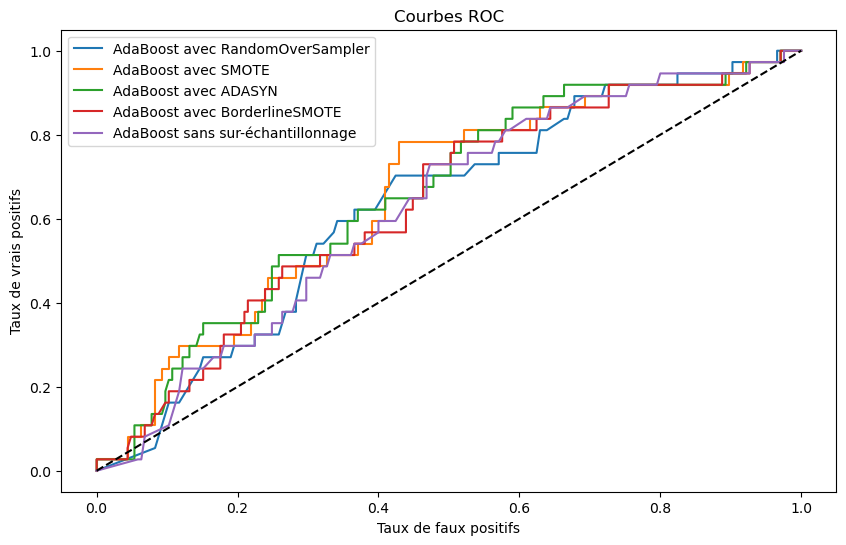

In [157]:
# Courbes ROC

fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler_cv)
fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_smote_cv)
fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, _ = roc_curve(y_test, y_proba_adaboost_adasyn_cv)
fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote_cv)
fpr_adaboost_cv, tpr_adaboost_cv, _ = roc_curve(y_test, y_proba_adaboost_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost_cv, tpr_adaboost_cv, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### E) Importance des variables

In [158]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_adaboost_randomoversampler = modele_adaboost_randomoversampler_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_smote = modele_adaboost_smote_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_adasyn = modele_adaboost_adasyn_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_borderline_smote = modele_adaboost_borderline_smote_opt.named_steps['adaboost'].feature_importances_
importances_adaboost = modele_adaboost_opt.named_steps['adaboost'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_adaboost_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_randomoversampler
})

resultats_importance_variables_adaboost_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_smote
})

resultats_importance_variables_adaboost_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_adasyn
})

resultats_importance_variables_adaboost_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_borderline_smote
})

resultats_importance_variables_adaboost = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost
})

# Affichage des résultats
resultats_importance_variables_adaboost_randomoversampler = resultats_importance_variables_adaboost_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_smote = resultats_importance_variables_adaboost_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_adasyn = resultats_importance_variables_adaboost_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_borderline_smote = resultats_importance_variables_adaboost_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost = resultats_importance_variables_adaboost.sort_values(by="Importance", ascending=False)

resultats_importance_variables_adaboost_randomoversampler

Variable  Importance
22                         part_actifs        0.22
26                   total_entreprises        0.20
6                nb_actes_france_renov        0.14
20  com_variation_encours_dette_ha_pct        0.10
18                               p_pop        0.08
24              abstention_municipales        0.08
1              moyenne_conso_indus_hab        0.06
21                       part_inactifs        0.06
9          part_residences_secondaires        0.02
5                        emissions_ges        0.02
25                   taux_creation_ent        0.02
23                      dependance_eco        0.00
0               moyenne_conso_agri_hab        0.00
27             part_licencies_sportifs        0.00
28            part_jeunes_sans_diplome        0.00
29                        climat_Autre        0.00
30                     climat_Estuaire        0.00
19                           CSP_maire        0.00
16                            med_disp        0.00
17                                  an        0.00
15                part_trajets_voiture        0.00
14                            gare_tgv        0.00
13                         departement        0.00
12                        superf_choro        0.00
11                            gridens7        0.00
10                   beneficiaire_prog        0.00
8                         ecoquartiers        0.00
7                               friche        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
31                          climat_Mer        0.00

In [159]:
resultats_importance_variables_adaboost_smote

Variable  Importance
13                         departement       0.240
21                       part_inactifs       0.135
7                               friche       0.100
11                            gridens7       0.080
19                           CSP_maire       0.075
1              moyenne_conso_indus_hab       0.060
9          part_residences_secondaires       0.055
22                         part_actifs       0.045
23                      dependance_eco       0.040
6                nb_actes_france_renov       0.040
20  com_variation_encours_dette_ha_pct       0.035
16                            med_disp       0.030
12                        superf_choro       0.020
27             part_licencies_sportifs       0.015
5                        emissions_ges       0.010
18                               p_pop       0.010
24              abstention_municipales       0.010
28            part_jeunes_sans_diplome       0.000
25                   taux_creation_ent       0.000
26                   total_entreprises       0.000
29                        climat_Autre       0.000
30                     climat_Estuaire       0.000
0               moyenne_conso_agri_hab       0.000
17                                  an       0.000
15                part_trajets_voiture       0.000
14                            gare_tgv       0.000
10                   beneficiaire_prog       0.000
8                         ecoquartiers       0.000
4             moyenne_conso_totale_hab       0.000
3        moyenne_conso_residentiel_hab       0.000
2          moyenne_conso_tertiaire_hab       0.000
31                          climat_Mer       0.000

In [160]:
resultats_importance_variables_adaboost_smote

Variable  Importance
13                         departement       0.240
21                       part_inactifs       0.135
7                               friche       0.100
11                            gridens7       0.080
19                           CSP_maire       0.075
1              moyenne_conso_indus_hab       0.060
9          part_residences_secondaires       0.055
22                         part_actifs       0.045
23                      dependance_eco       0.040
6                nb_actes_france_renov       0.040
20  com_variation_encours_dette_ha_pct       0.035
16                            med_disp       0.030
12                        superf_choro       0.020
27             part_licencies_sportifs       0.015
5                        emissions_ges       0.010
18                               p_pop       0.010
24              abstention_municipales       0.010
28            part_jeunes_sans_diplome       0.000
25                   taux_creation_ent       0.000
26                   total_entreprises       0.000
29                        climat_Autre       0.000
30                     climat_Estuaire       0.000
0               moyenne_conso_agri_hab       0.000
17                                  an       0.000
15                part_trajets_voiture       0.000
14                            gare_tgv       0.000
10                   beneficiaire_prog       0.000
8                         ecoquartiers       0.000
4             moyenne_conso_totale_hab       0.000
3        moyenne_conso_residentiel_hab       0.000
2          moyenne_conso_tertiaire_hab       0.000
31                          climat_Mer       0.000

In [161]:
resultats_importance_variables_adaboost_borderline_smote

Variable  Importance
13                         departement        0.19
11                            gridens7        0.17
21                       part_inactifs        0.13
19                           CSP_maire        0.09
22                         part_actifs        0.09
7                               friche        0.08
20  com_variation_encours_dette_ha_pct        0.04
1              moyenne_conso_indus_hab        0.04
12                        superf_choro        0.03
26                   total_entreprises        0.03
16                            med_disp        0.03
9          part_residences_secondaires        0.02
24              abstention_municipales        0.02
6                nb_actes_france_renov        0.02
18                               p_pop        0.01
5                        emissions_ges        0.01
28            part_jeunes_sans_diplome        0.00
30                     climat_Estuaire        0.00
25                   taux_creation_ent        0.00
27             part_licencies_sportifs        0.00
23                      dependance_eco        0.00
29                        climat_Autre        0.00
0               moyenne_conso_agri_hab        0.00
17                                  an        0.00
15                part_trajets_voiture        0.00
14                            gare_tgv        0.00
10                   beneficiaire_prog        0.00
8                         ecoquartiers        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
31                          climat_Mer        0.00

In [162]:
resultats_importance_variables_adaboost

Variable  Importance
22                         part_actifs        0.22
18                               p_pop        0.22
21                       part_inactifs        0.12
6                nb_actes_france_renov        0.12
26                   total_entreprises        0.08
1              moyenne_conso_indus_hab        0.06
20  com_variation_encours_dette_ha_pct        0.06
24              abstention_municipales        0.06
12                        superf_choro        0.04
5                        emissions_ges        0.02
0               moyenne_conso_agri_hab        0.00
25                   taux_creation_ent        0.00
23                      dependance_eco        0.00
27             part_licencies_sportifs        0.00
28            part_jeunes_sans_diplome        0.00
29                        climat_Autre        0.00
30                     climat_Estuaire        0.00
19                           CSP_maire        0.00
16                            med_disp        0.00
17                                  an        0.00
15                part_trajets_voiture        0.00
14                            gare_tgv        0.00
13                         departement        0.00
11                            gridens7        0.00
10                   beneficiaire_prog        0.00
9          part_residences_secondaires        0.00
8                         ecoquartiers        0.00
7                               friche        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
31                          climat_Mer        0.00

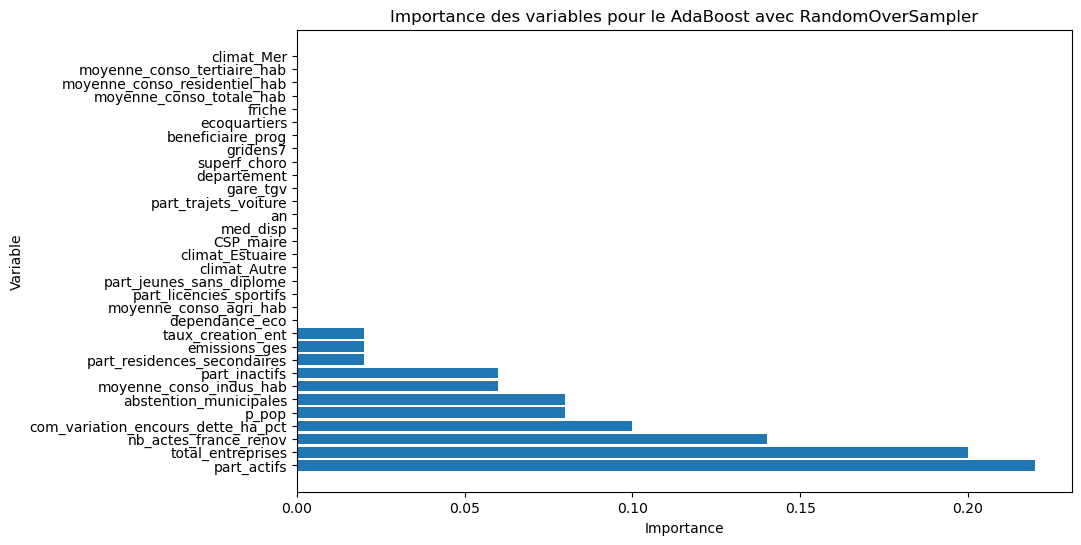

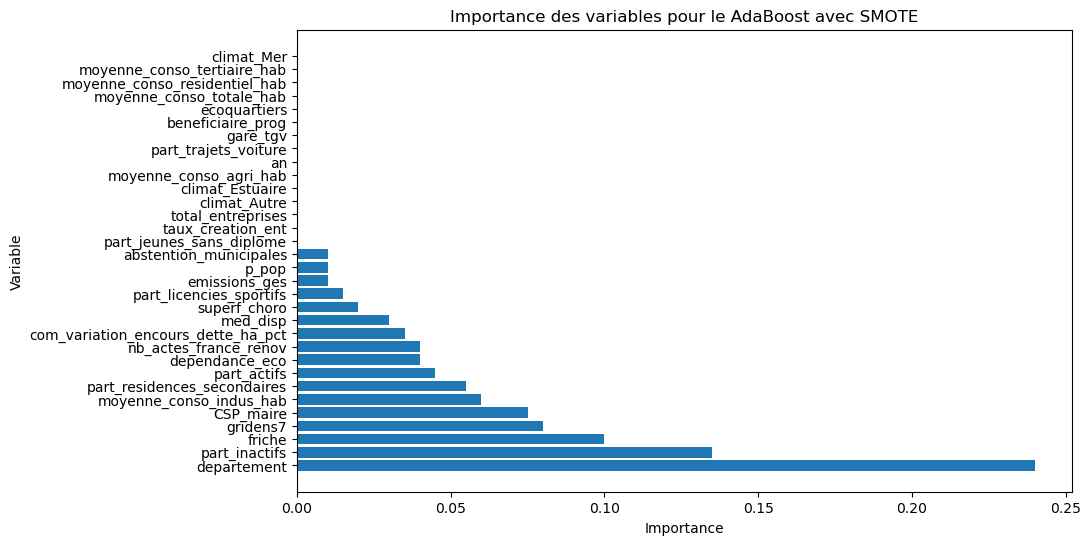

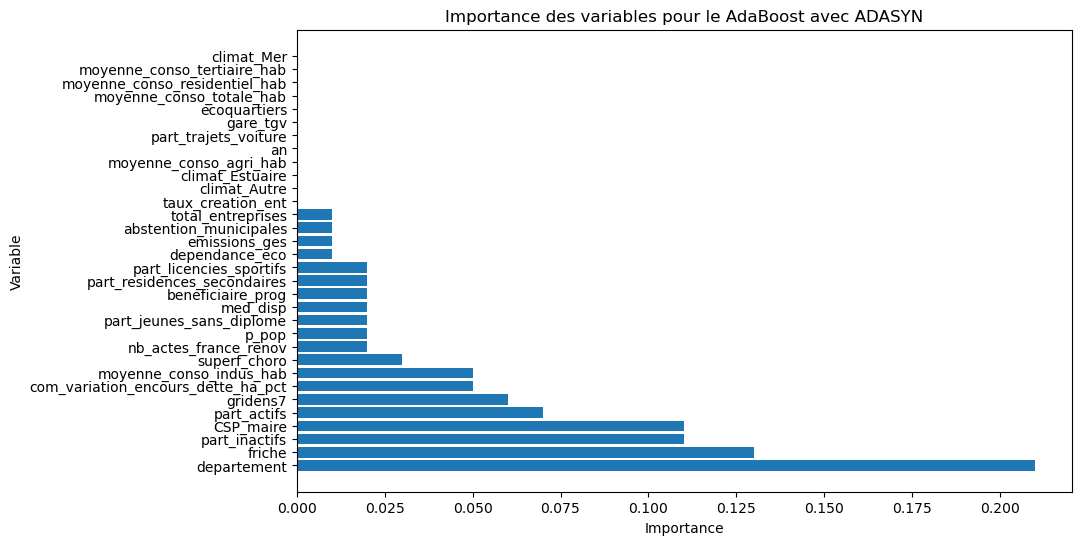

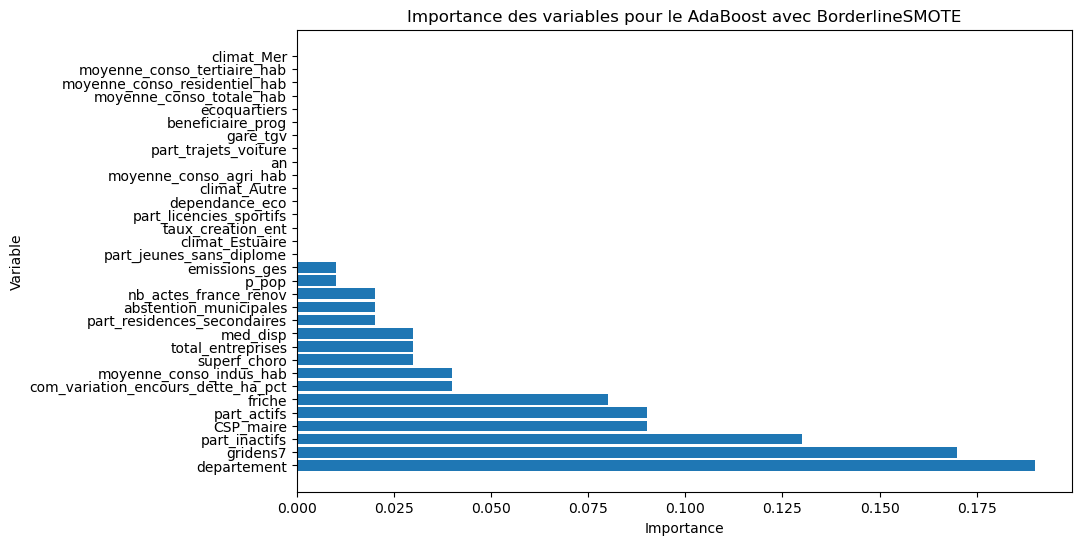

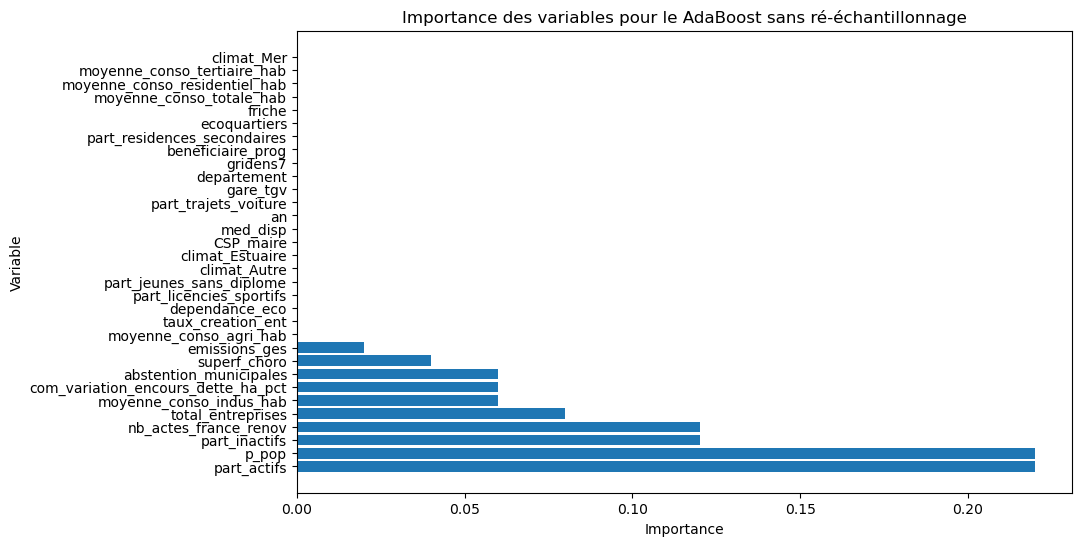

In [163]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_randomoversampler['Variable'], resultats_importance_variables_adaboost_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_smote['Variable'], resultats_importance_variables_adaboost_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_adasyn['Variable'], resultats_importance_variables_adaboost_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_borderline_smote['Variable'], resultats_importance_variables_adaboost_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost['Variable'], resultats_importance_variables_adaboost['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost sans ré-échantillonnage')
plt.show()

## I.3. Export du modèle

In [168]:
# Export du meilleur modèle 
import joblib

joblib.dump(modele_adaboost_randomoversampler_opt, "modele_adaboost_randomoversampler_opt.joblib")

['modele_adaboost_randomoversampler_opt.joblib']

# II. Résultats

## II.1. Cartographie

In [173]:
# On récupère chaque probabilité associée à chaque commune

y_proba_adaboost_randomoversampler = modele_adaboost_randomoversampler_opt.predict_proba(X)[:, 1]

resultats_proba_communes = pd.DataFrame({
    "Code INSEE": X.index,
    "Probabilité": y_proba_adaboost_randomoversampler
})
resultats_proba_communes

Code INSEE  Probabilité
0          22001     0.420574
1          22002     0.405101
2          22003     0.161315
3          22004     0.505306
4          22005     0.428815
...          ...          ...
1202       56260     0.537655
1203       56261     0.459459
1204       56262     0.510211
1205       56263     0.523736
1206       56264     0.456604

[1207 rows x 2 columns]

In [191]:
import requests

# https://geo.api.gouv.fr/decoupage-administratif/communes
url_api = "https://geo.api.gouv.fr/communes?code={}&fields=code,contour&format=json"

# Récupération des données géographiques pour chaque commune en utilisant le lien api en parrallélisant les requêtes

for code_insee in resultats_proba_communes['Code INSEE']:
    url = url_api.format(code_insee)
    response = requests.get(url)
    perimetre_communes = response.json()


KeyboardInterrupt: 

In [ ]:
# Jointure pour avoir 3 colonnes : code, probabilité et contour

df_perimetre_communes = pd.DataFrame(perimetre_communes)
df_perimetre_communes['Code INSEE'] = df_perimetre_communes['code']
df_perimetre_communes = df_perimetre_communes.drop(columns=['code'])

df_perimetre_communes = df_perimetre_communes.merge(resultats_proba_communes, on='Code INSEE')
df_perimetre_communes.head